# Introduction
This notebook compares the similarity of the different-kinase networks predicted by the same predictor.  The similarity is measured by Jaccard's Index. The Jaccard’s index is the ratio of the intersection to the union of the two sets.  The values range from 0 for no similarity to 1 for the complete overlap of the two compared sets.  


In [1]:
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

# customized python modules (see the .py files for detail documentation)
import meltMatrix # convert the matrix to a list-like dataframe
import df_by_kin  # split the prediction data into two dataframe by kinase type
import kinase_mutual_information, plot_kinase_heatmap # measures and plots the network similarity by Jaccard's Index
import sameKinase_rank, plot_sameKinase_rank # plots the same-kinase similarity ranking 


In [2]:
# file location
# local (../../)
base = '../../'
# Prediction data type:
#. 'all' = all human phosphosites
#. '2exp' = with > 2 experimental evidence
#. '3exp' = with > 3 experimental evidence
d_type = 'all'

In [3]:
# kinase map
KinaseMap = base + 'Data/Map/globalKinaseMap.csv'

# input files
# prediction data
PhosphoPICK1 = base + 'Data/comparison/Thresh/PhosphoPICK/'+ d_type + '/PhosphoPICK_0.1.csv'                 #low
PhosphoPICK06 = base + 'Data/comparison/Thresh/PhosphoPICK/'+ d_type + '/PhosphoPICK_0.06.csv'               #med
PhosphoPICK02 = base + 'Data/comparison/Thresh/PhosphoPICK/'+ d_type + '/PhosphoPICK_0.02.csv'               #high

NetworKIN03 = base + 'Data/comparison/Thresh/NetworKIN/'+ d_type + '/NetworKIN_0.3.csv'                      #low
NetworKIN05 = base + 'Data/comparison/Thresh/NetworKIN/'+ d_type + '/NetworKIN_0.5.csv'                      #med
NetworKIN1 = base + 'Data/comparison/Thresh/NetworKIN/'+ d_type + '/NetworKIN_1.csv'                         #high

GPS_lo = base + 'Data/comparison/Thresh/GPS5.0/'+ d_type + '/GPS_low.csv'
GPS_md = base + 'Data/comparison/Thresh/GPS5.0/'+ d_type + '/GPS_medium.csv'
GPS_hi = base + 'Data/comparison/Thresh/GPS5.0/'+ d_type + '/GPS_high.csv' 

# output files dir for kinase network similarity comparison within a predictor (heatmap/df)
heatmap_s_data_dir = base + 'Data/comparison/kinaseNetworkSimilarity_withinPredictor/dataframe/'
heatmap_s_dir = base + 'Data/comparison/kinaseNetworkSimilarity_withinPredictor/heatmaps/'
network_dir = base + 'Data/comparison/kinaseNetworkSimilarity_withinPredictor/networks/'

### Thresholds setting

| Predictor    | Score Type          | Low | Med  | High |
|--------------|---------------------|-----|------|------|
| NetworKIN    | Likelihood Ratio    | 0.3 | 0.5  | 1    |
| PhosphoPICK  | P-value             | 0.1 | 0.06 | 0.02 |
| GPS5.0 (Y)   | False Positive Rate | 10% | 6%   | 2%   |
| GPS5.0 (S/T) | False Positive Rate | 15% | 9%   | 4%   |

### Define Kinase Groups

In [4]:
# load df, convert the matrix to a list-like df
cols = ['Kinase Name', 'substrate_id', 'site']
# PhosphoPICK
pp1_df = meltMatrix.meltMatrix(PhosphoPICK1)[cols]
pp06_df = meltMatrix.meltMatrix(PhosphoPICK06)[cols]
pp02_df = meltMatrix.meltMatrix(PhosphoPICK02)[cols]
# NetworKIN
nw03_df = meltMatrix.meltMatrix(NetworKIN03)[cols]
nw05_df = meltMatrix.meltMatrix(NetworKIN05)[cols]
nw1_df = meltMatrix.meltMatrix(NetworKIN1)[cols]
# GPS
gpsl_df = meltMatrix.meltMatrix(GPS_lo)[cols]
gpsm_df = meltMatrix.meltMatrix(GPS_md)[cols]
gpsh_df = meltMatrix.meltMatrix(GPS_hi)[cols]


In [5]:
# group and define df as y kinase and s/t kinase groups
# PhosphoPICK
pp1_y, pp1_st = df_by_kin.df_by_kin(pp1_df)
pp06_y, pp06_st = df_by_kin.df_by_kin(pp06_df)
pp02_y, pp02_st = df_by_kin.df_by_kin(pp02_df)
# NetworKIN
nw03_y, nw03_st = df_by_kin.df_by_kin(nw03_df)
nw05_y, nw05_st = df_by_kin.df_by_kin(nw05_df)
nw1_y, nw1_st = df_by_kin.df_by_kin(nw1_df)
# GPS
gpsl_y, gpsl_st = df_by_kin.df_by_kin(gpsl_df)
gpsm_y, gpsm_st = df_by_kin.df_by_kin(gpsm_df)
gpsh_y, gpsh_st = df_by_kin.df_by_kin(gpsh_df)


### PhosphoPICK
**low**

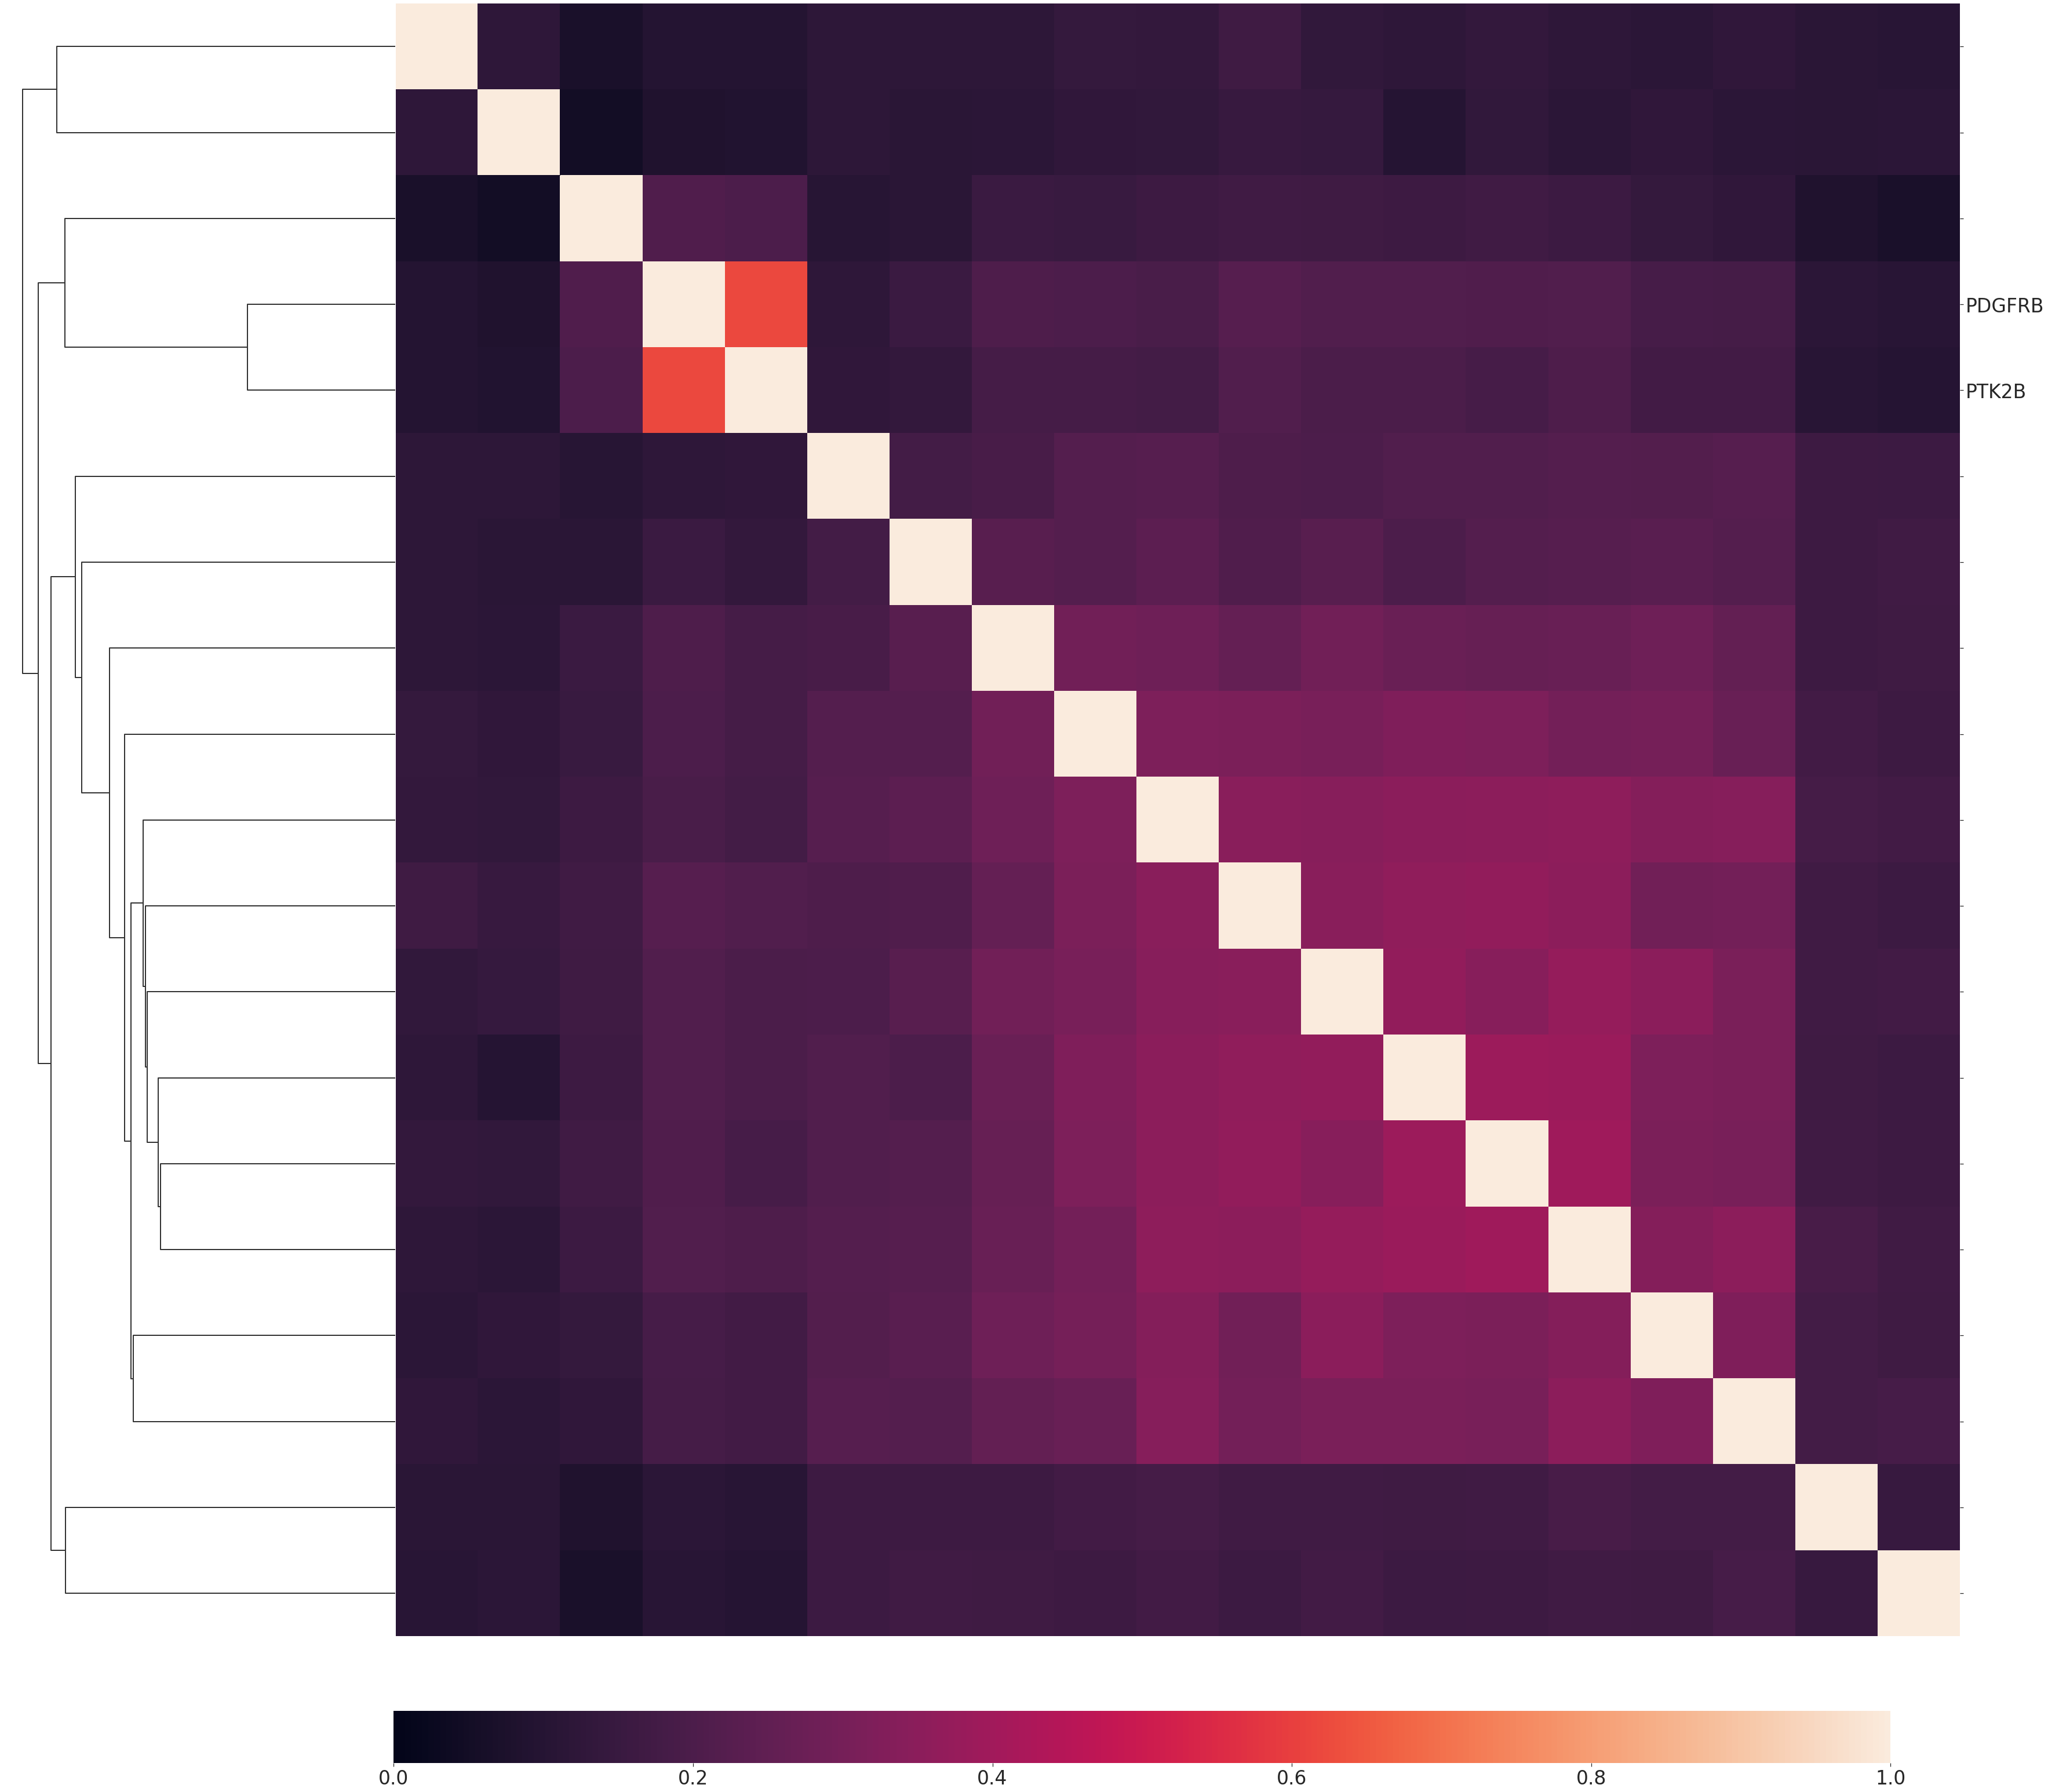

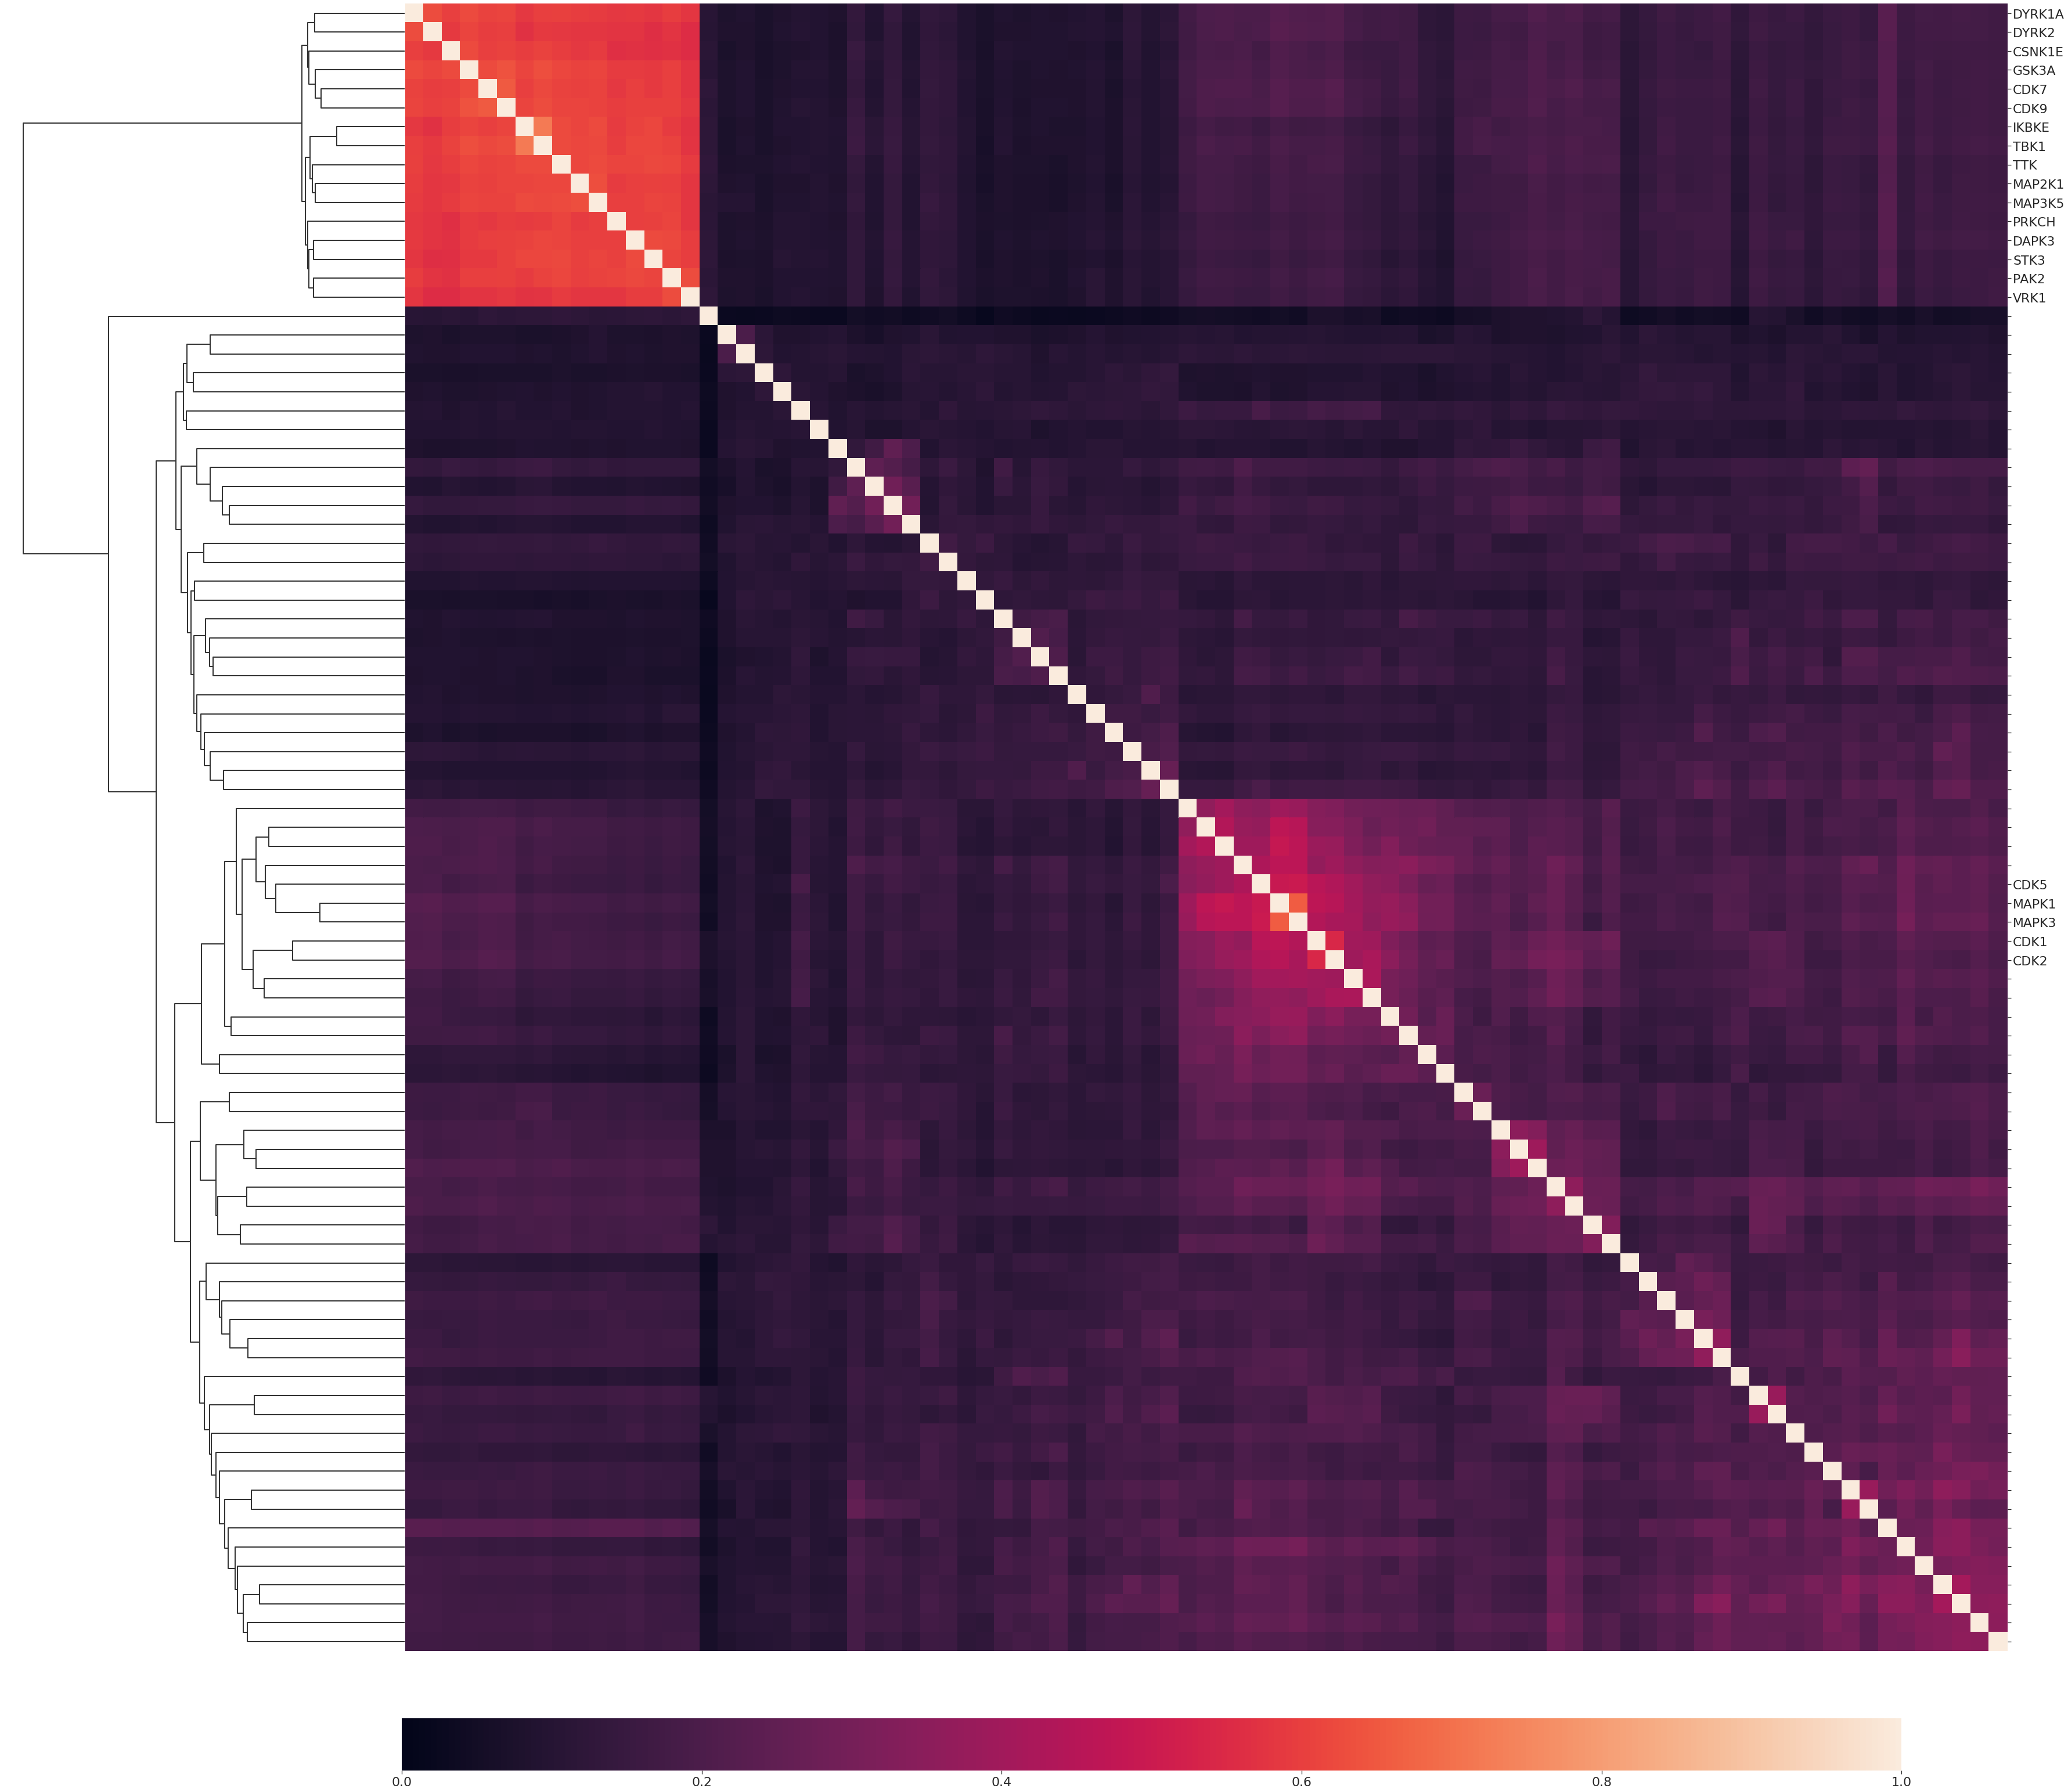

In [8]:
# Plot the network similarity of Jaccard's Index
# Y kinases
# calculate Jaccard's Indexes
pp1_y_heat, pp1_y_normalized_heat, pp1_y_heatlist = kinase_mutual_information.within__predictors(pp1_y, 'Kinase Name', 'substrate_id', heatmap_s_data_dir  + d_type +'_PhosphoPICK_low_Y_kinase_heatmap_df')
# plot the heatmap
plot_kinase_heatmap.plot_kinase_heatmap(pp1_y_normalized_heat, heatmap_s_dir + d_type +'_PhosphoPICK_low_Y_kinase','','','y')

# S/Y kinases
pp1_st_heat, pp1_st_normalized_heat, pp1_st_heatlist = kinase_mutual_information.within__predictors(pp1_st, 'Kinase Name', 'substrate_id', heatmap_s_data_dir  + d_type +'_PhosphoPICK_low_ST_kinase_heatmap_df')
plot_kinase_heatmap.plot_kinase_heatmap(pp1_st_normalized_heat, heatmap_s_dir + d_type +'_PhosphoPICK_low_ST_kinase','','','st')


**medium**

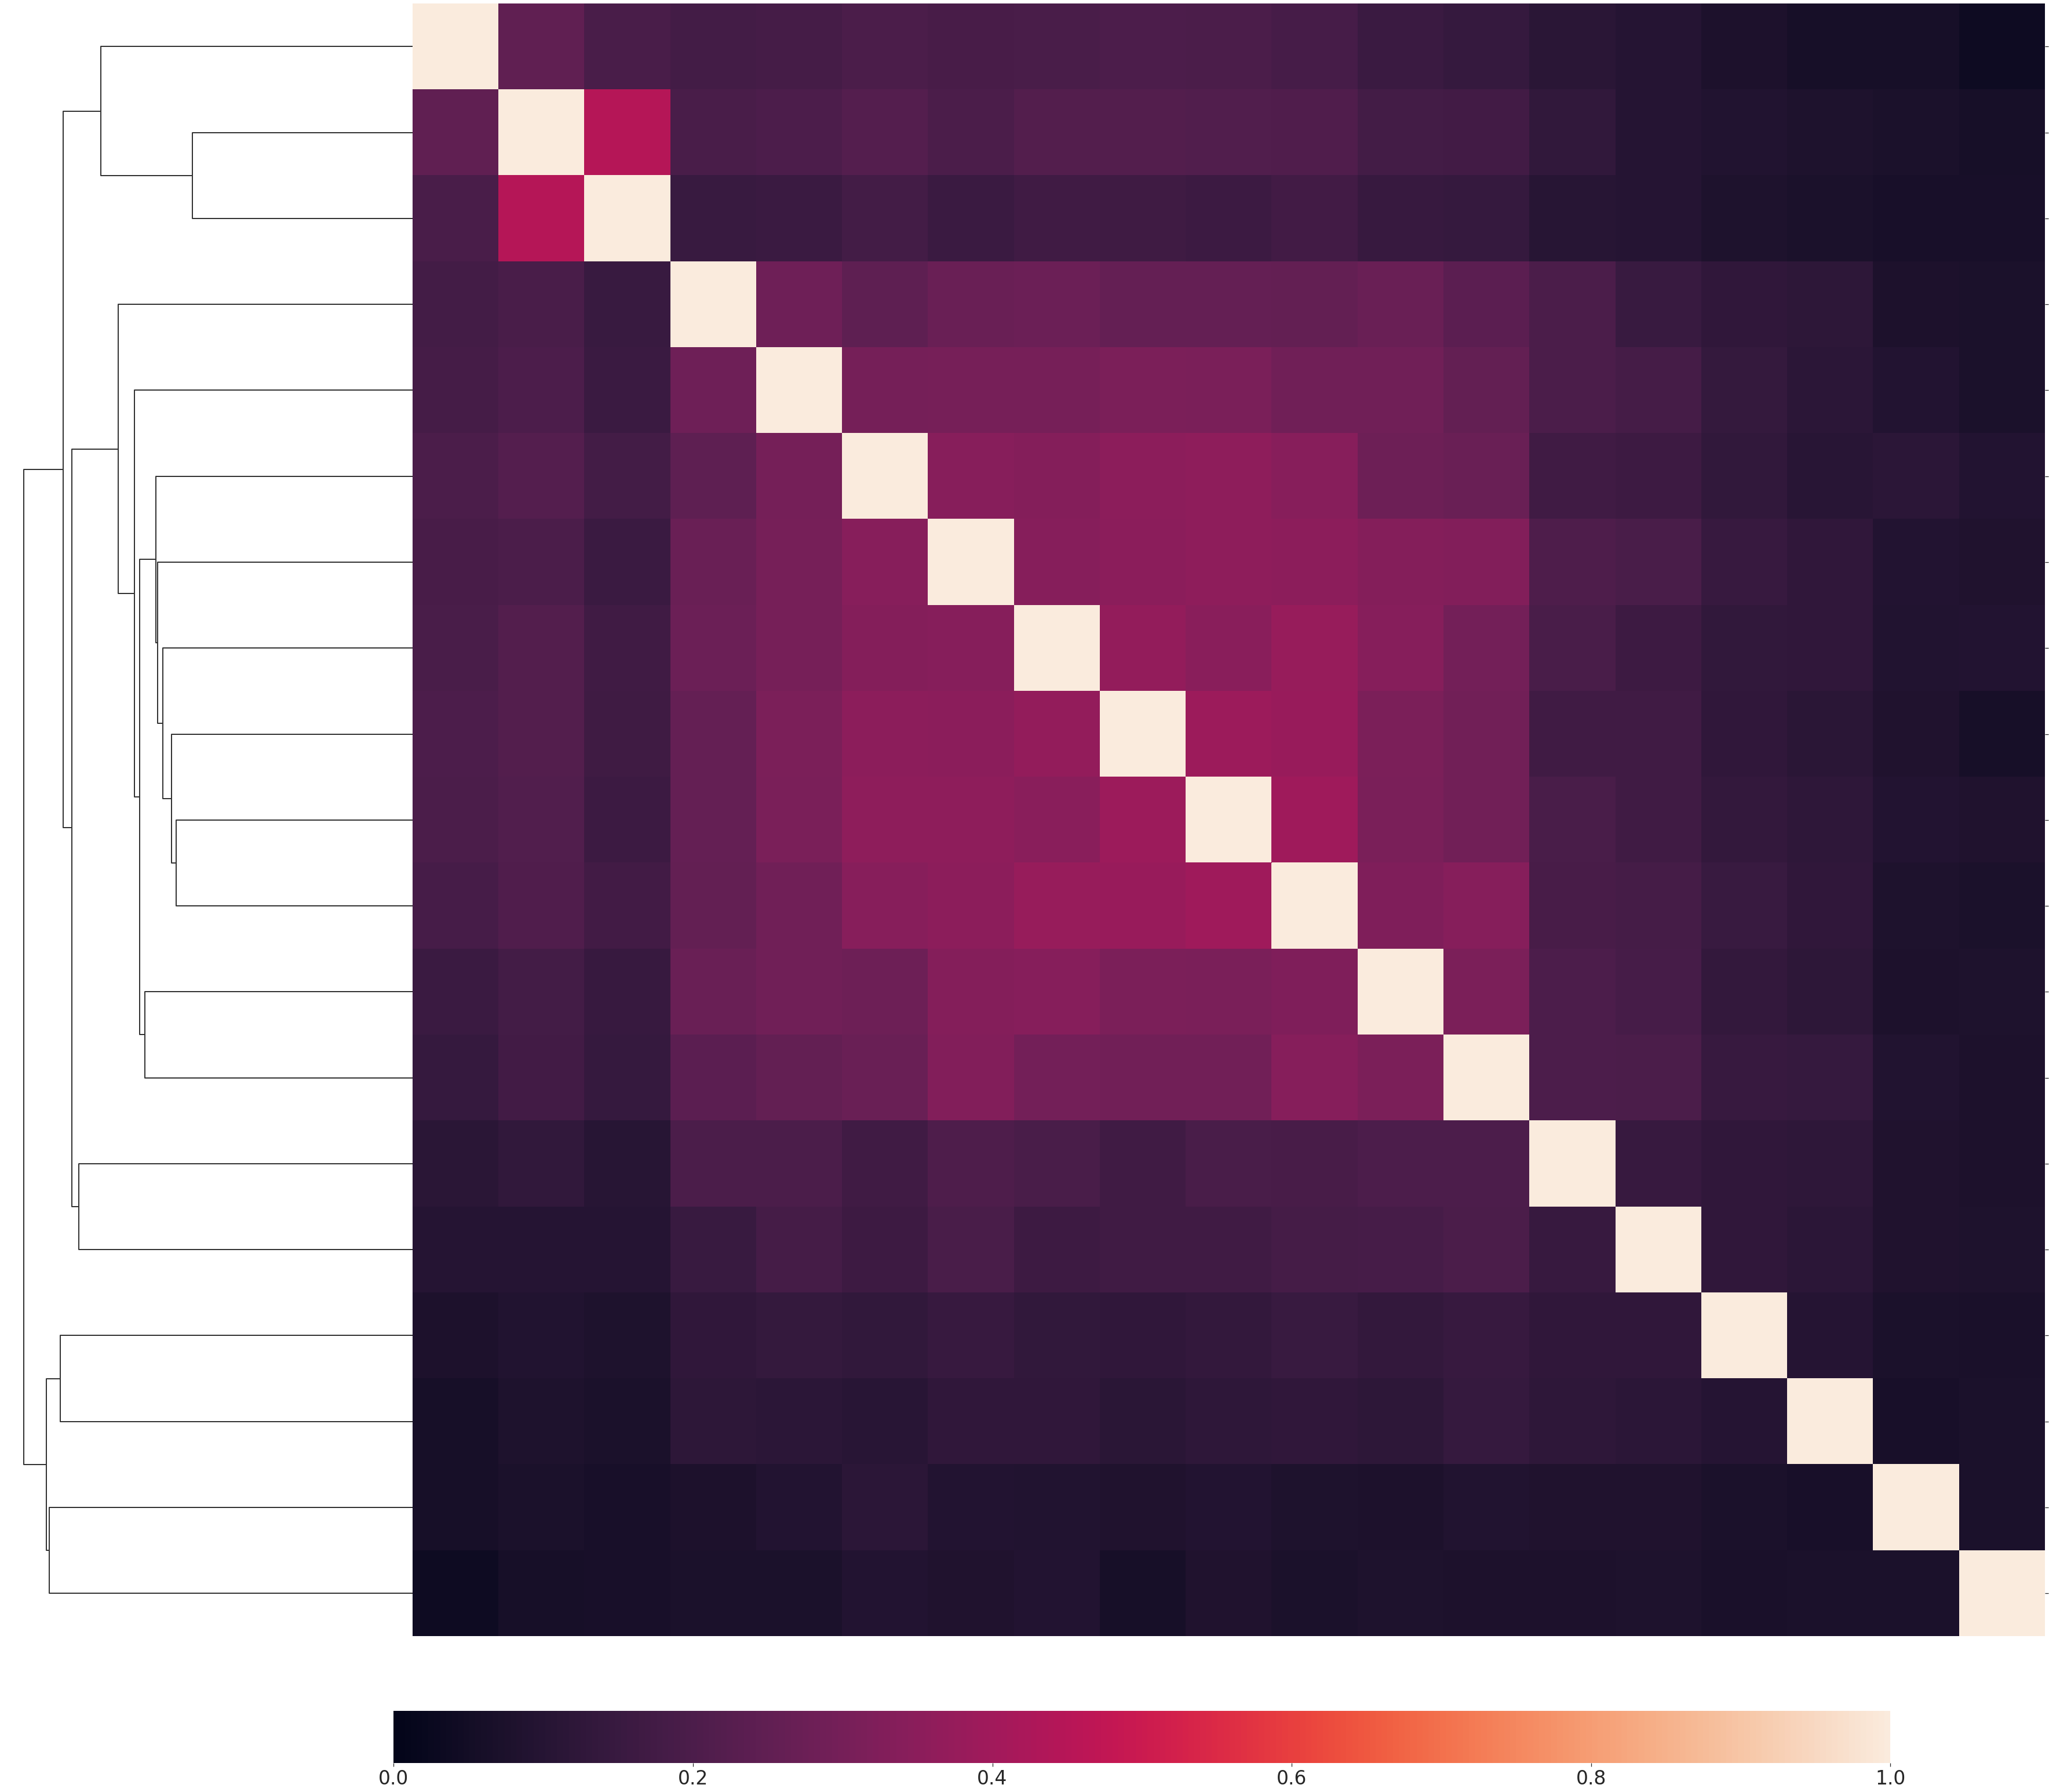

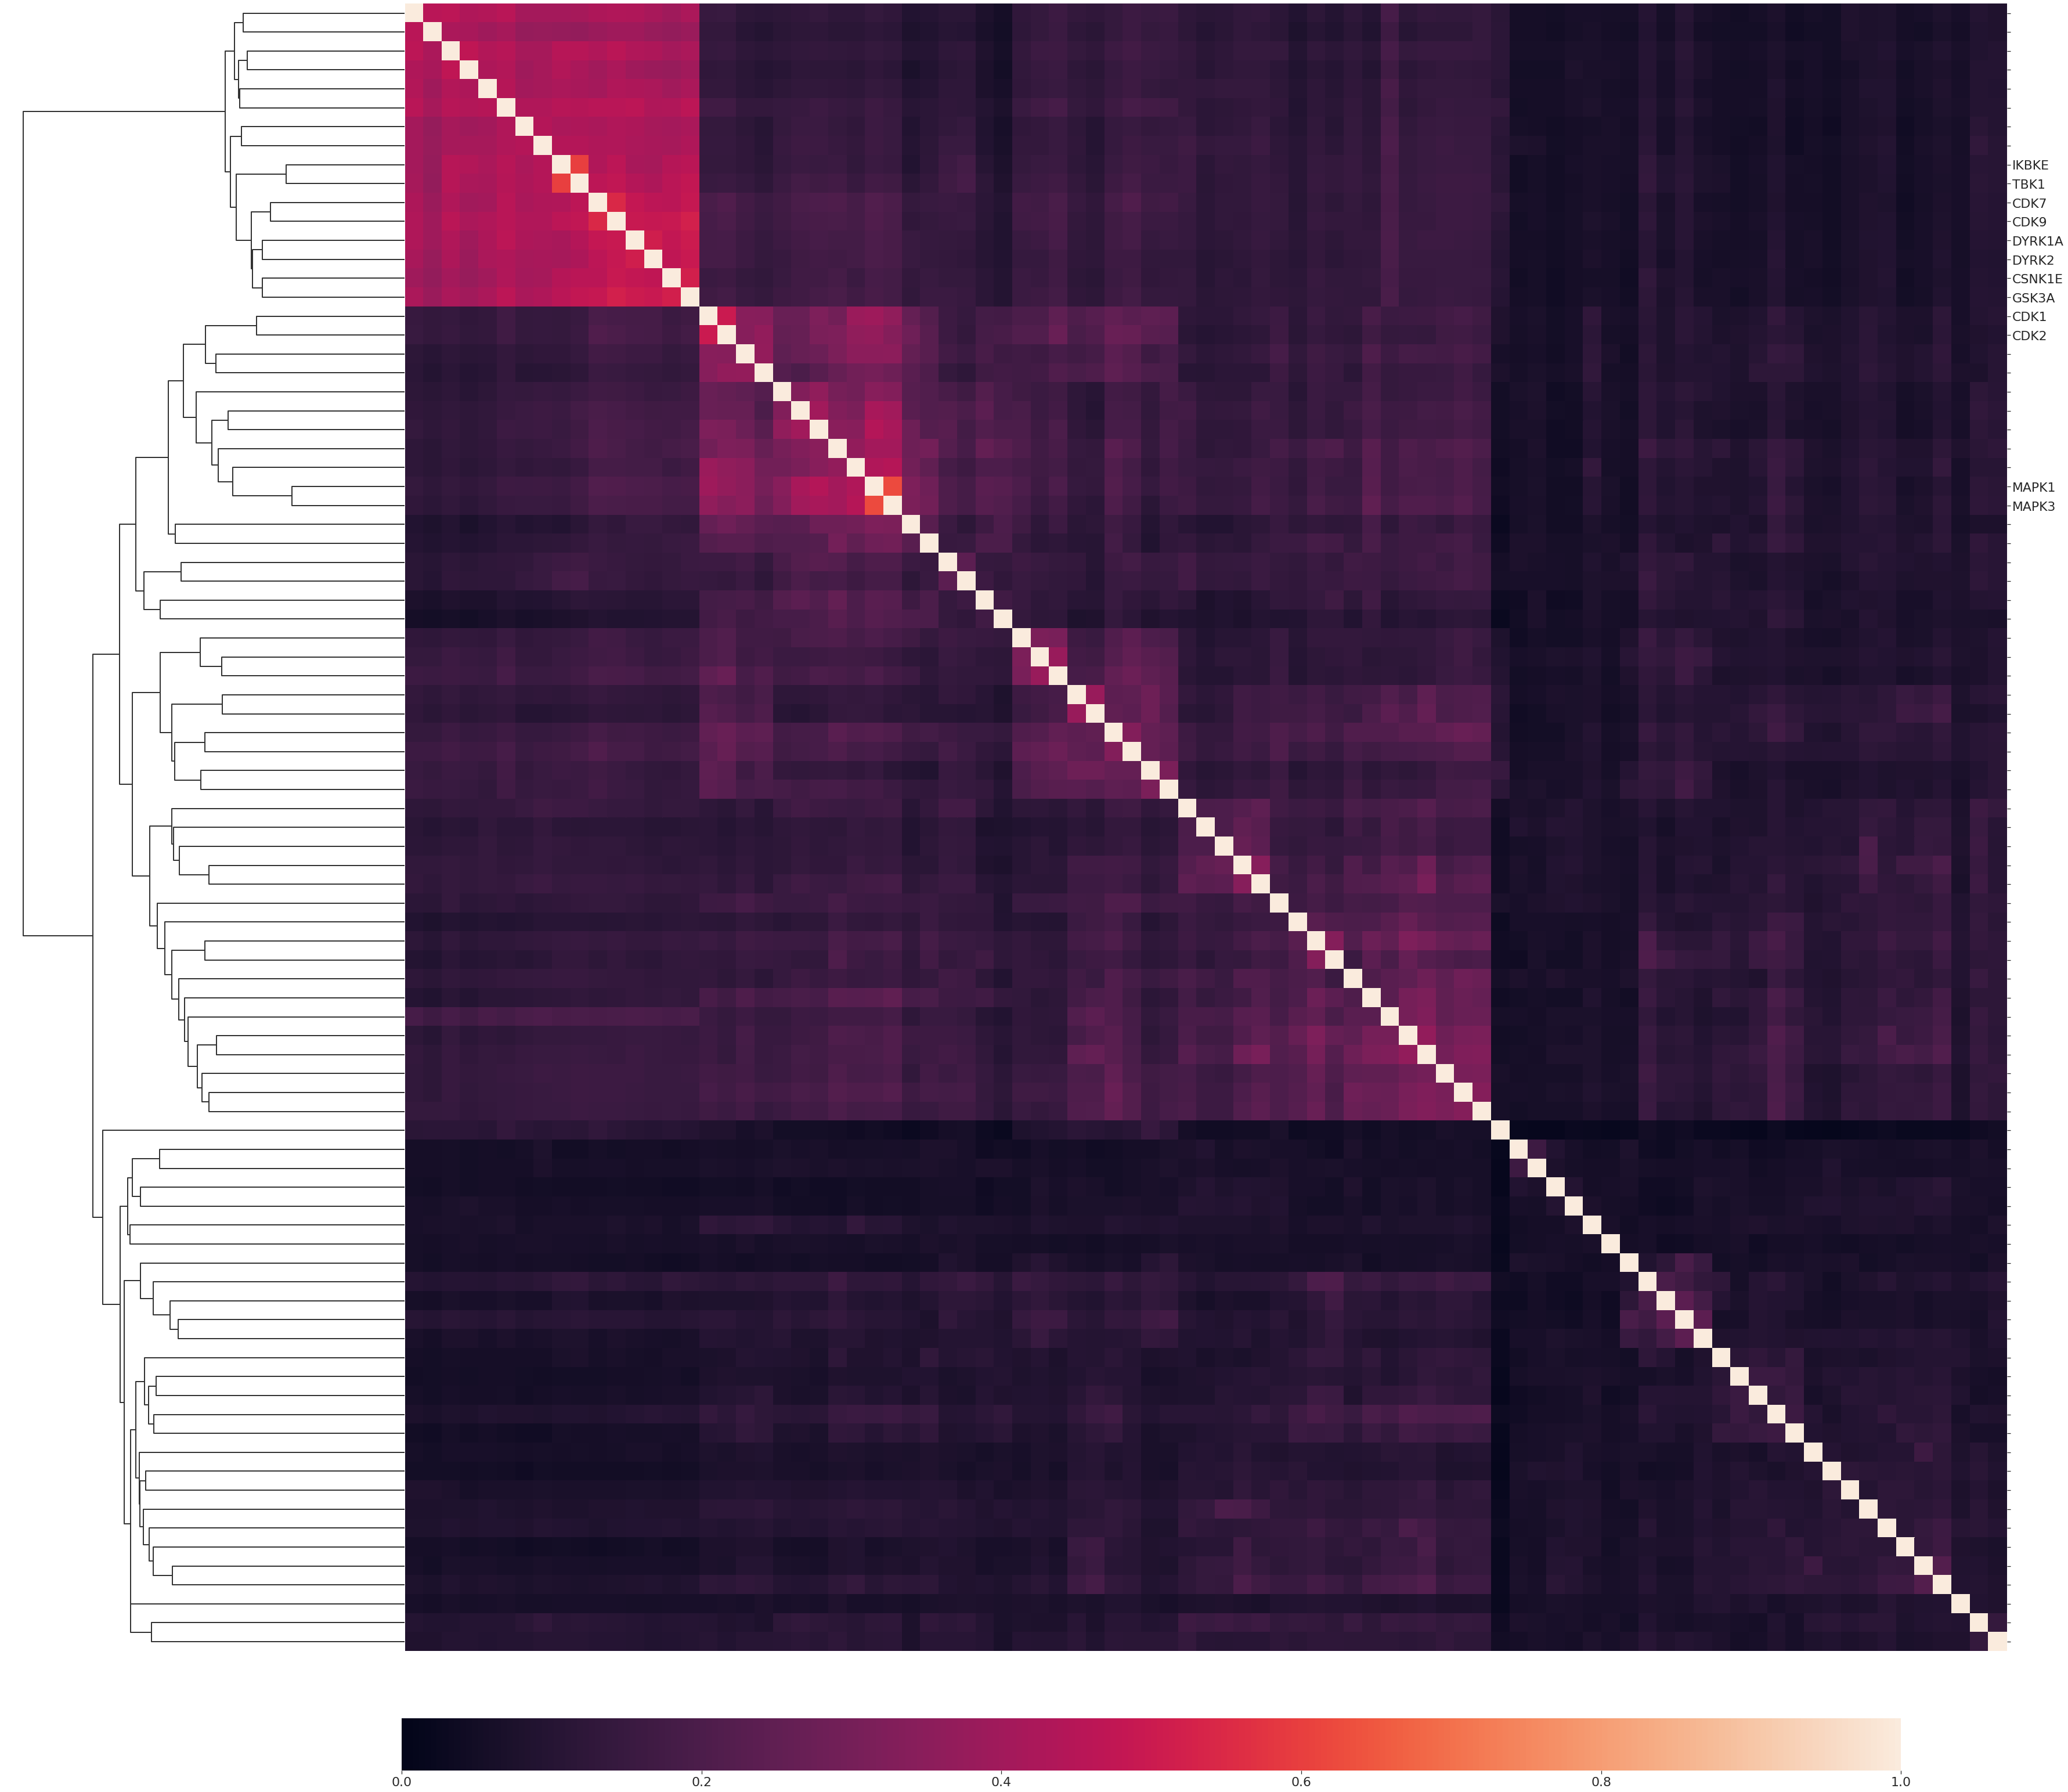

In [9]:
pp06_y_heat, pp06_y_normalized_heat, pp06_y_heatlist = kinase_mutual_information.within__predictors(pp06_y, 'Kinase Name', 'substrate_id', heatmap_s_data_dir  + d_type +'_PhosphoPICK_med_Y_kinase_heatmap_df')
plot_kinase_heatmap.plot_kinase_heatmap(pp06_y_normalized_heat, heatmap_s_dir + d_type +'_PhosphoPICK_med_Y_kinase','','','y')

pp06_st_heat, pp06_st_normalized_heat, pp06_st_heatlist = kinase_mutual_information.within__predictors(pp06_st, 'Kinase Name', 'substrate_id', heatmap_s_data_dir  + d_type +'_PhosphoPICK_med_ST_kinase_heatmap_df')
plot_kinase_heatmap.plot_kinase_heatmap(pp06_st_normalized_heat, heatmap_s_dir + d_type +'_PhosphoPICK_med_ST_kinase','','','st')



**high**

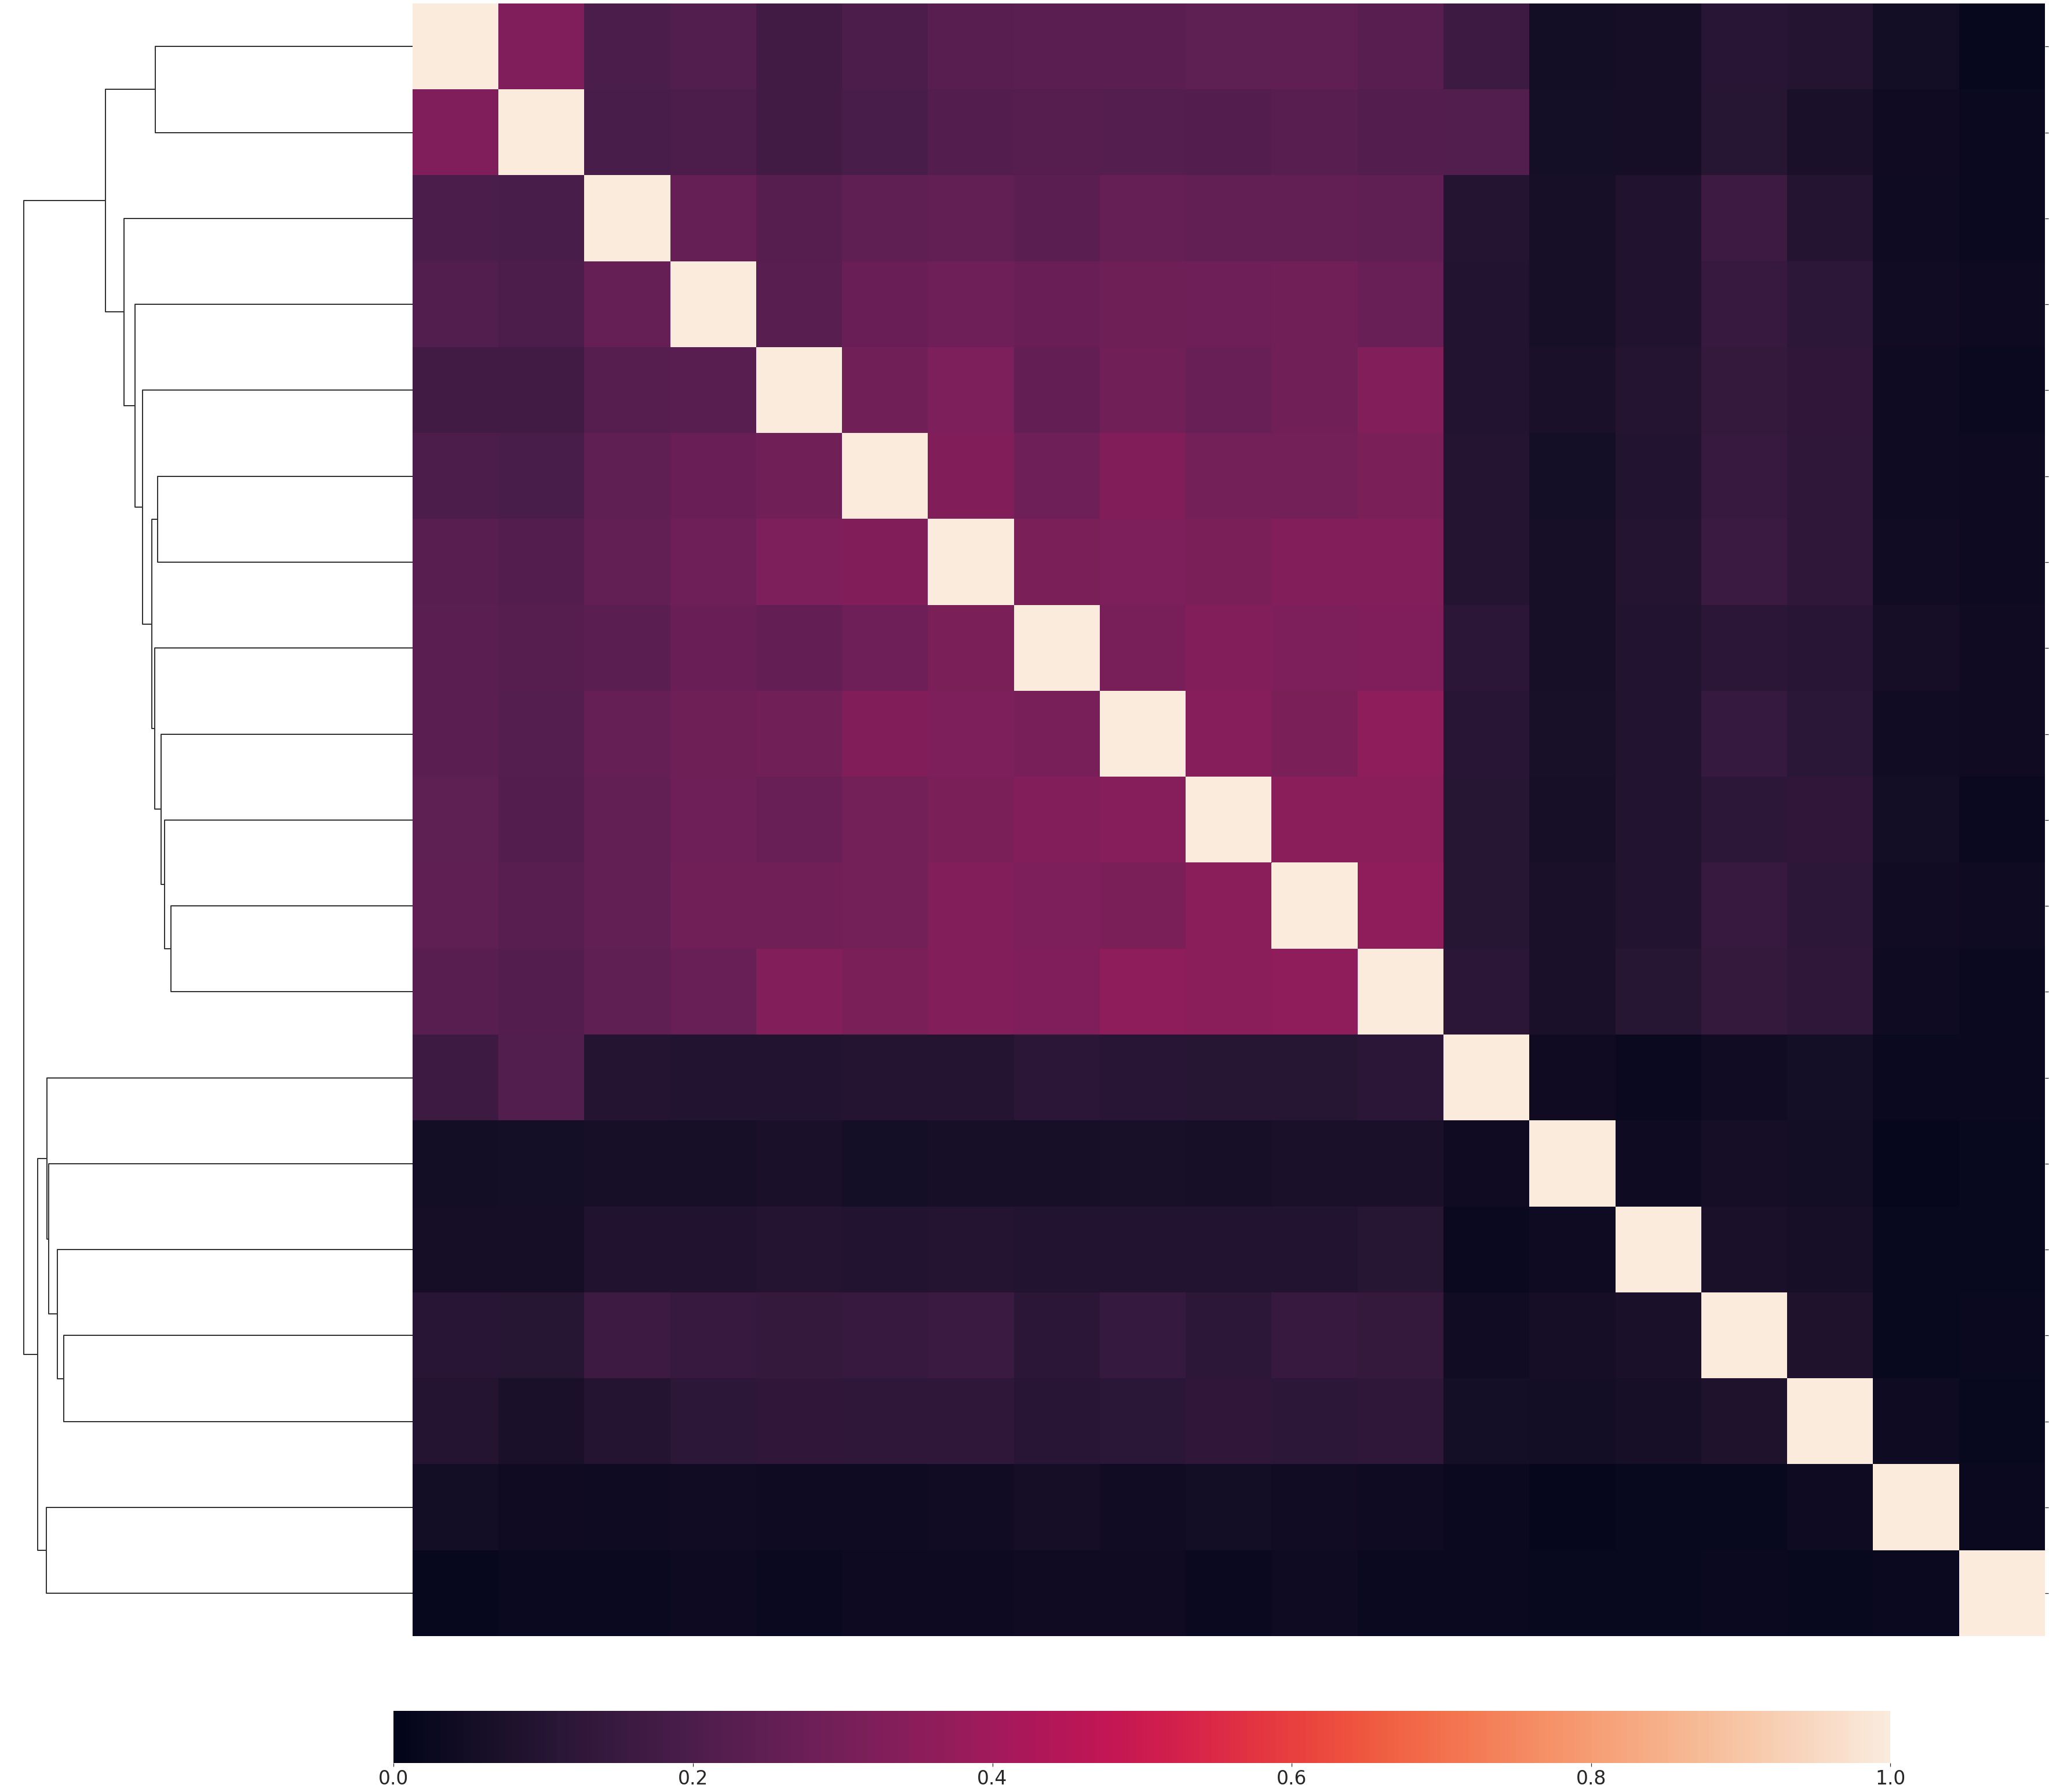

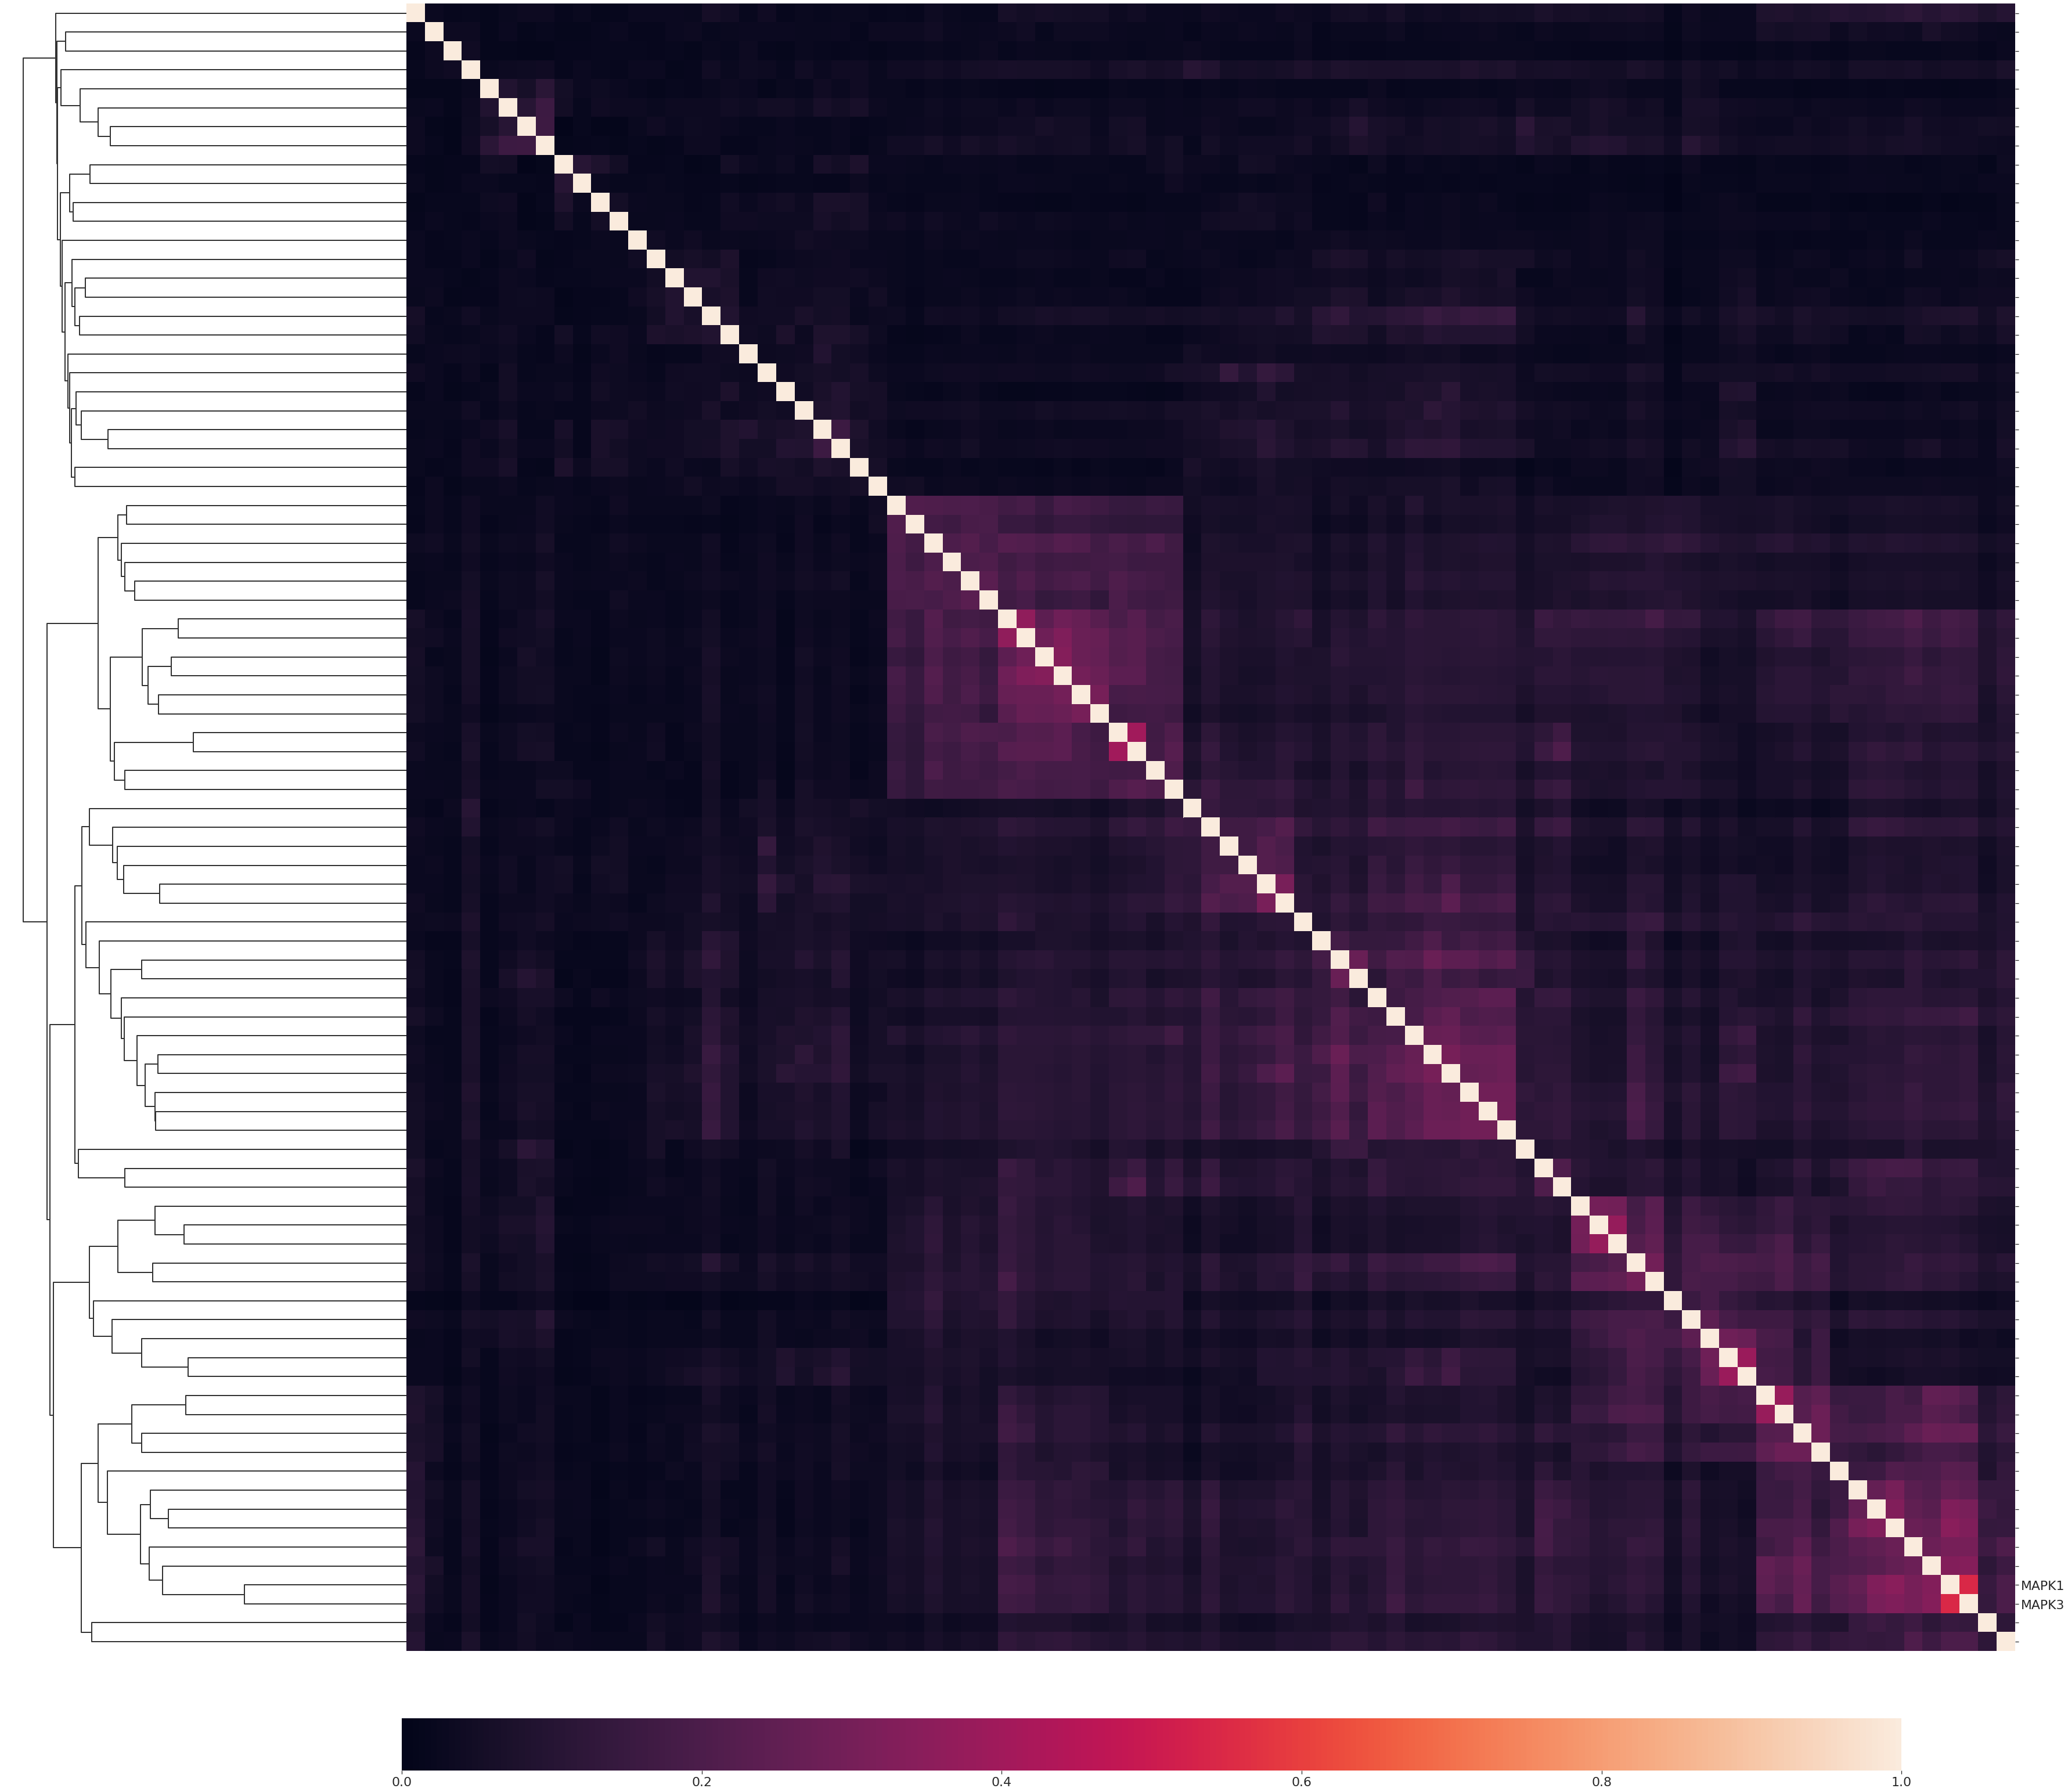

In [10]:
pp02_y_heat, pp02_y_normalized_heat, pp02_y_heatlist = kinase_mutual_information.within__predictors(pp02_y, 'Kinase Name', 'substrate_id', heatmap_s_data_dir  + d_type +'_PhosphoPICK_high_Y_kinase_heatmap_df')
plot_kinase_heatmap.plot_kinase_heatmap(pp02_y_normalized_heat, heatmap_s_dir + d_type +'_PhosphoPICK_high_Y_kinase','','','y')

pp02_st_heat, pp02_st_normalized_heat, pp02_st_heatlist = kinase_mutual_information.within__predictors(pp02_st, 'Kinase Name', 'substrate_id', heatmap_s_data_dir  + d_type +'_PhosphoPICK_high_ST_kinase_heatmap_df')
plot_kinase_heatmap.plot_kinase_heatmap(pp02_st_normalized_heat, heatmap_s_dir + d_type +'_PhosphoPICK_high_ST_kinase','','','st')



### GPS5.0 
**low**

/Users/bx2ur/opt/anaconda3/envs/notebook/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


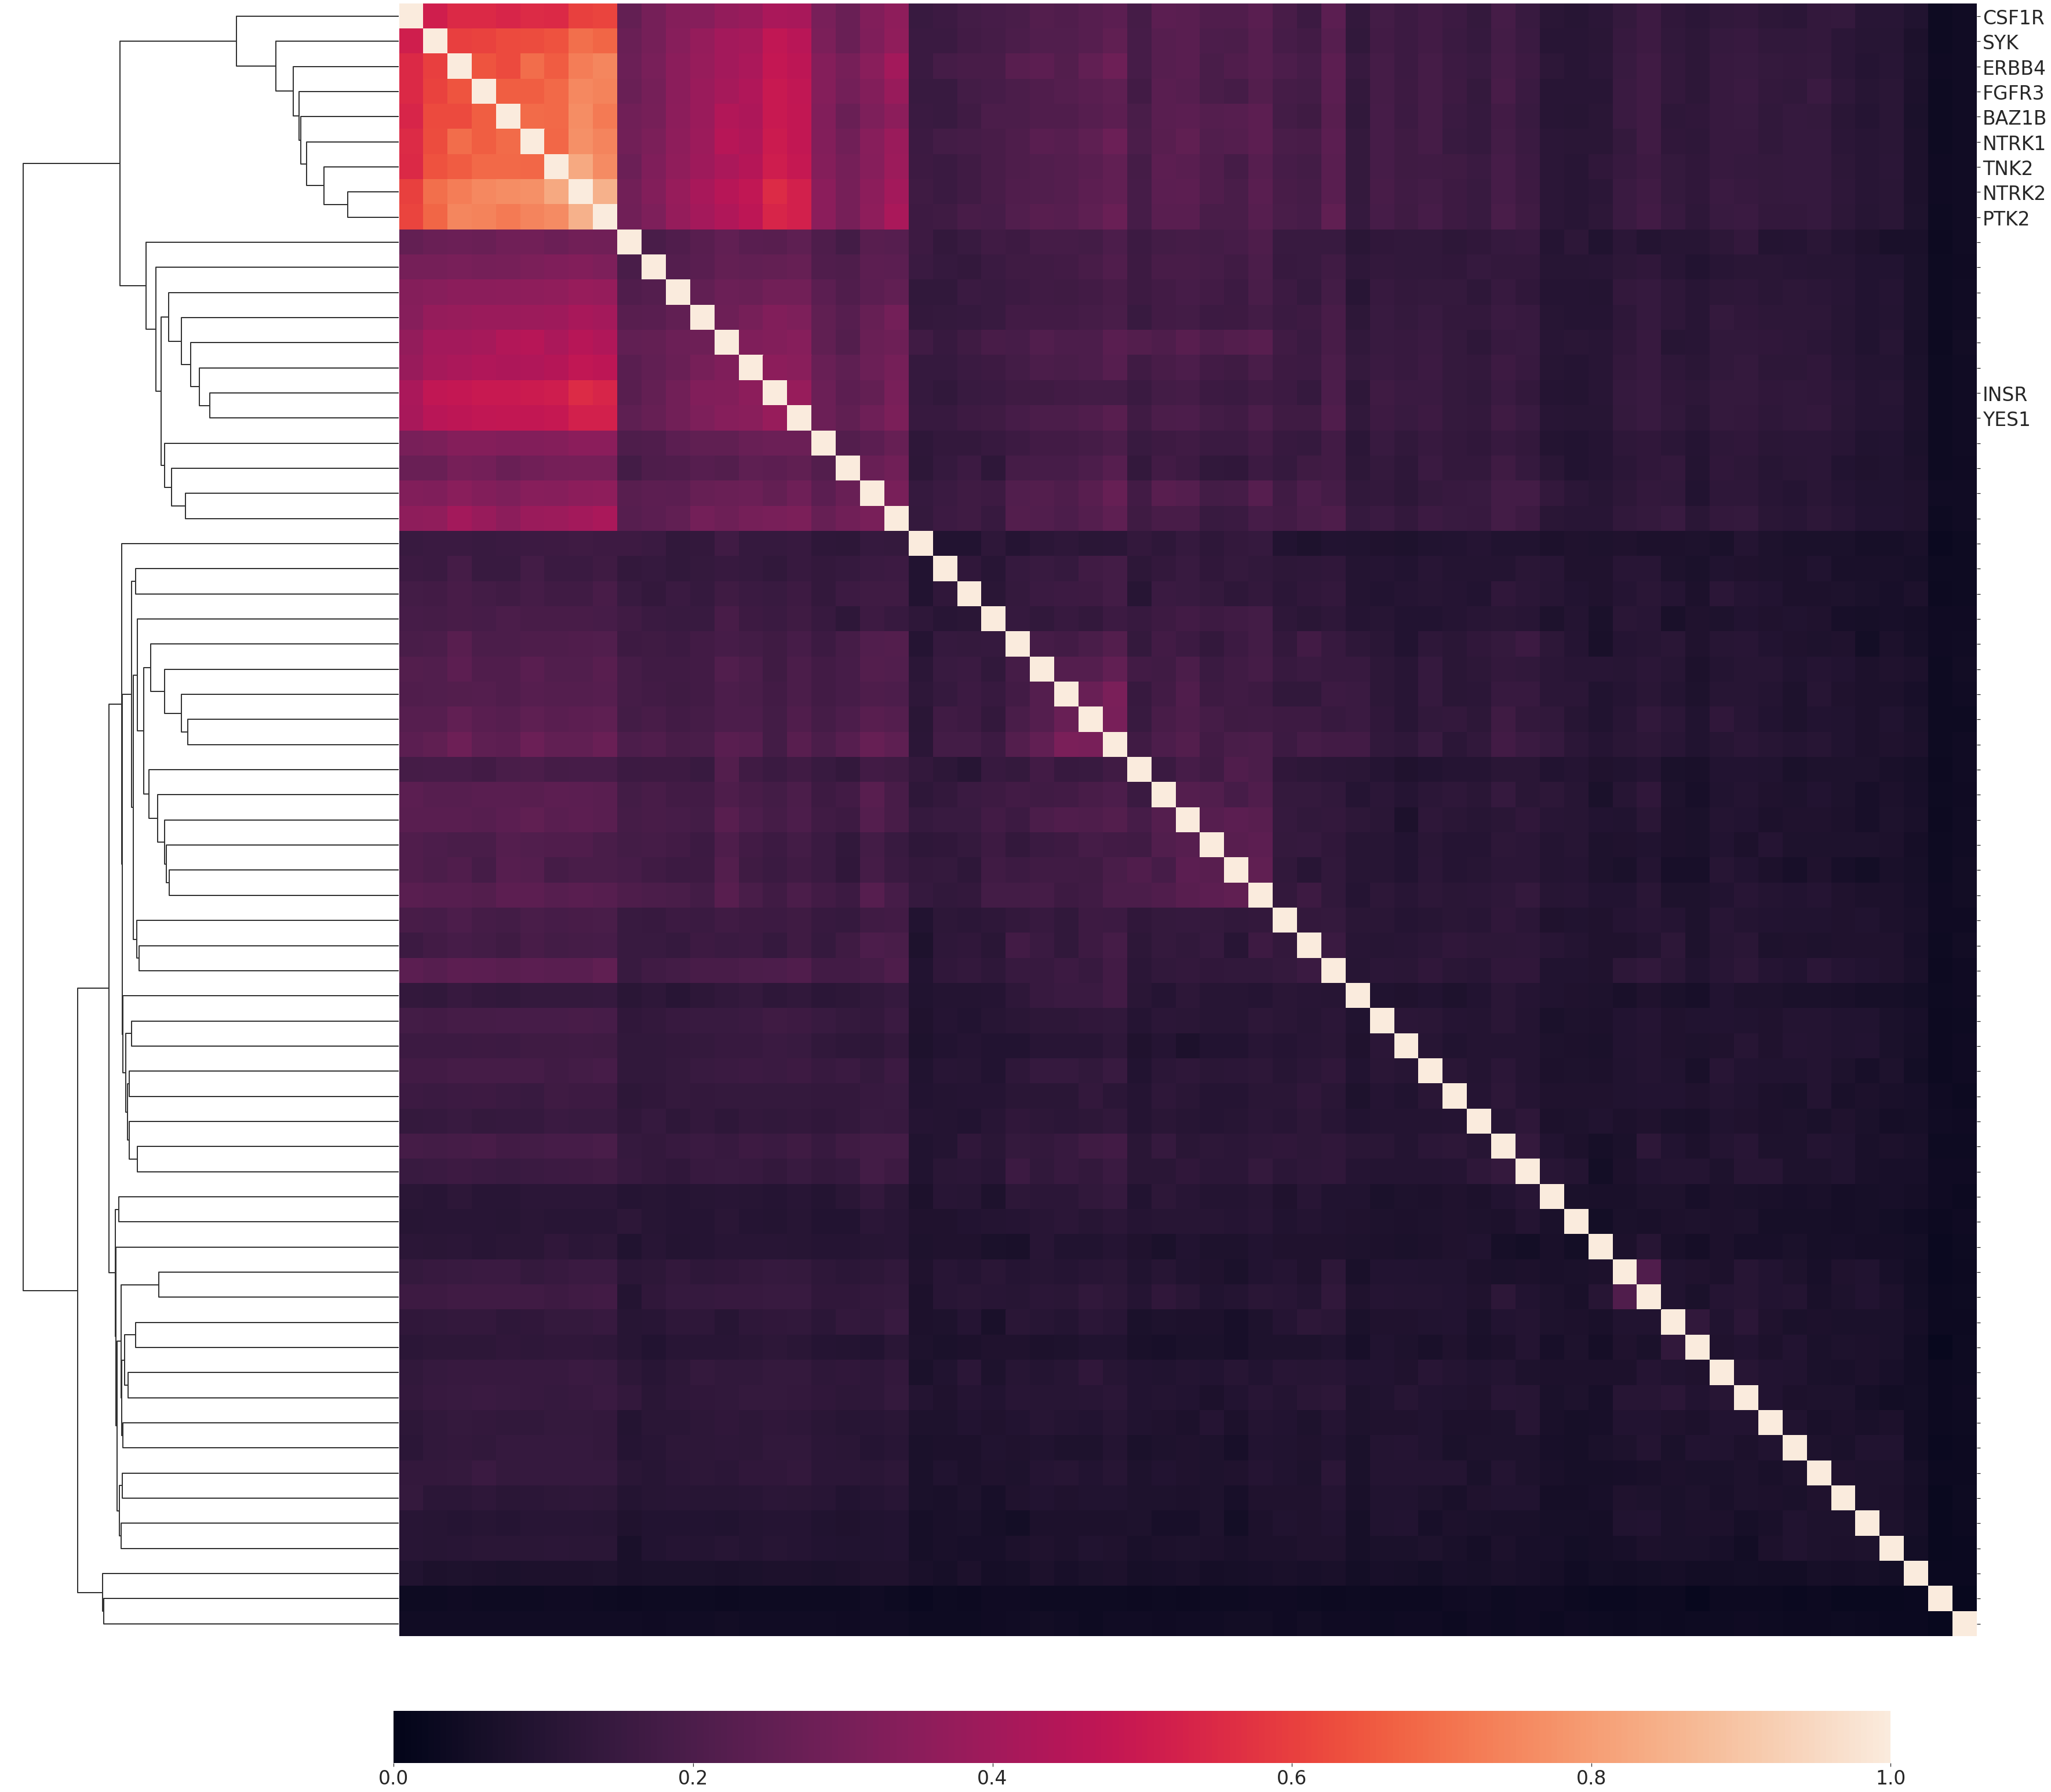

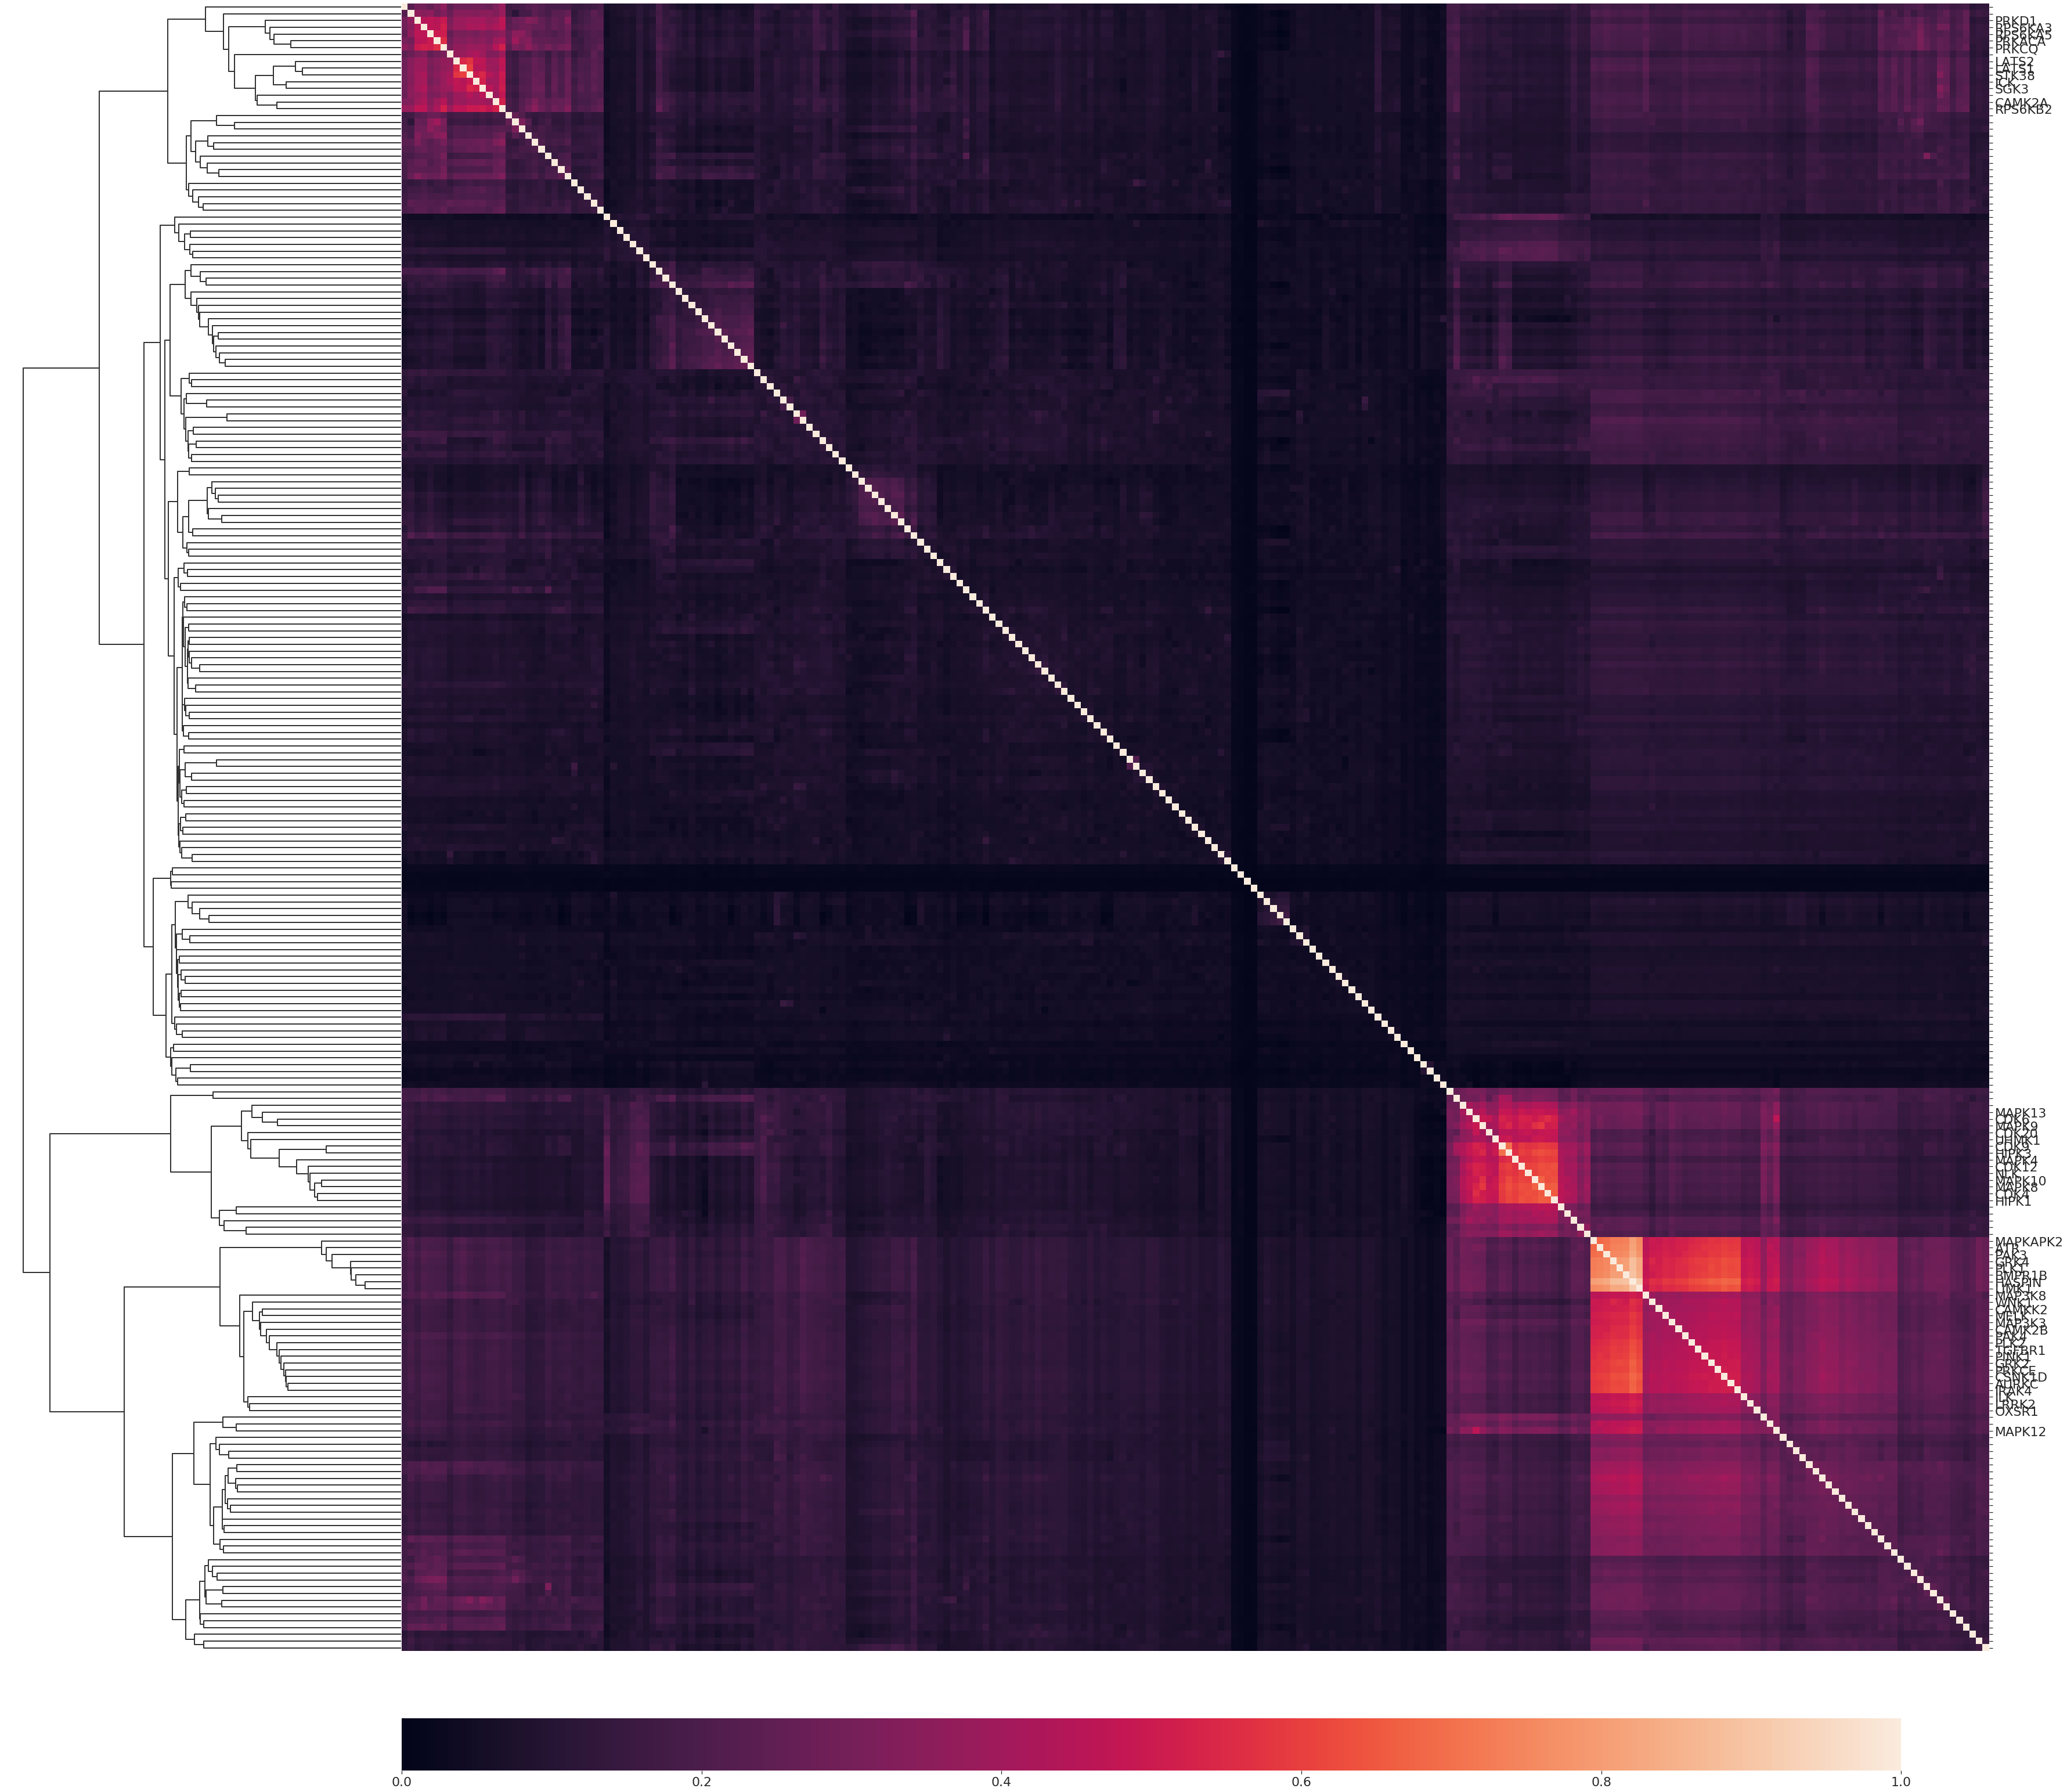

In [11]:
gpsl_y_heat,gpsl_y_normalized_heat, gpsl_y_heatlist = kinase_mutual_information.within__predictors(gpsl_y, 'Kinase Name', 'substrate_id', heatmap_s_data_dir  + d_type +'_GPS5.0_low_Y_kinase_heatmap_df')
plot_kinase_heatmap.plot_kinase_heatmap(gpsl_y_normalized_heat, heatmap_s_dir + d_type +'_GPS5.0_low_Y_kinase','','','y')

gpsl_st_heat,gpsl_st_normalized_heat, gpsl_st_heatlist = kinase_mutual_information.within__predictors(gpsl_st, 'Kinase Name', 'substrate_id', heatmap_s_data_dir  + d_type +'_GPS5.0_low_ST_kinase_heatmap_df')
plot_kinase_heatmap.plot_kinase_heatmap(gpsl_st_normalized_heat, heatmap_s_dir + d_type +'_GPS5.0_low_ST_kinase','','','st')

**medium**

/Users/bx2ur/opt/anaconda3/envs/notebook/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


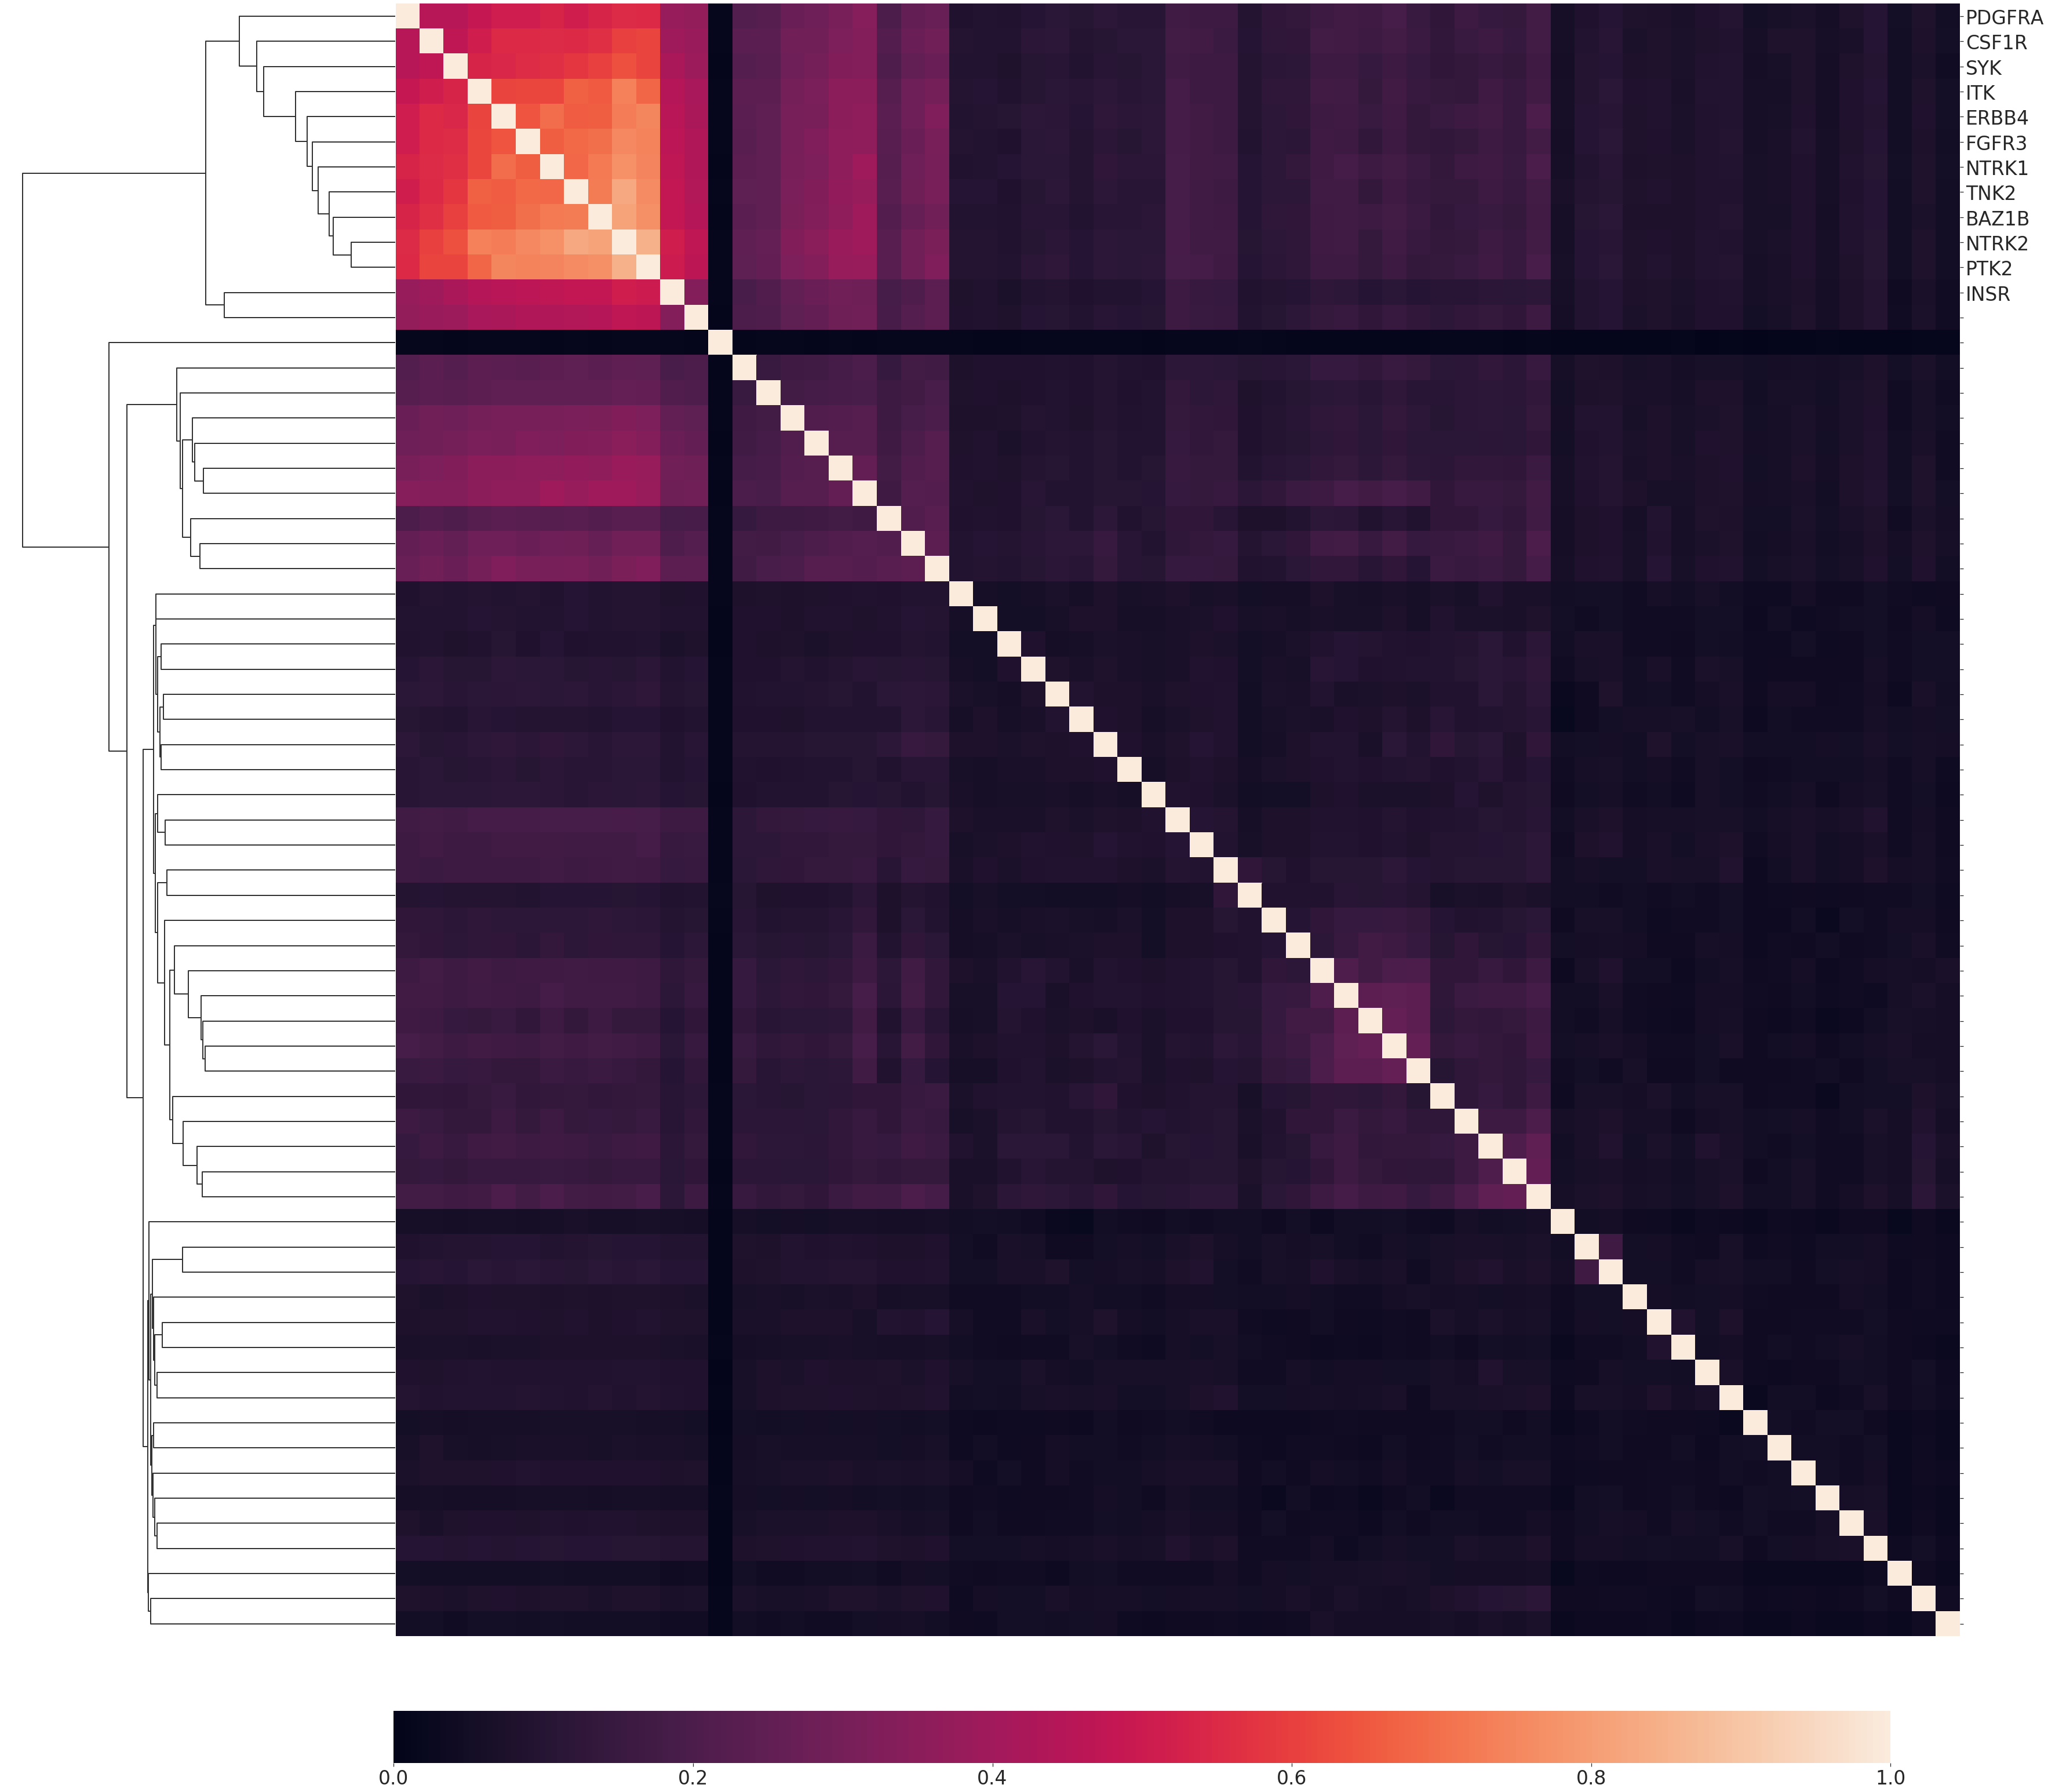

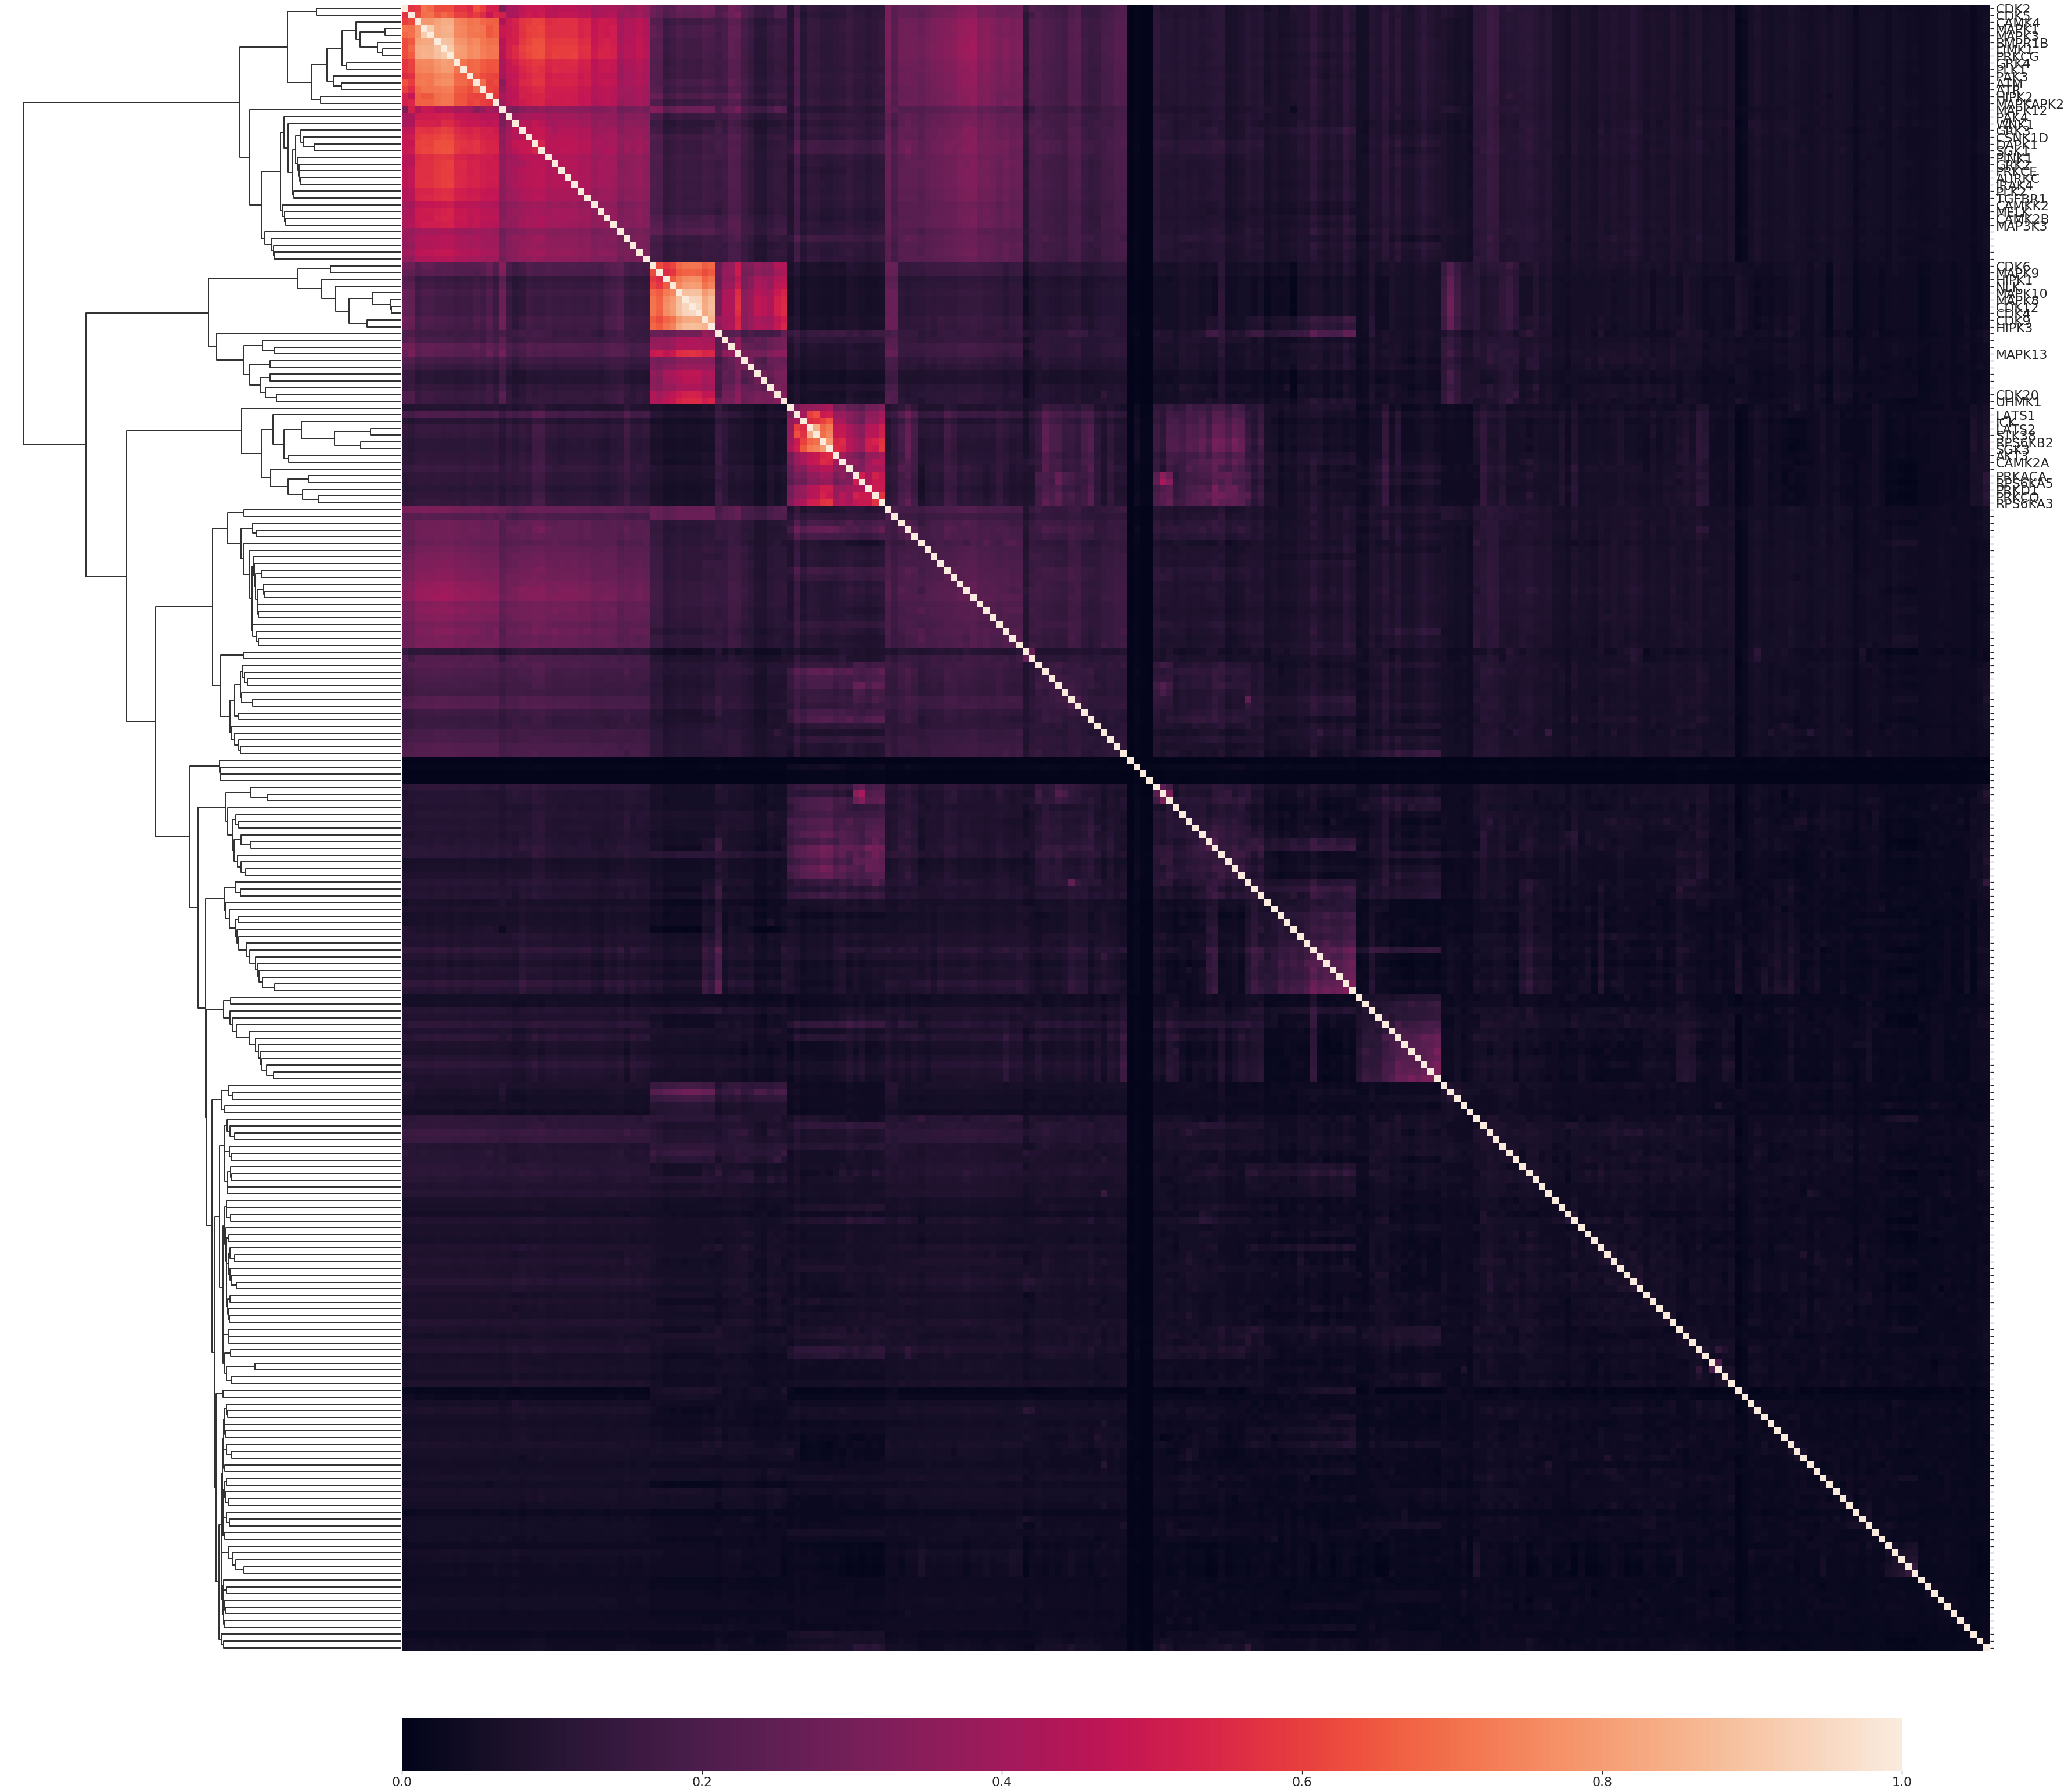

In [6]:
gpsm_y_heat,gpsm_y_normalized_heat, gpsm_y_heatlist = kinase_mutual_information.within__predictors(gpsm_y, 'Kinase Name', 'substrate_id', heatmap_s_data_dir  + d_type +'_GPS5.0_med_Y_kinase_heatmap_df')
plot_kinase_heatmap.plot_kinase_heatmap(gpsm_y_normalized_heat, heatmap_s_dir + d_type +'_GPS5.0_med_Y_kinase','','','y')

gpsm_st_heat,gpsm_st_normalized_heat, gpsm_st_heatlist = kinase_mutual_information.within__predictors(gpsm_st, 'Kinase Name', 'substrate_id', heatmap_s_data_dir  + d_type +'_GPS5.0_med_ST_kinase_heatmap_df')
plot_kinase_heatmap.plot_kinase_heatmap(gpsm_st_normalized_heat, heatmap_s_dir + d_type +'_GPS5.0_med_ST_kinase','','','st')


**high**

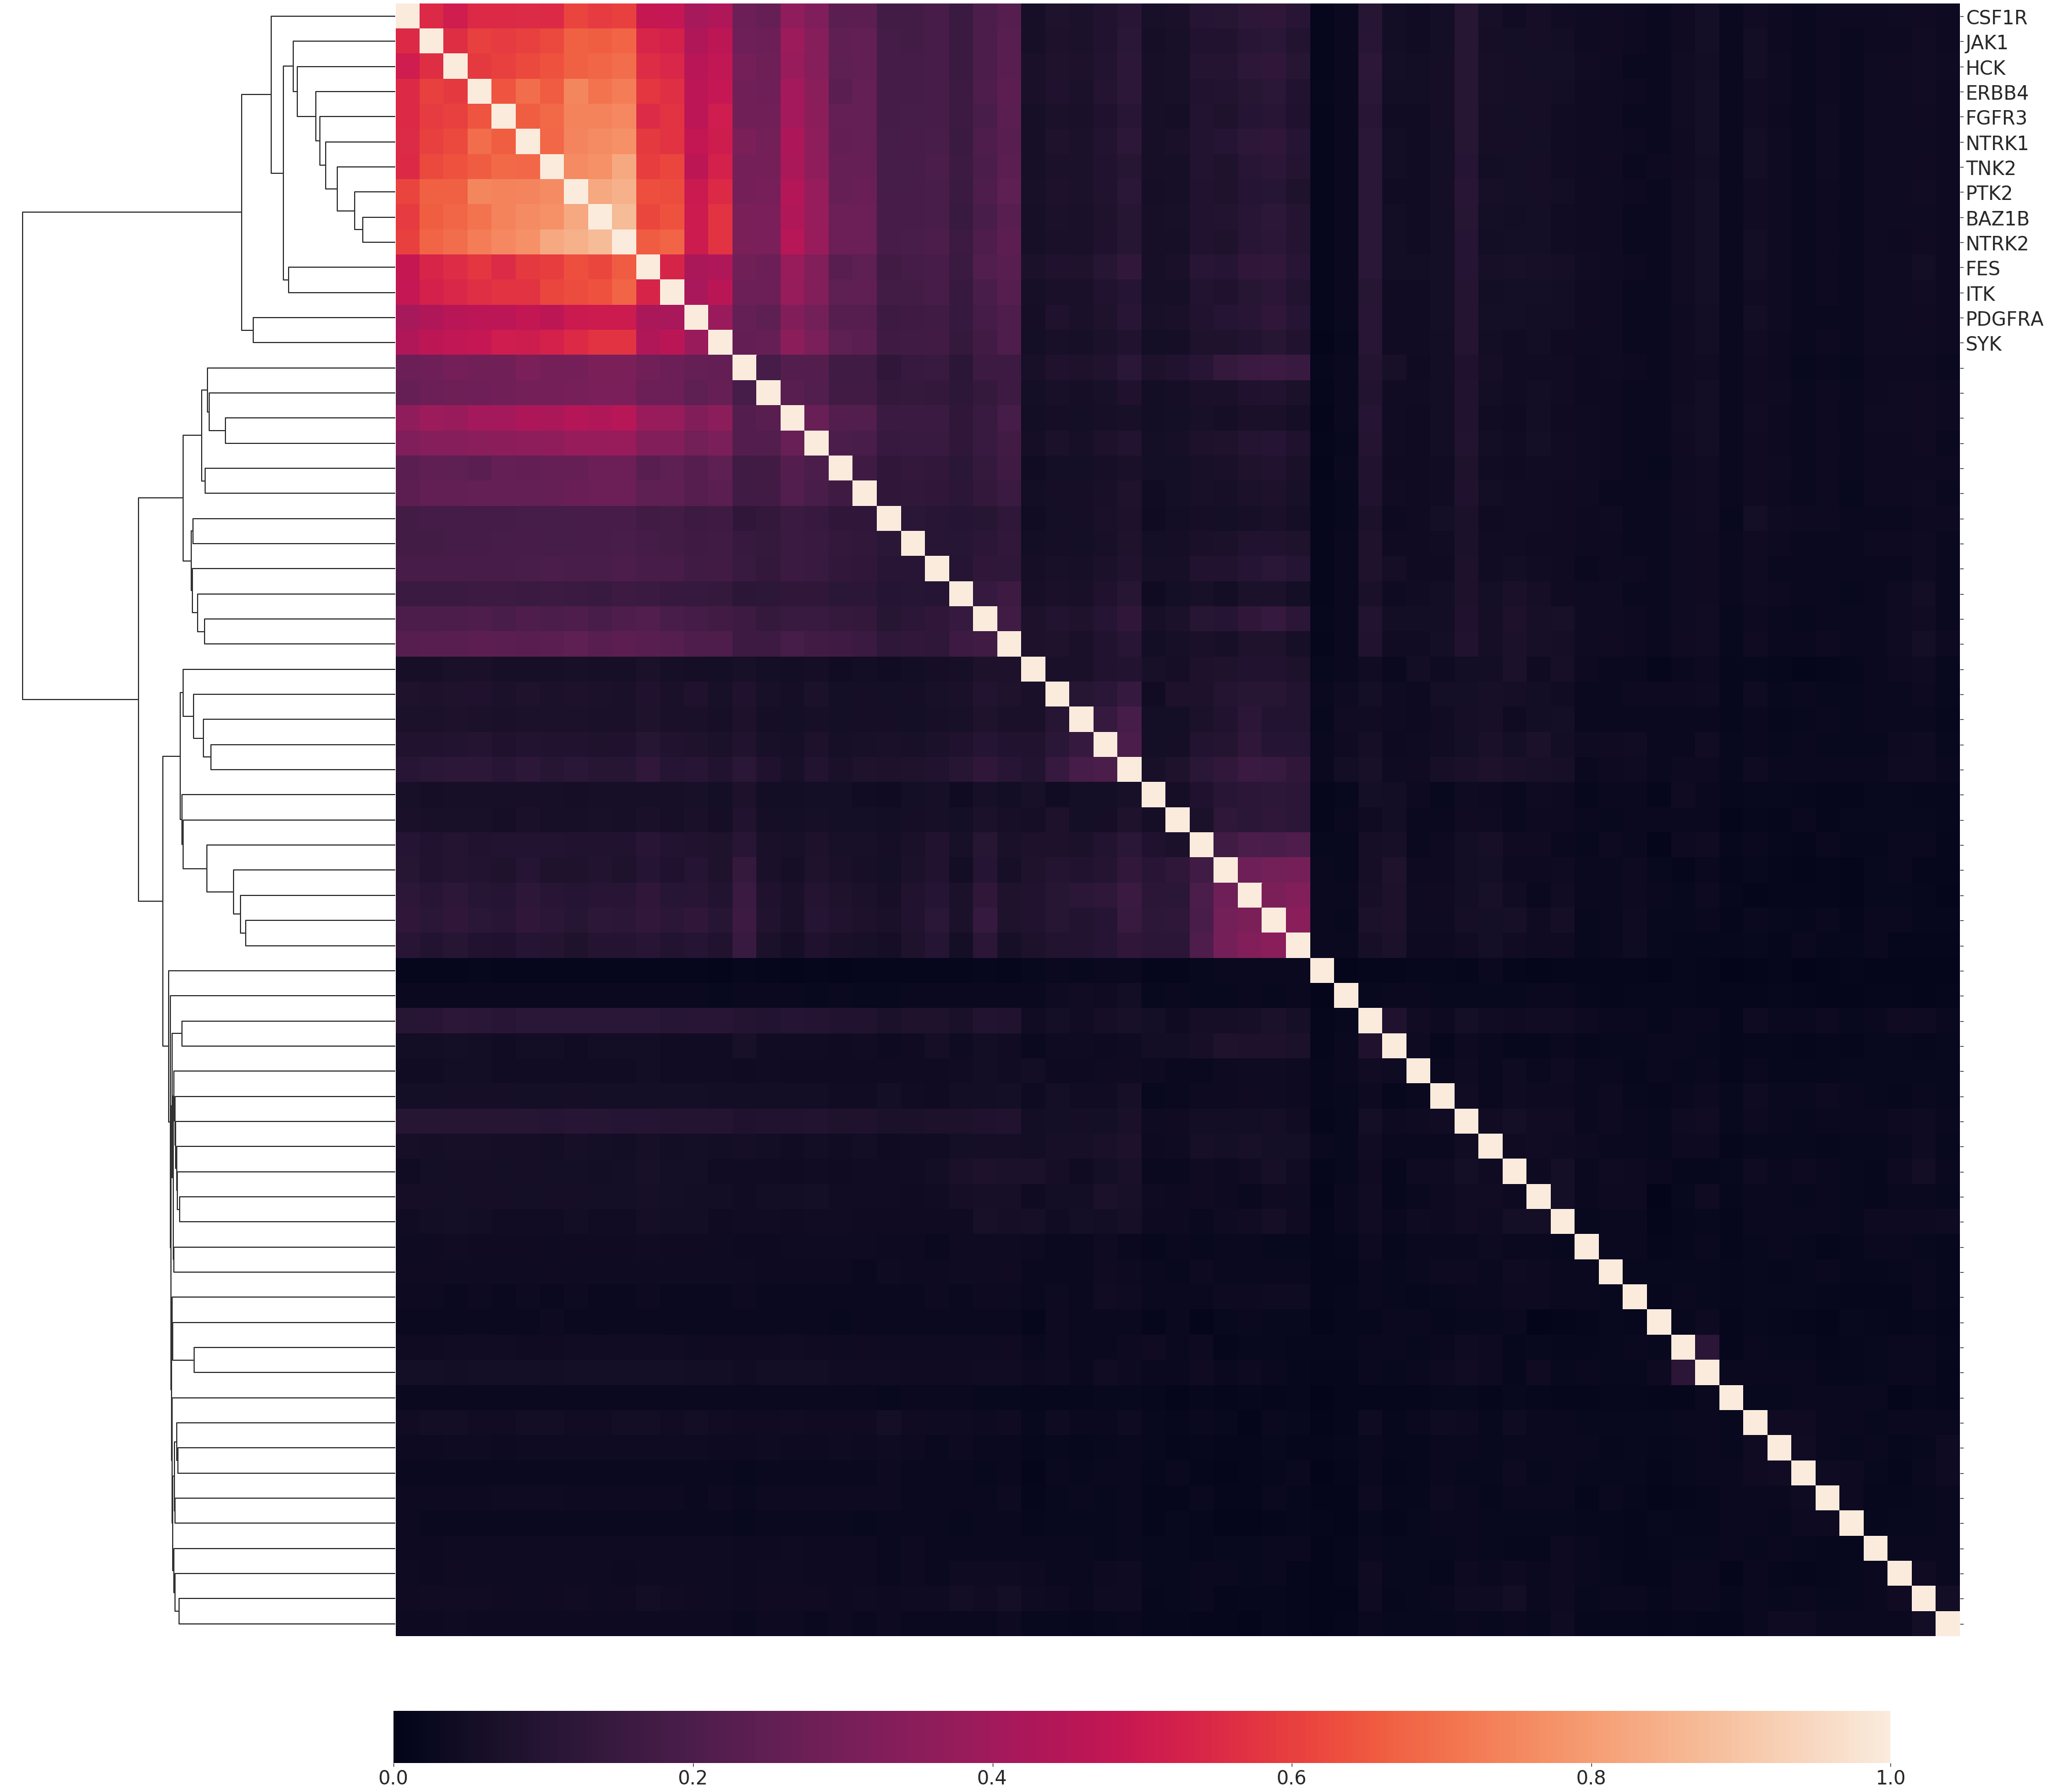

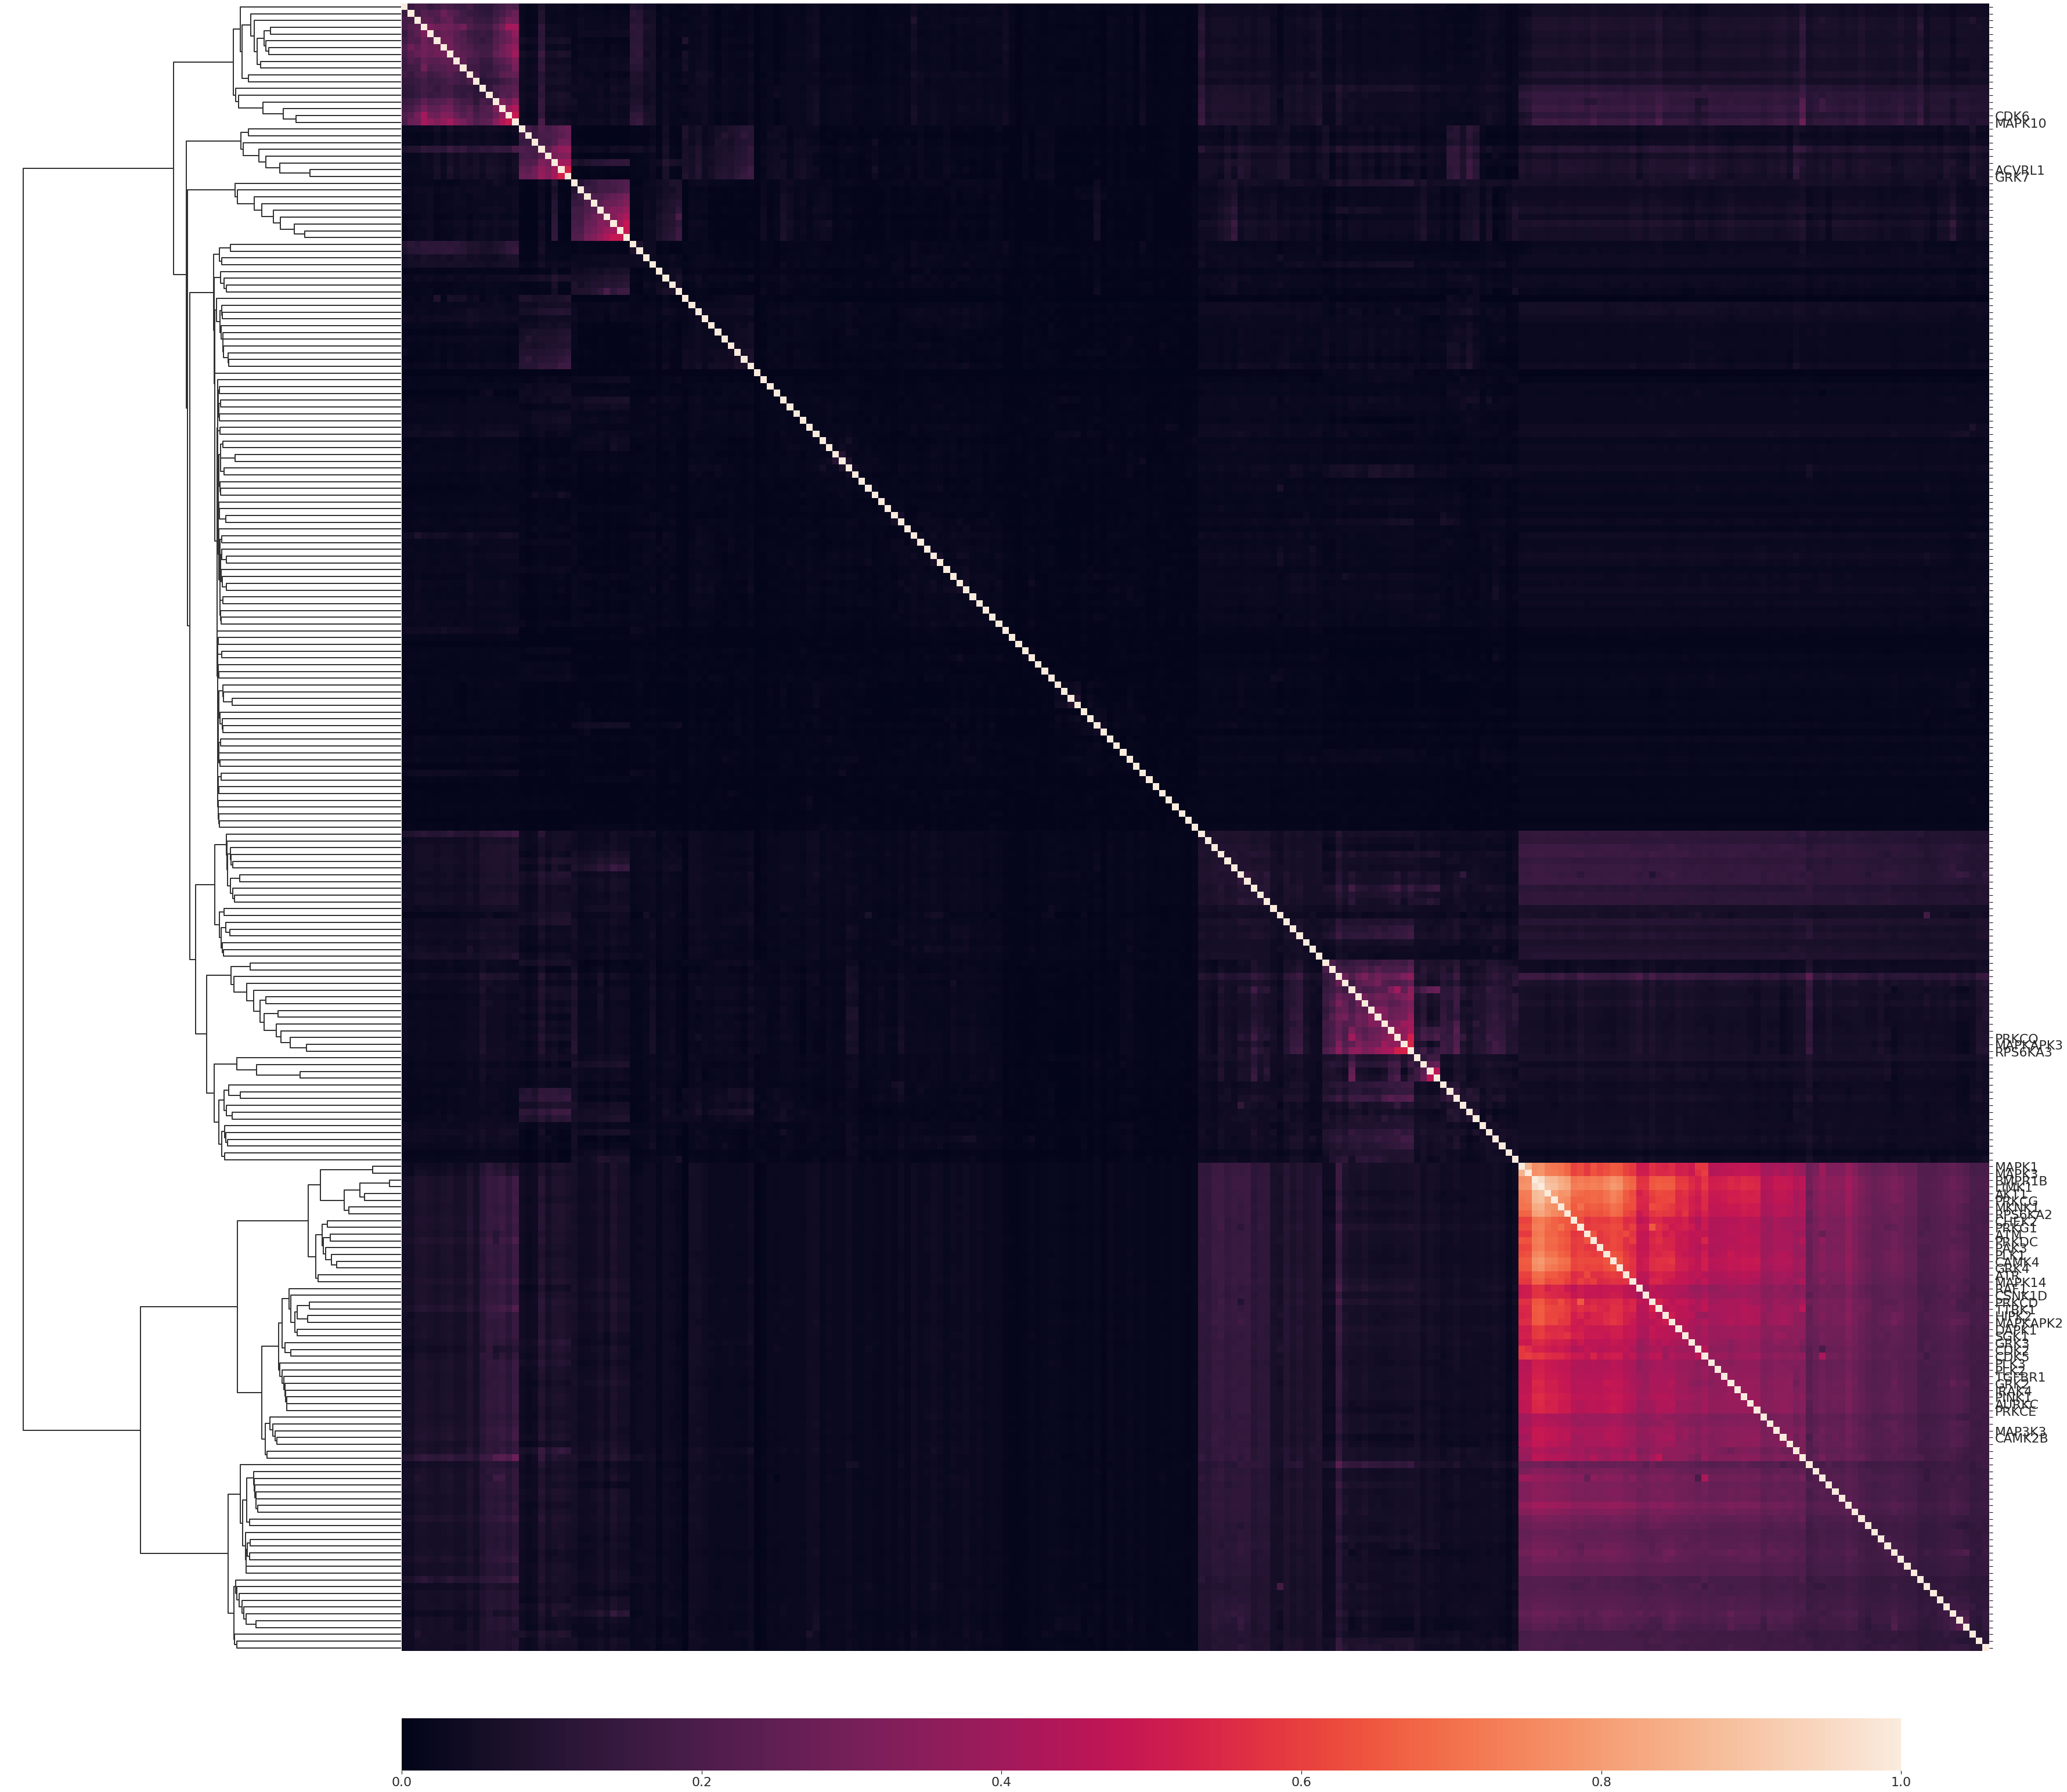

In [7]:
gpsh_y_heat,gpsh_y_normalized_heat, gpsh_y_heatlist = kinase_mutual_information.within__predictors(gpsh_y, 'Kinase Name', 'substrate_id', heatmap_s_data_dir  + d_type +'_GPS5.0_high_Y_kinase_heatmap_df')
plot_kinase_heatmap.plot_kinase_heatmap(gpsh_y_normalized_heat, heatmap_s_dir + d_type +'_GPS5.0_high_Y_kinase','','','y')

gpsh_st_heat,gpsh_st_normalized_heat, gpsh_st_heatlist = kinase_mutual_information.within__predictors(gpsh_st, 'Kinase Name', 'substrate_id', heatmap_s_data_dir  + d_type +'_GPS5.0_high_ST_kinase_heatmap_df')
plot_kinase_heatmap.plot_kinase_heatmap(gpsh_st_normalized_heat, heatmap_s_dir + d_type +'_GPS5.0_high_ST_kinase','','','st')


### NetworKIN
**low**

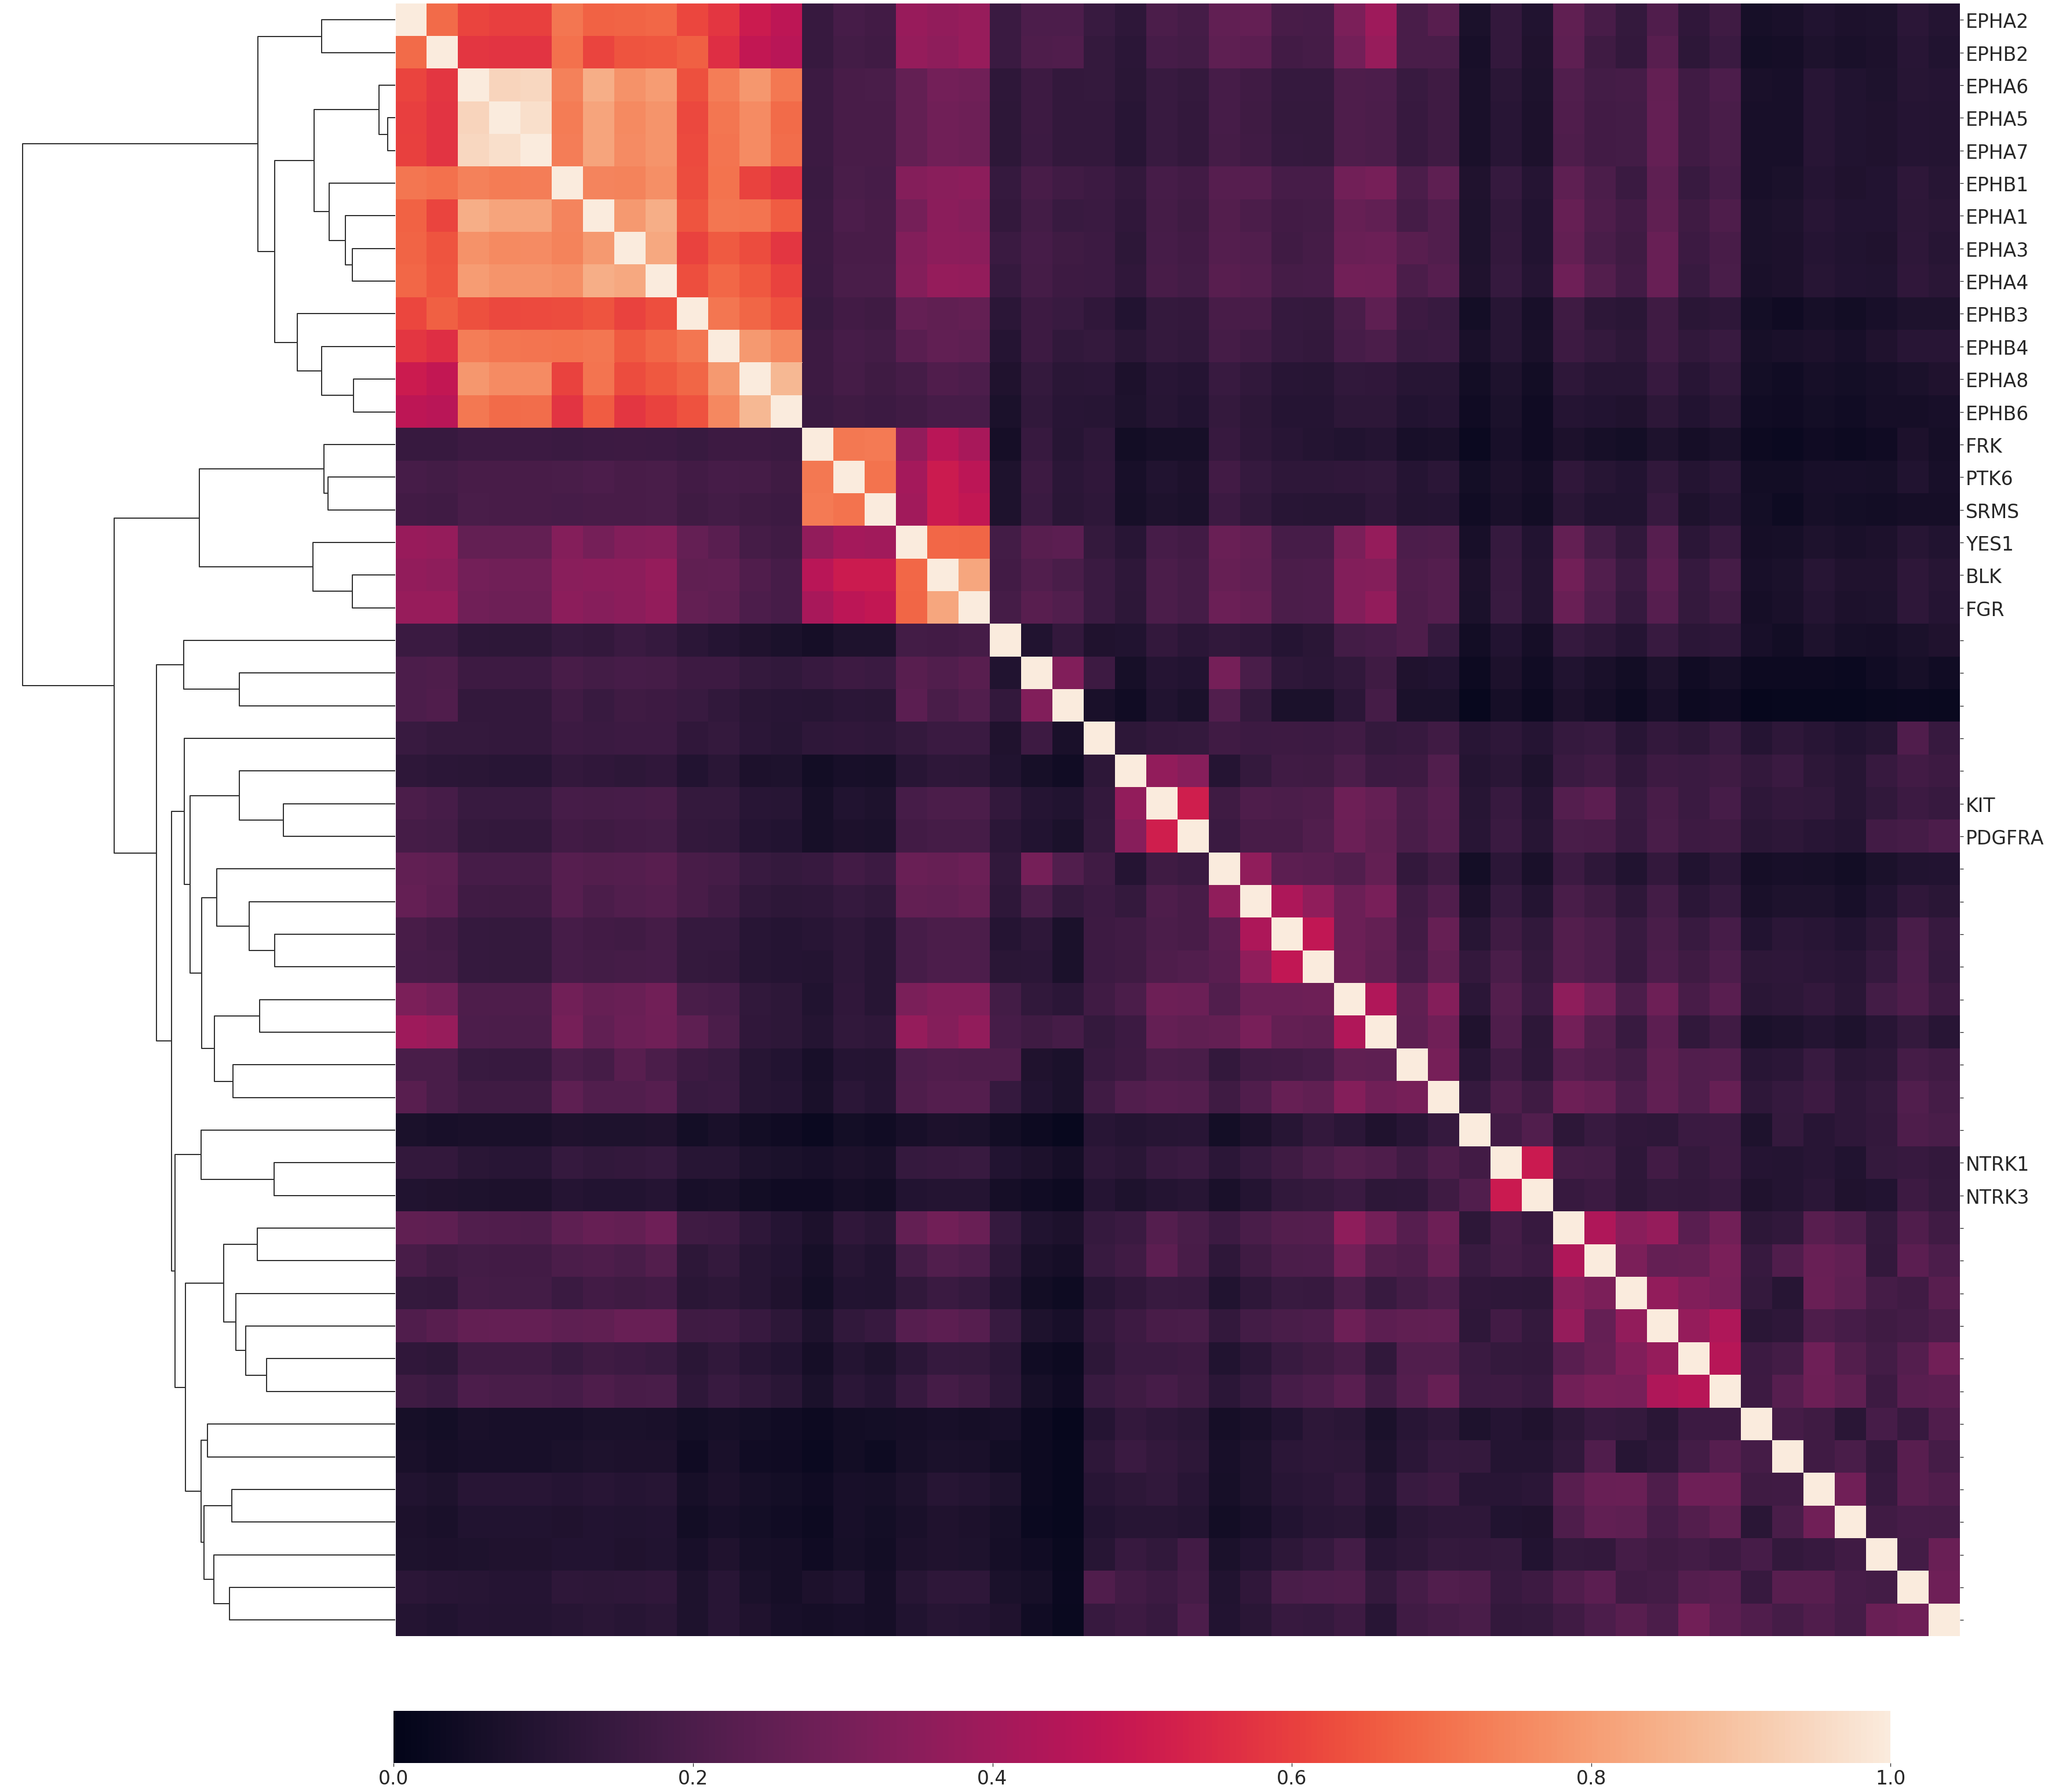

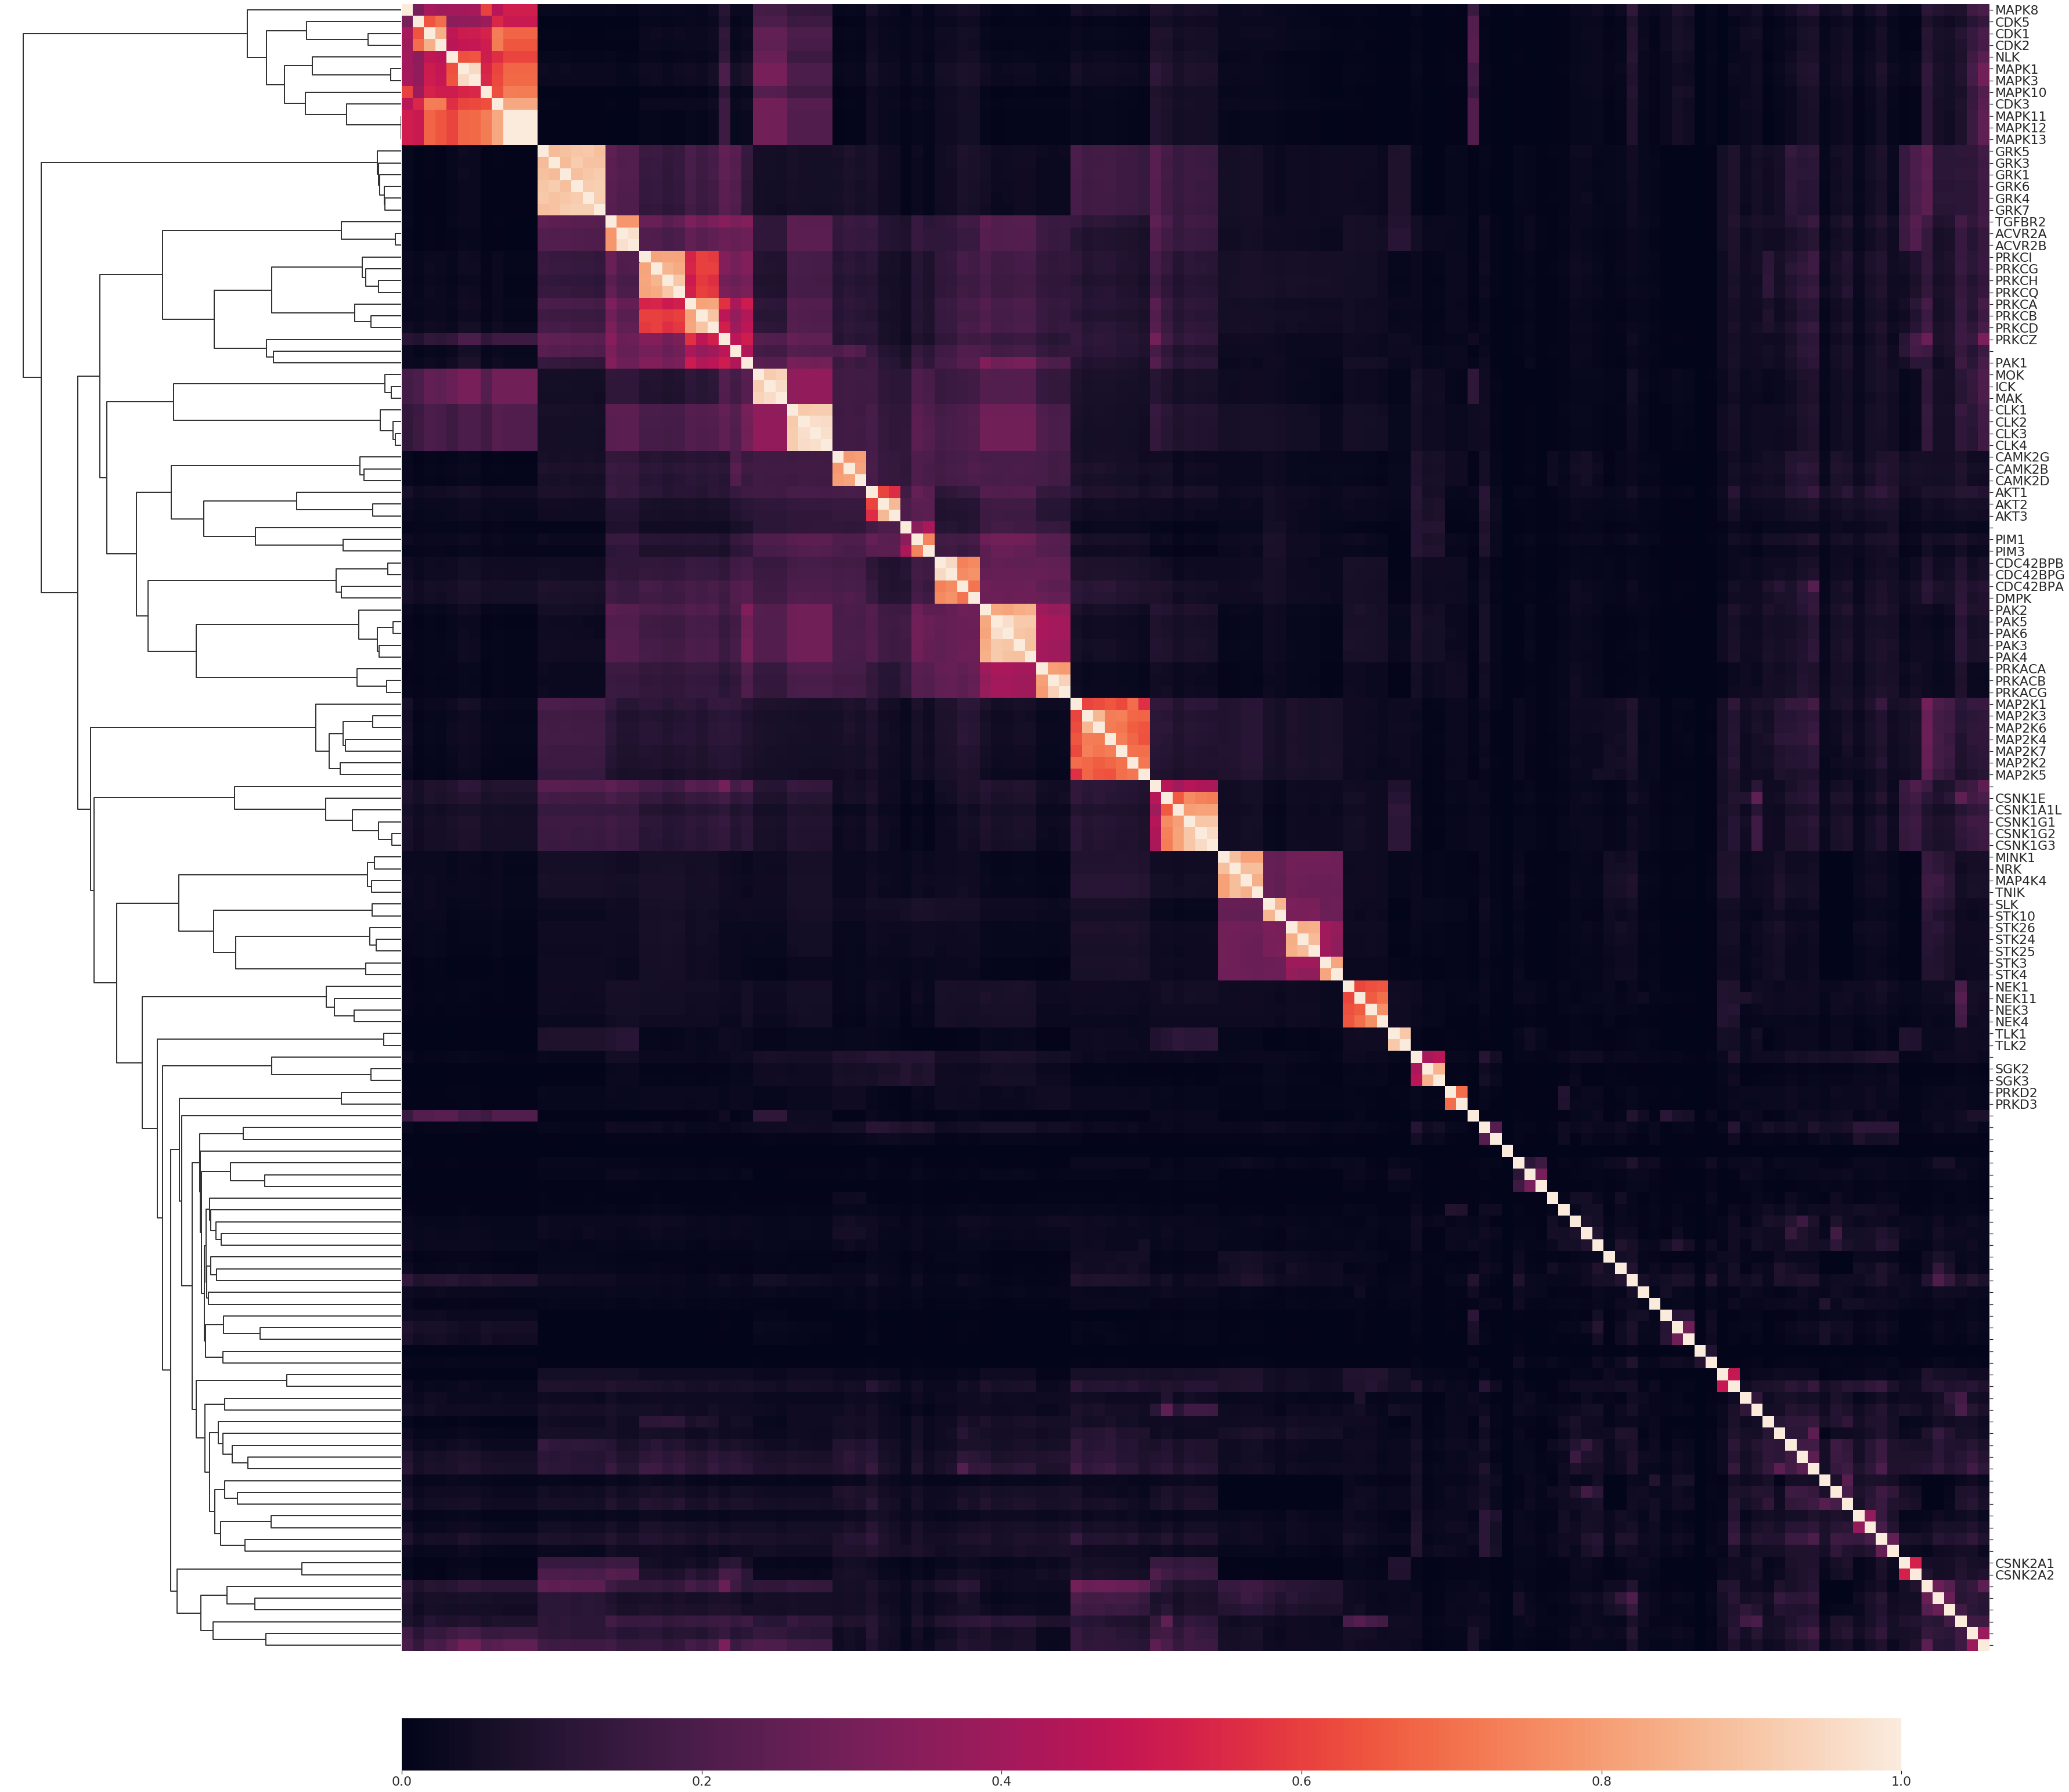

In [8]:
nw03_y_heat,nw03_y_normalized_heat, nw03_y_heatlist = kinase_mutual_information.within__predictors(nw03_y, 'Kinase Name', 'substrate_id', heatmap_s_data_dir  + d_type +'_NetworKIN_low_Y_kinase_heatmap_df')
plot_kinase_heatmap.plot_kinase_heatmap(nw03_y_normalized_heat, heatmap_s_dir + d_type +'_NetworKIN_low_Y_kinase','','','y')

nw03_st_heat,nw03_st_normalized_heat, nw03_st_heatlist = kinase_mutual_information.within__predictors(nw03_st, 'Kinase Name', 'substrate_id', heatmap_s_data_dir  + d_type +'_NetworKIN_low_ST_kinase_heatmap_df')
plot_kinase_heatmap.plot_kinase_heatmap(nw03_st_normalized_heat, heatmap_s_dir + d_type +'_NetworKIN_low_ST_kinase','','','st')


**medium**

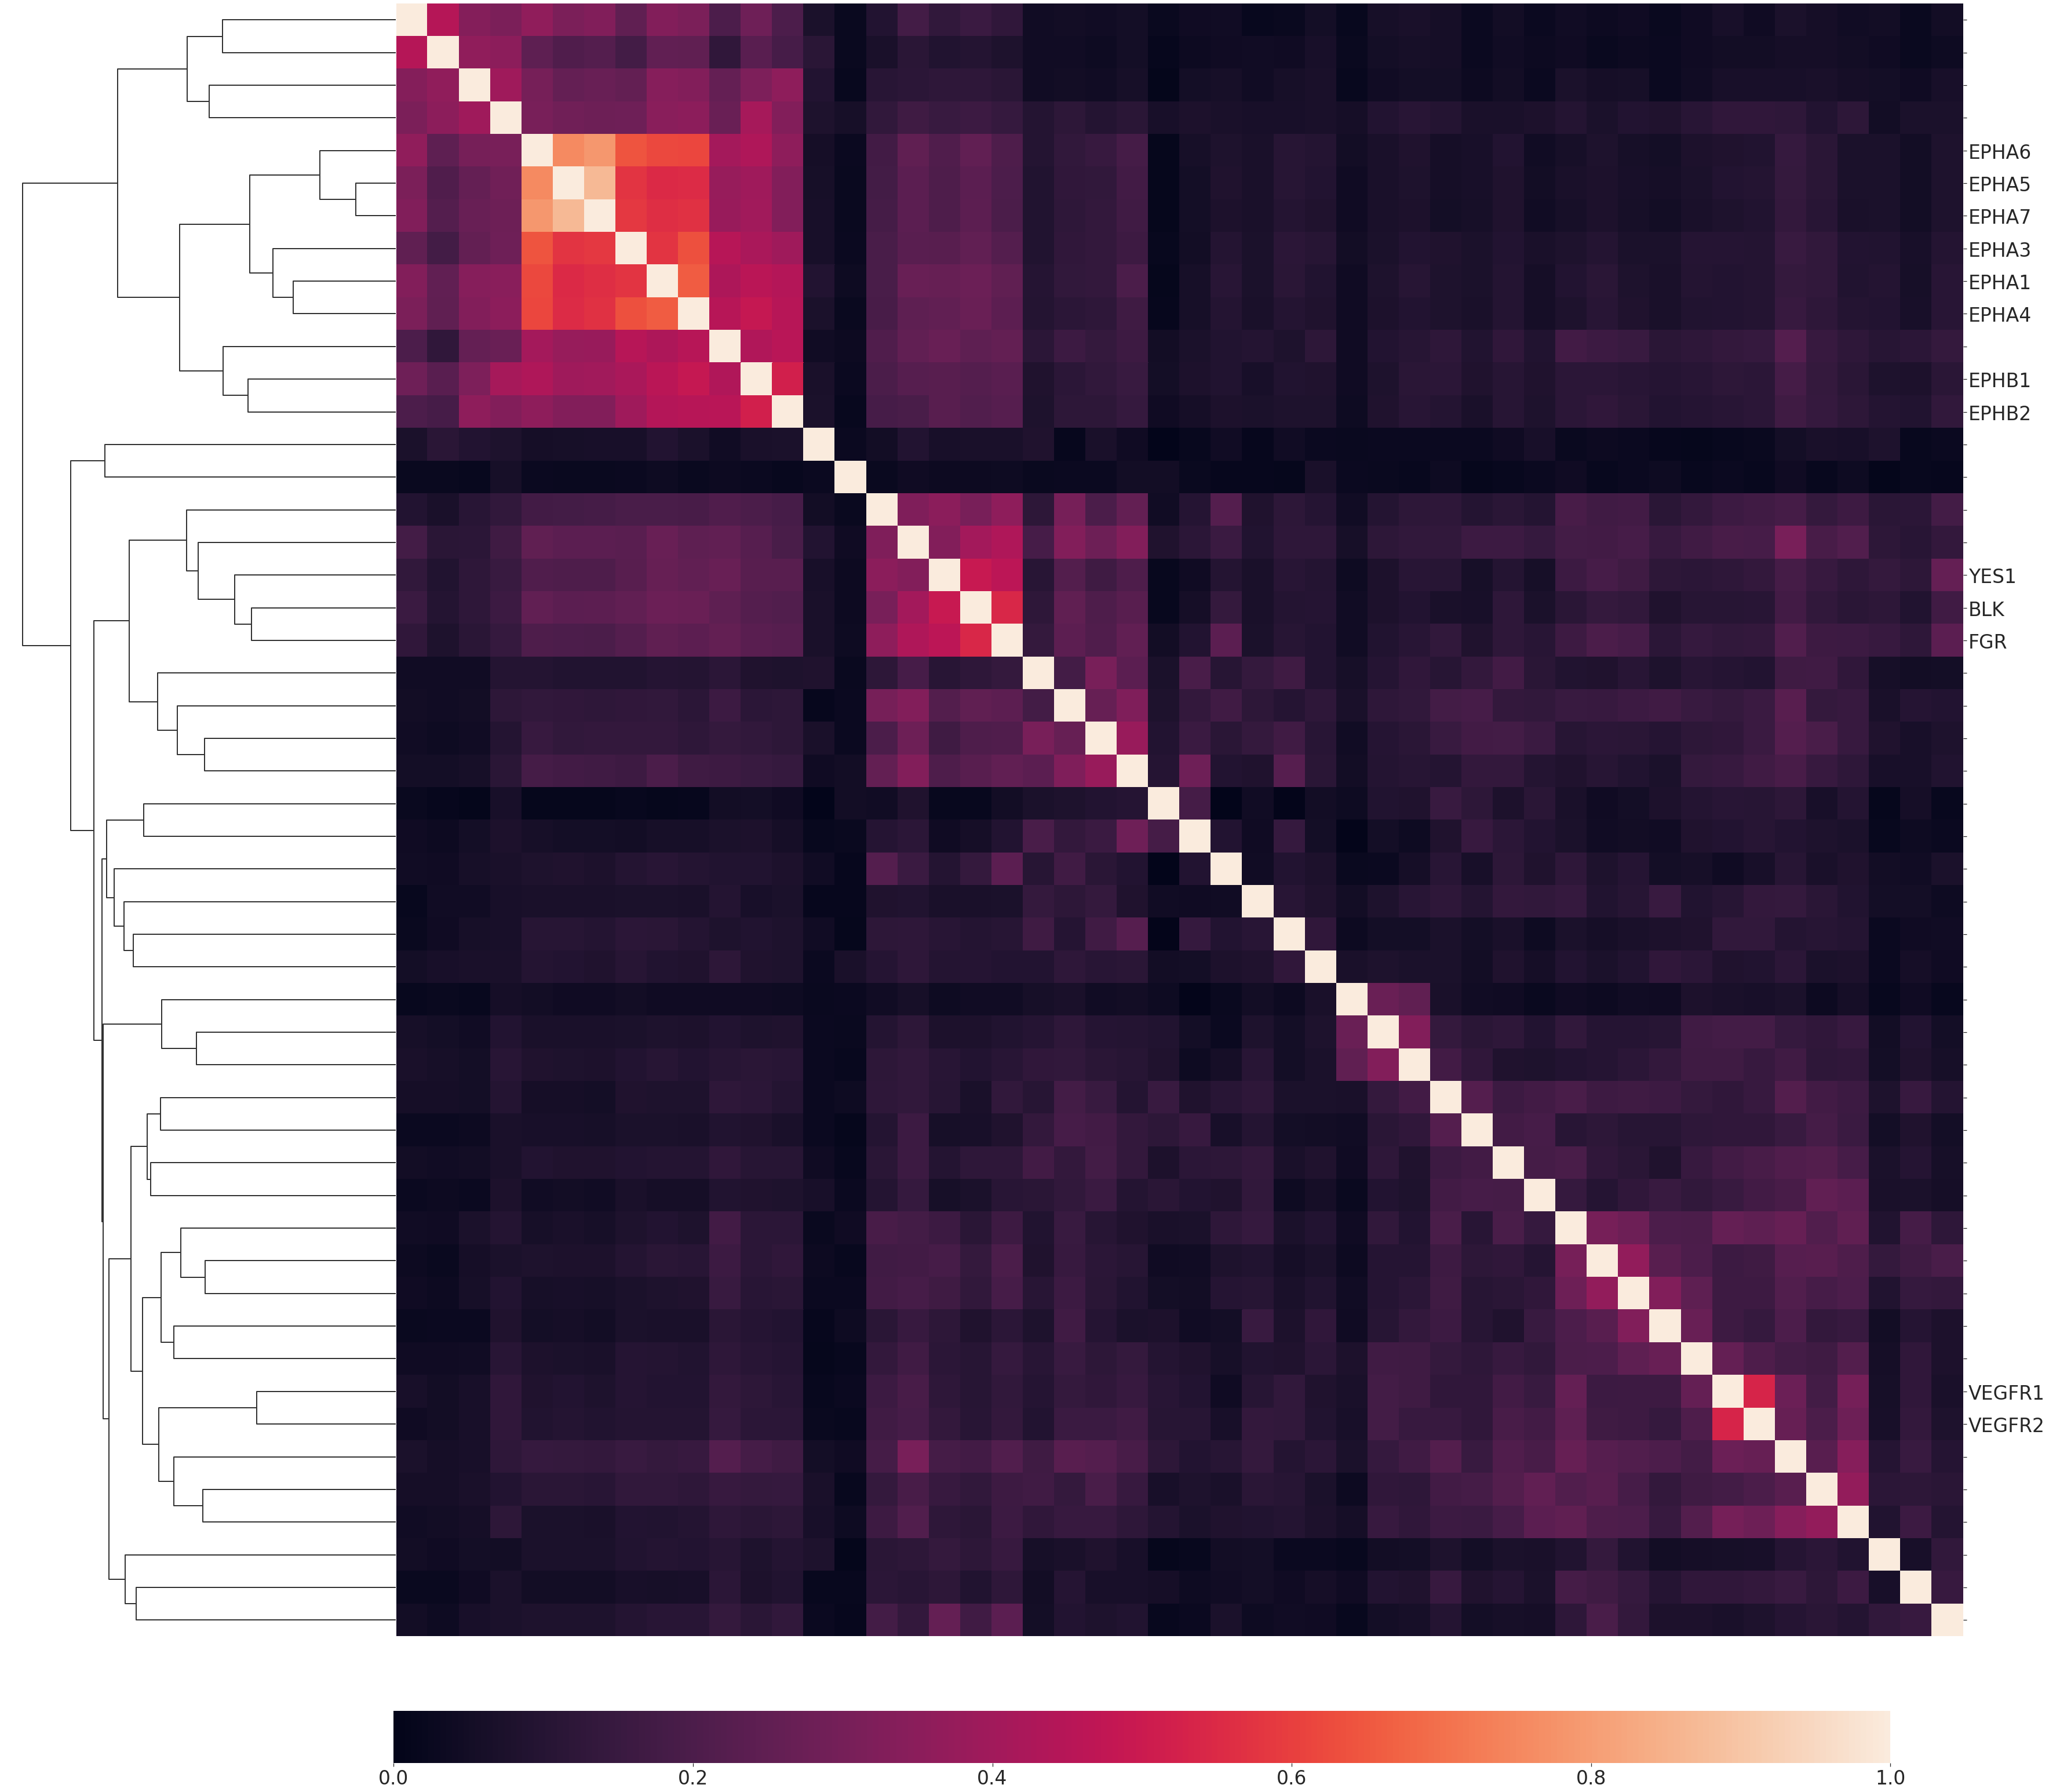

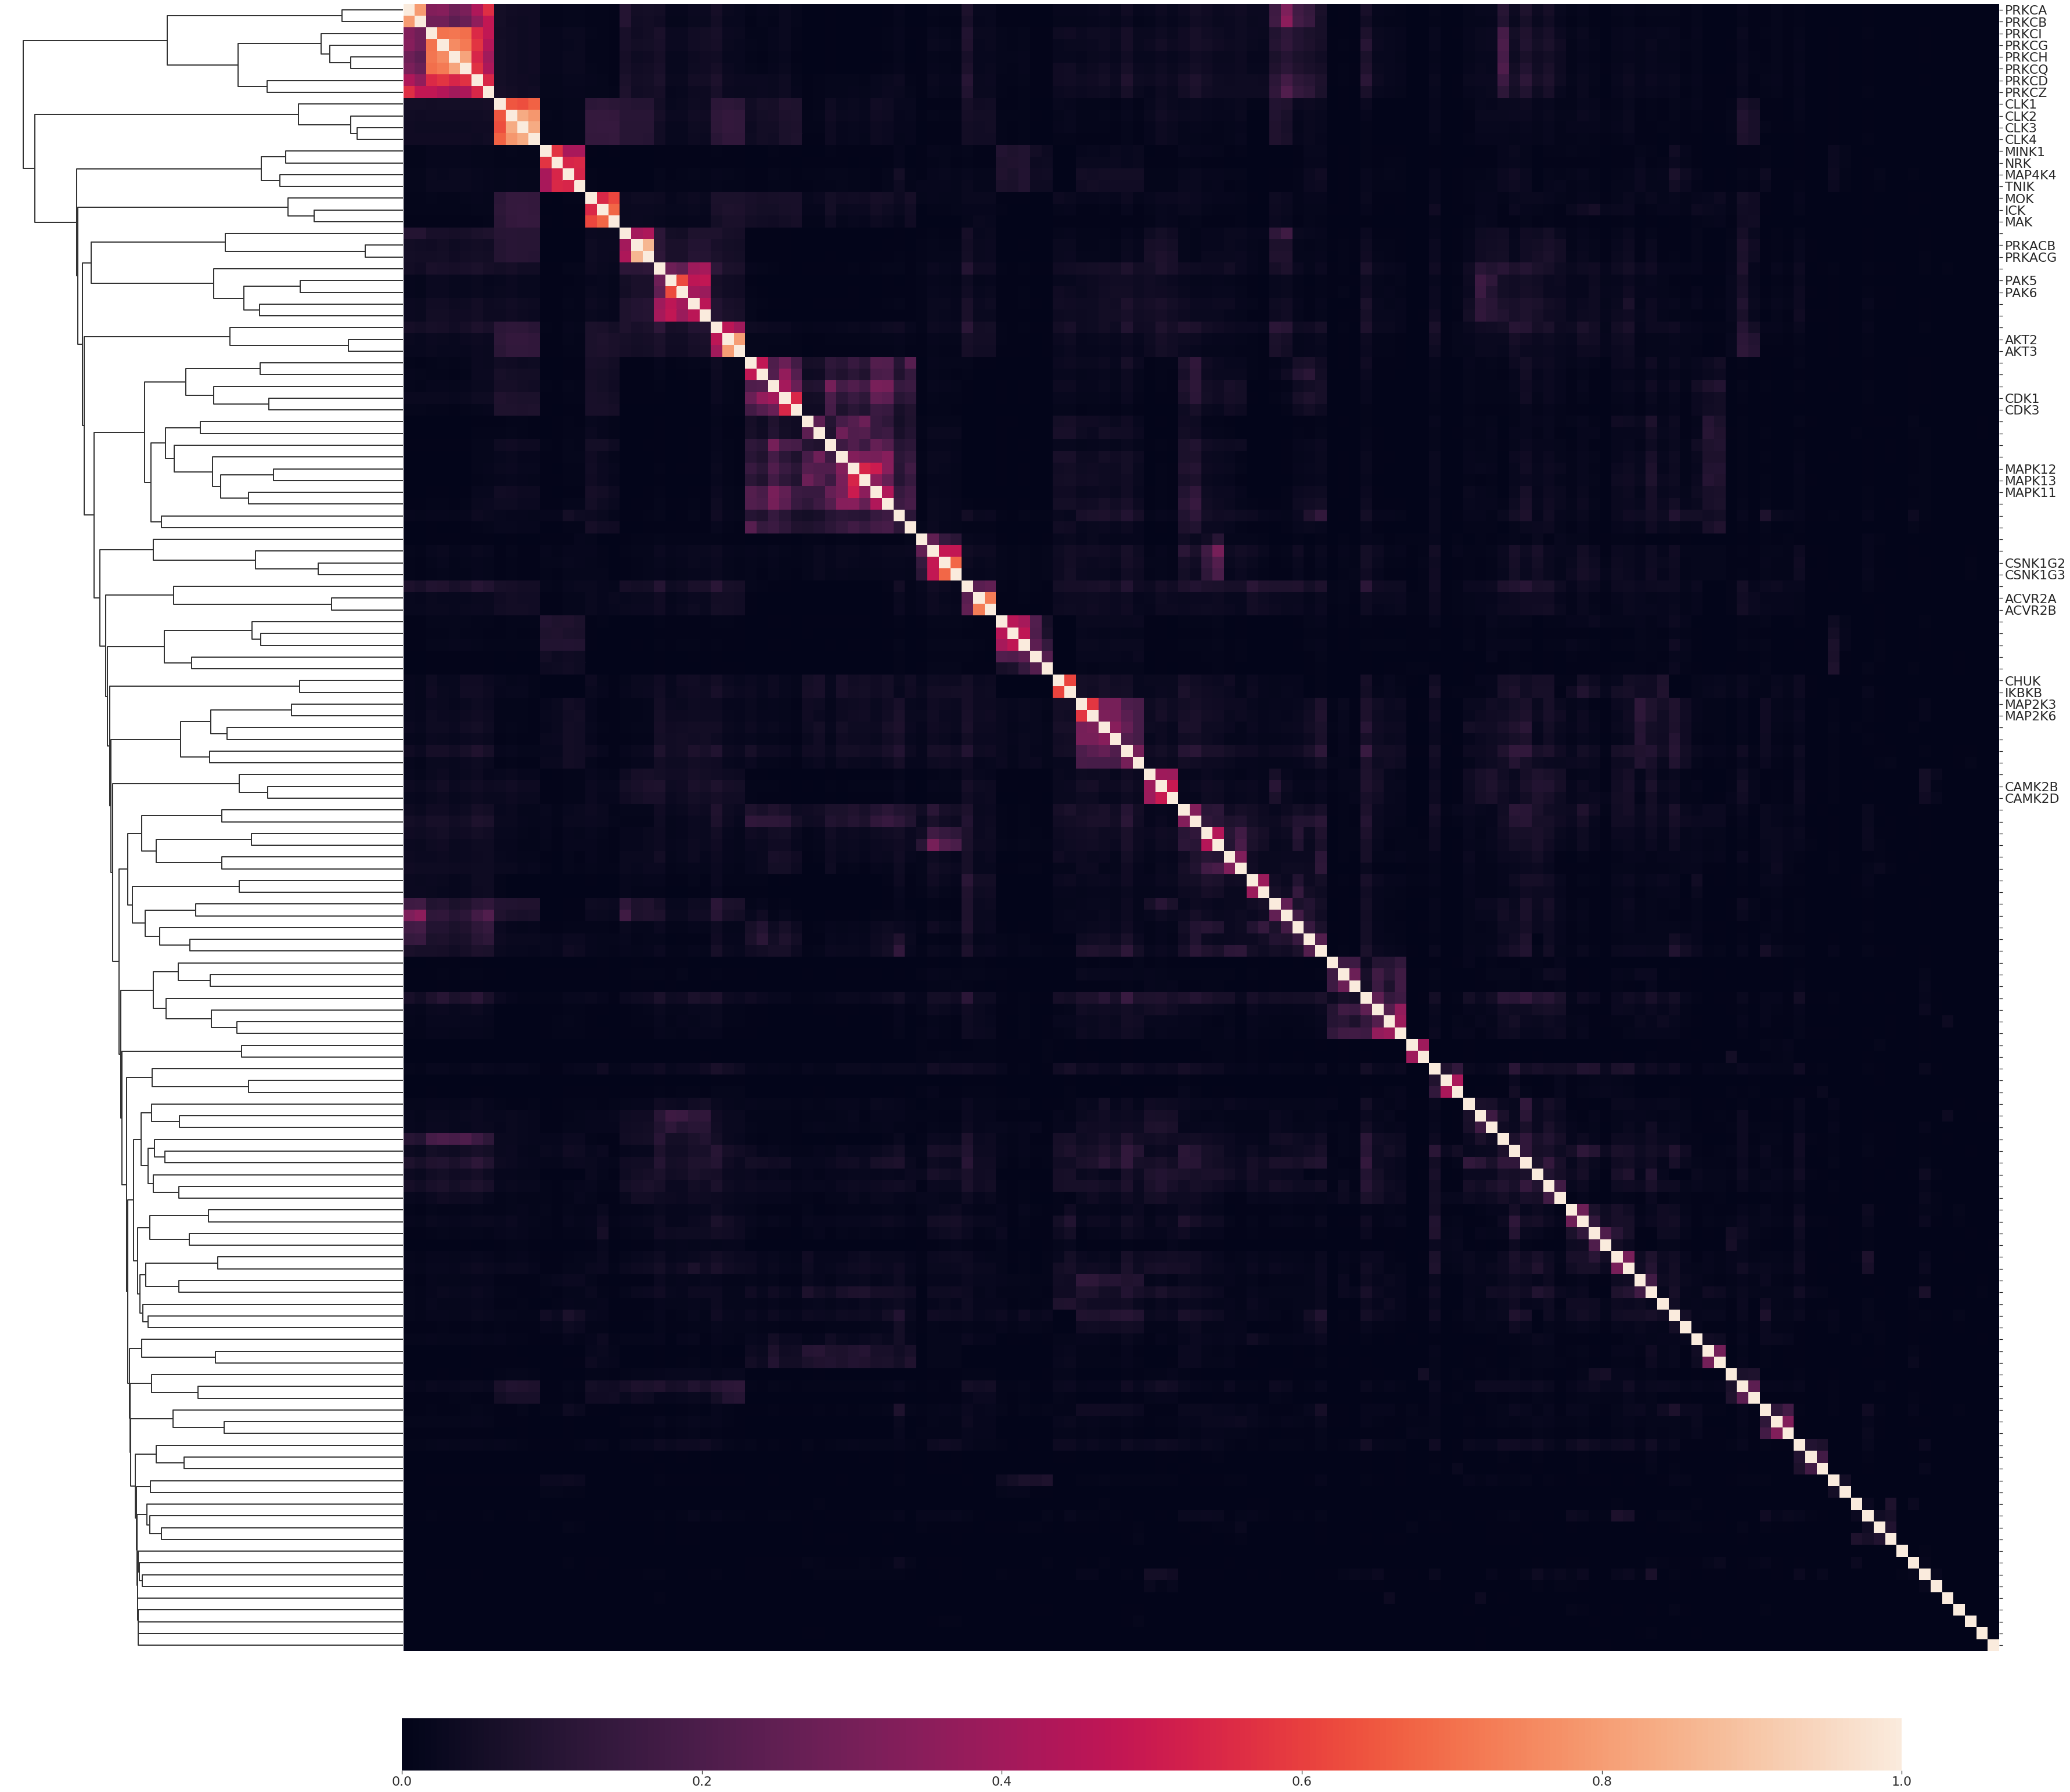

In [9]:
nw05_y_heat,nw05_y_normalized_heat, nw05_y_heatlist = kinase_mutual_information.within__predictors(nw05_y, 'Kinase Name', 'substrate_id', heatmap_s_data_dir  + d_type +'_NetworKIN_med_Y_kinase_heatmap_df')
plot_kinase_heatmap.plot_kinase_heatmap(nw05_y_normalized_heat, heatmap_s_dir + d_type +'_NetworKIN_med_Y_kinase','','','y')

nw05_st_heat,nw05_st_normalized_heat, nw05_st_heatlist = kinase_mutual_information.within__predictors(nw05_st, 'Kinase Name', 'substrate_id', heatmap_s_data_dir  + d_type +'_NetworKIN_med_ST_kinase_heatmap_df')
plot_kinase_heatmap.plot_kinase_heatmap(nw05_st_normalized_heat, heatmap_s_dir + d_type +'_NetworKIN_med_ST_kinase','','','st')

**high**

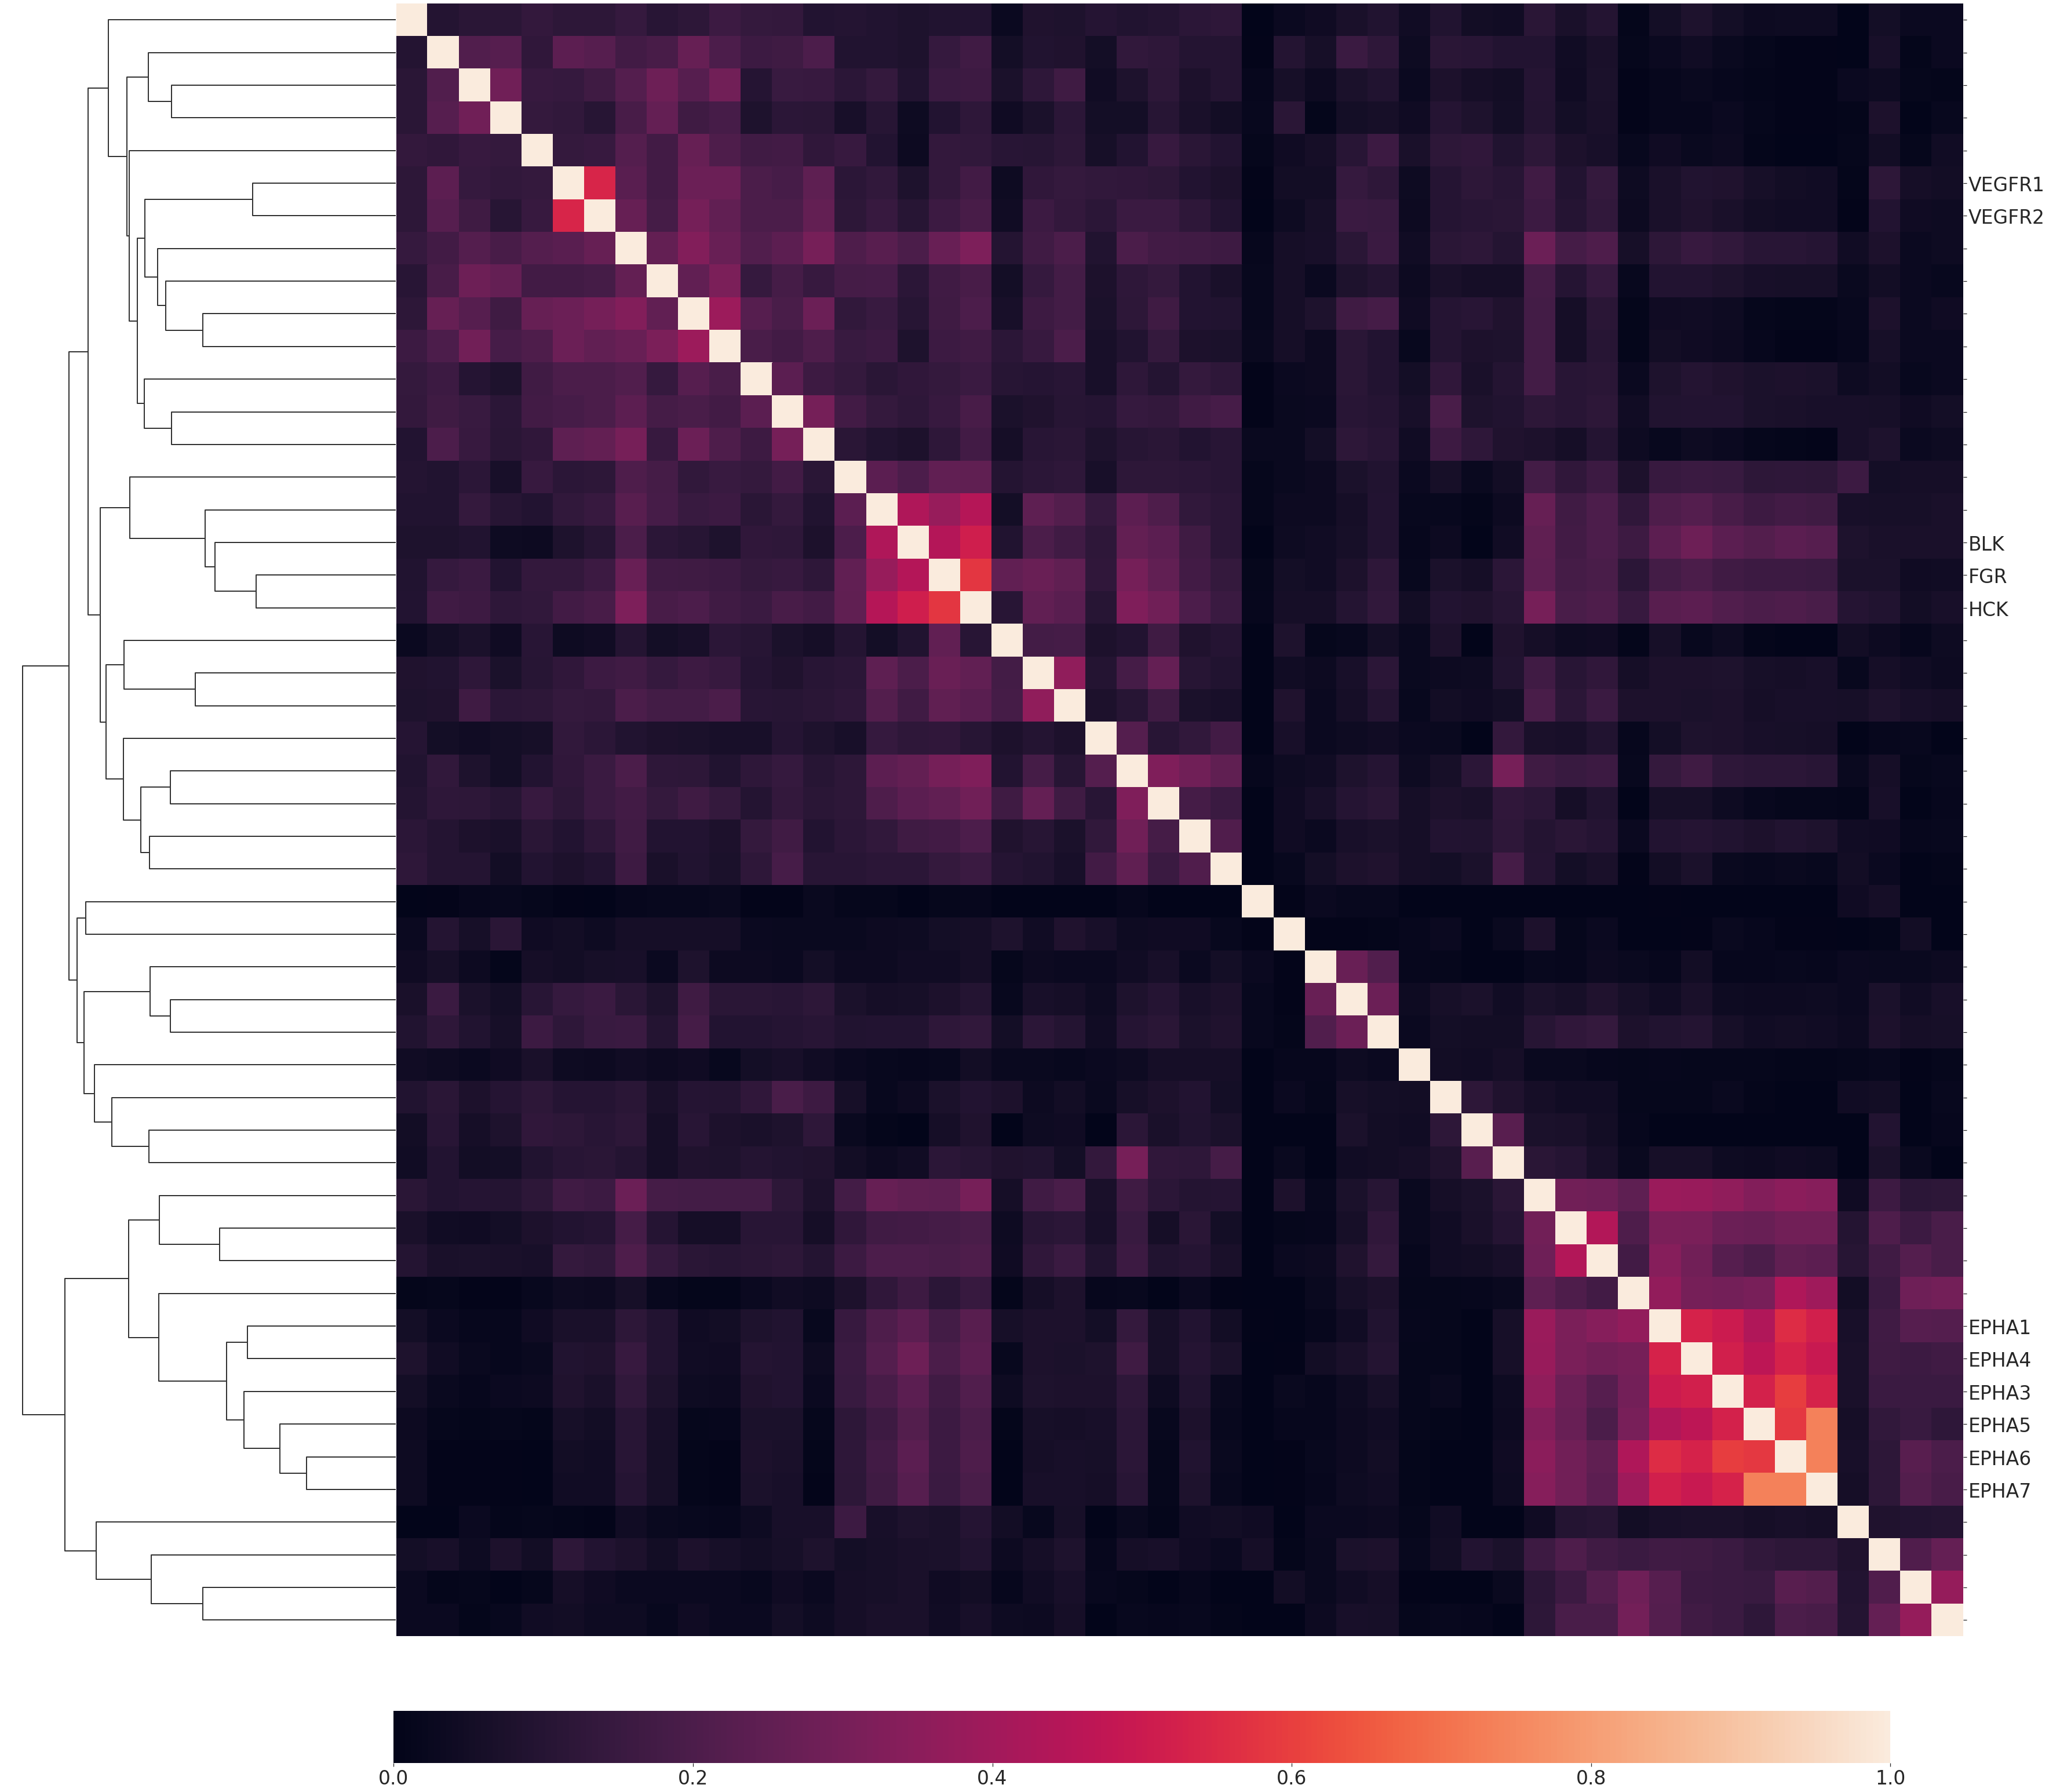

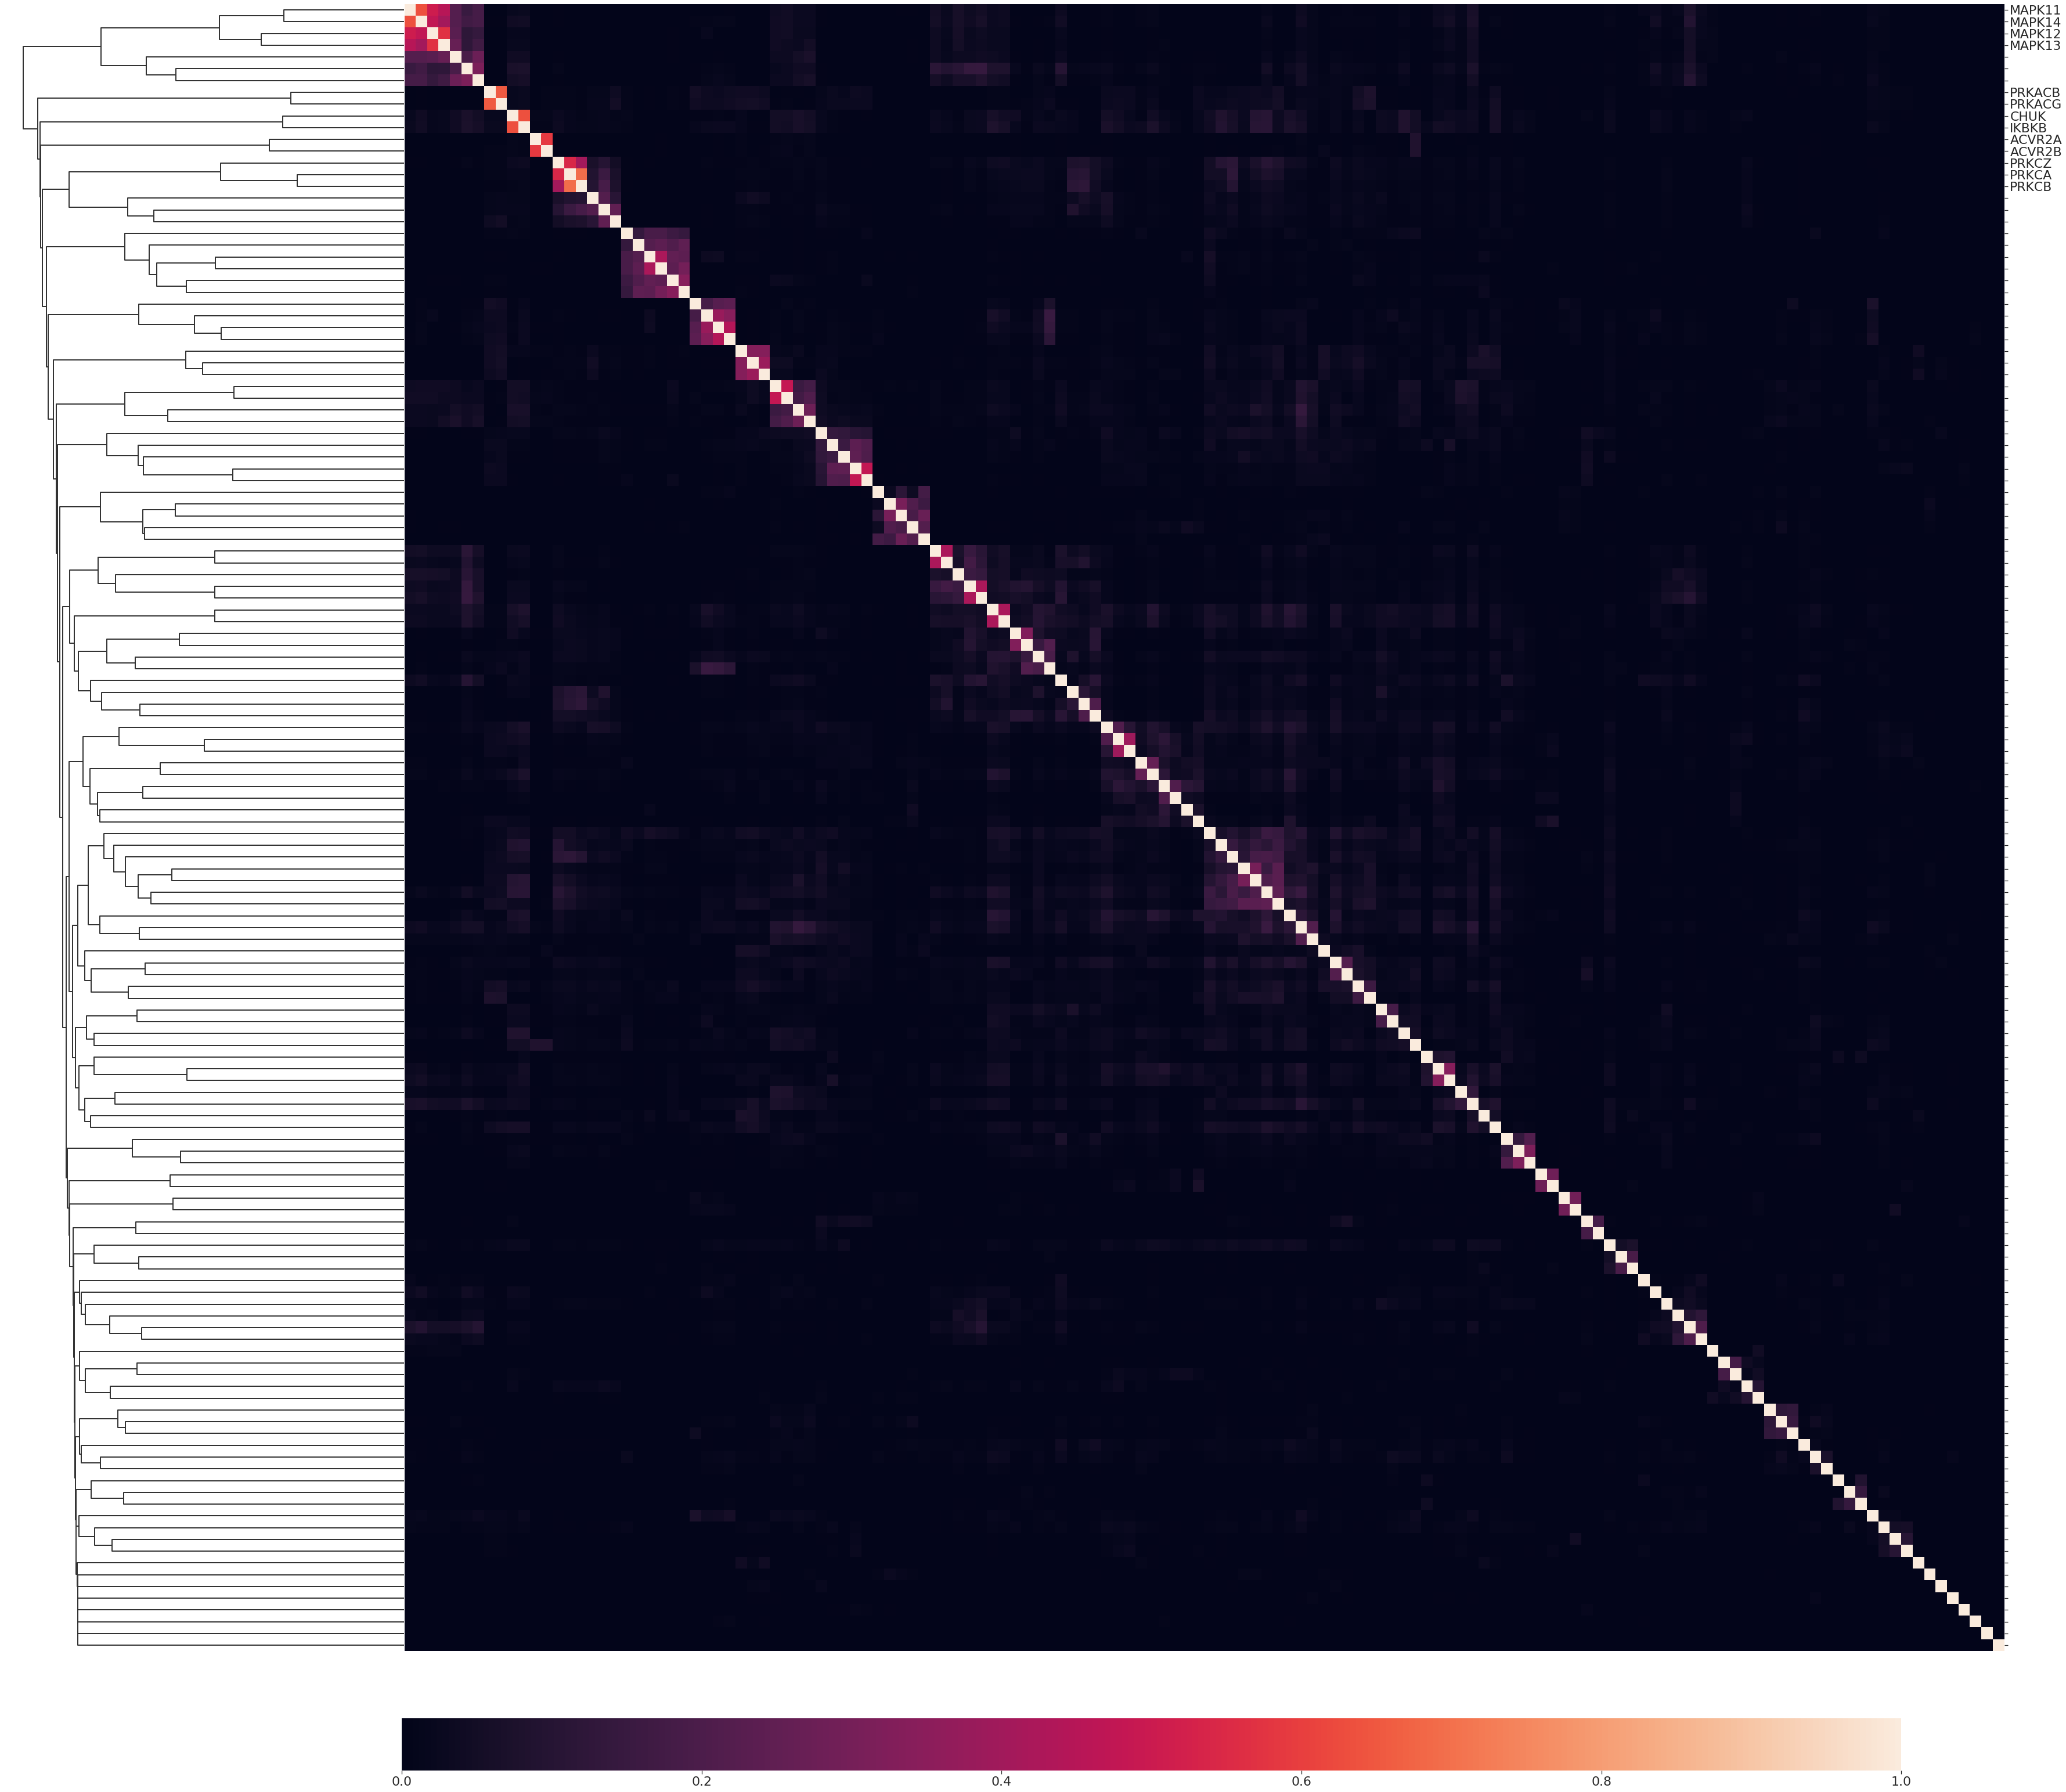

In [10]:
nw1_y_heat,nw1_y_normalized_heat, nw1_y_heatlist = kinase_mutual_information.within__predictors(nw1_y, 'Kinase Name', 'substrate_id', heatmap_s_data_dir  + d_type +'_NetworKIN_high_Y_kinase_heatmap_df')
plot_kinase_heatmap.plot_kinase_heatmap(nw1_y_normalized_heat, heatmap_s_dir + d_type +'_NetworKIN_high_Y_kinase','','','y')

nw1_st_heat,nw1_st_normalized_heat, nw1_st_heatlist = kinase_mutual_information.within__predictors(nw1_st, 'Kinase Name', 'substrate_id', heatmap_s_data_dir  + d_type +'_NetworKIN_high_ST_kinase_heatmap_df')
plot_kinase_heatmap.plot_kinase_heatmap(nw1_st_normalized_heat, heatmap_s_dir + d_type +'_NetworKIN_high_ST_kinase','','','st')


### Network Diagrams

In [6]:
def plotNetworkFigure(df, JIThreshold):
    """
    This creates an unweighted, undirected graph of all connections where the JI index is greater 
    than the JIThreshold (0.49 is used in the paper)
    
    Returns a figure handle
    """
    
    #set values below threshold to 0
    df[df < JIThreshold] = 0
    #remove any rows and columns that sum to 1.0
    names = df.sum()>1.0
    dfRowDrop = df[df.sum()>1.0]
    toKeep = list(dfRowDrop.index)
    df = dfRowDrop[toKeep]
    #df.drop(names, axis=0)
    #write percentage of kinases that participate in these
    print("Original: %d, new: %d, Fraction=%0.2f"%(len(df_orig), len(df), len(df)/len(df_orig)))
    
    G = nx.from_pandas_adjacency(df)
    # figsize is intentionally set small to condense the graph
    fig, ax = plt.subplots(figsize=(20,20))
    margin=0.33
    fig.subplots_adjust(margin, margin, 1.-margin, 1.-margin)
    ax.axis('equal')
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] >= 0.49]
    pos = nx.spring_layout(G)  #planar_layout(G)  #spiral_layout(G)  # positions for all nodes
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=100)
    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge,
                           width=0.5, color='gray')
    # labels
    #add offset 
    pos_higher = {}
    x_off = 0.0  # offset on the y axis
    y_off = 0.05
    indexer = 0
    for k, v in pos.items(): #can use different offsets to move labels around, in hope they are easier to read.
        #if indexer % 2:
        #    pos_higher[k] = (v[0]+x_off, v[1]+y_off)
        #else:
            #pos_higher[k] = (v[0]-x_off, v[1]-y_off)
            pos_higher[k] = (v[0]-x_off, v[1]+y_off)

    #pos_higher = pos
    nx.draw_networkx_labels(G, pos_higher, font_size=10, font_family='sans-serif')
    plt.axis('off')
    plt.show()
    return fig

In [7]:
#do tyrosine networks for each threshold and 
predictors = ['NetworKIN', 'GPS5.0', 'PhosphoPICK']
stringencies = ['low', 'med', 'high']
typeKins = ['Y', 'ST']
files =[]
description = {}

#make a list of all file descriptions
for stringency in stringencies:
    for predictor in predictors:
            for typeKin in typeKins:
                strFile = 'all_'+predictor+'_'+stringency+'_'+typeKin+'_kinase_heatmap_df.csv'
                description[strFile] = [predictor, stringency, typeKin]
                files.append(strFile)
    
JIThreshold = 0.49

Original: 50, new: 23, Fraction=0.46


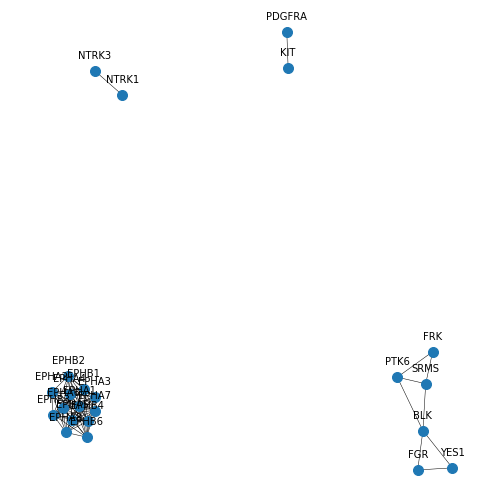

Original: 140, new: 92, Fraction=0.66


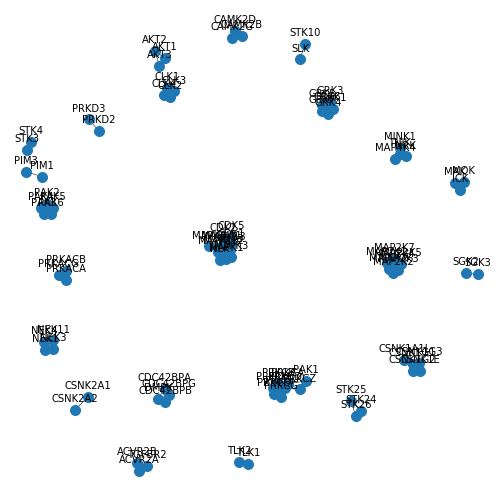

Original: 65, new: 11, Fraction=0.17


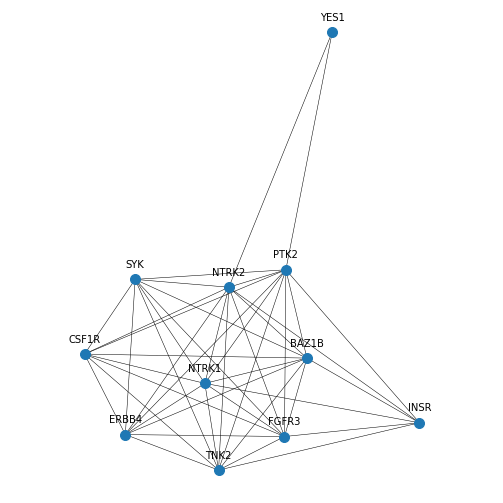

Original: 243, new: 53, Fraction=0.22


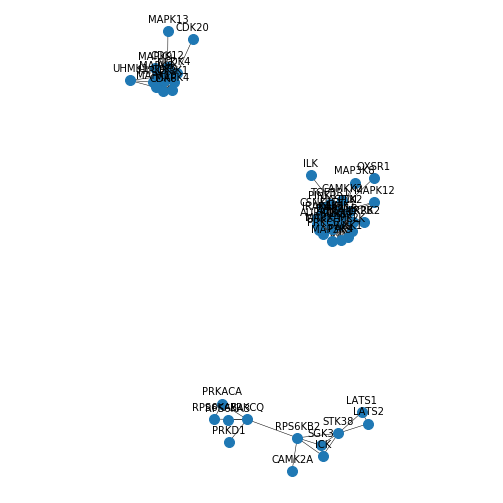

Original: 19, new: 2, Fraction=0.11


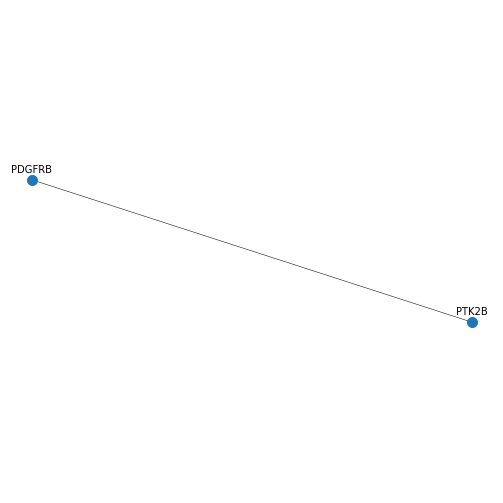

Original: 87, new: 21, Fraction=0.24


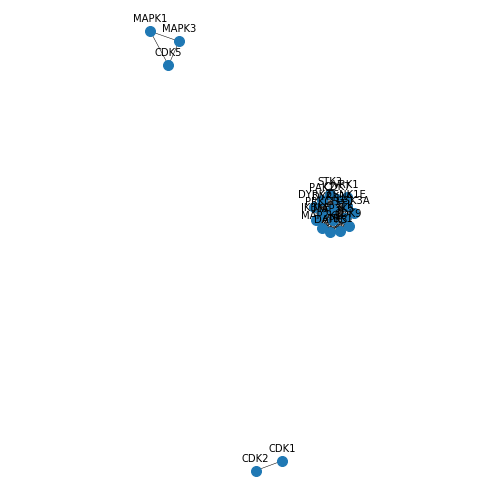

Original: 50, new: 13, Fraction=0.26


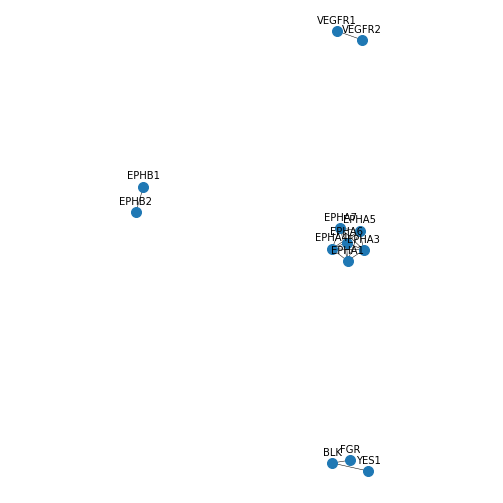

Original: 140, new: 40, Fraction=0.29


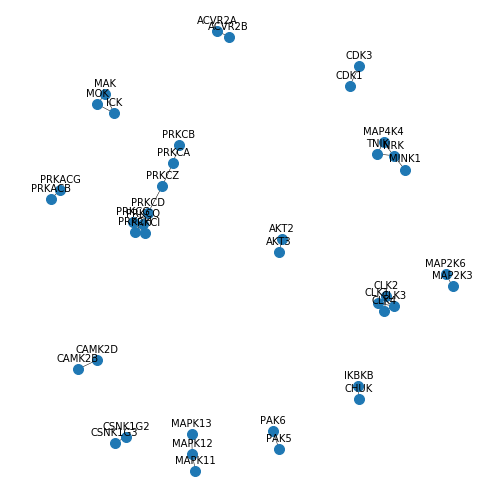

Original: 65, new: 12, Fraction=0.18


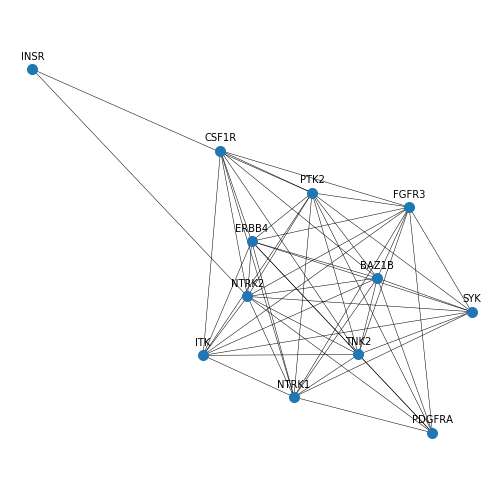

Original: 243, new: 59, Fraction=0.24


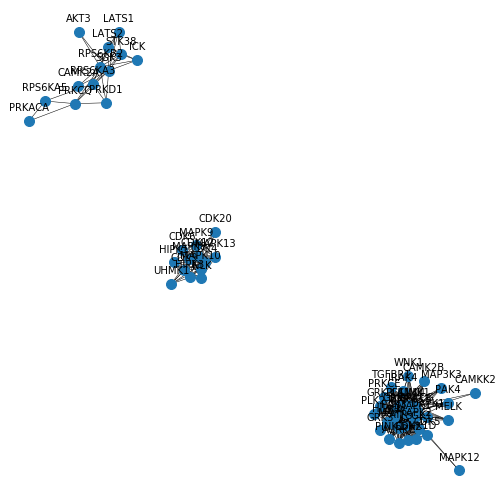

Original: 19, new: 0, Fraction=0.00


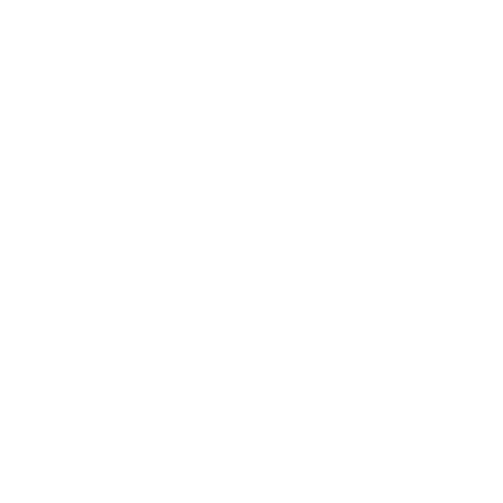

Original: 87, new: 12, Fraction=0.14


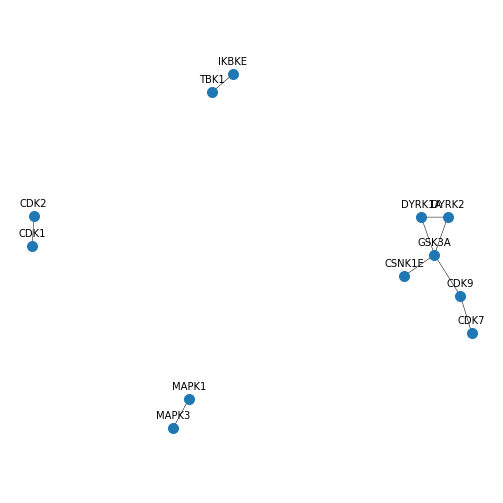

Original: 50, new: 11, Fraction=0.22


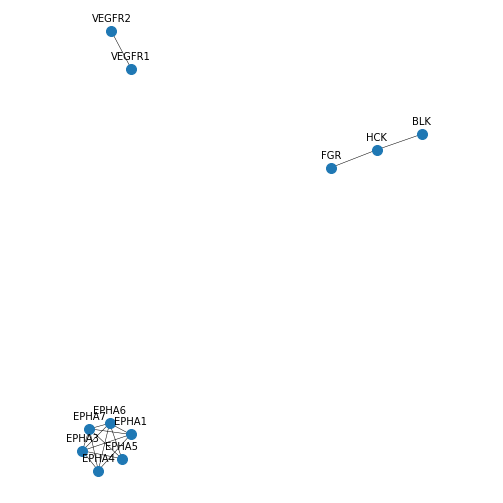

Original: 140, new: 13, Fraction=0.09


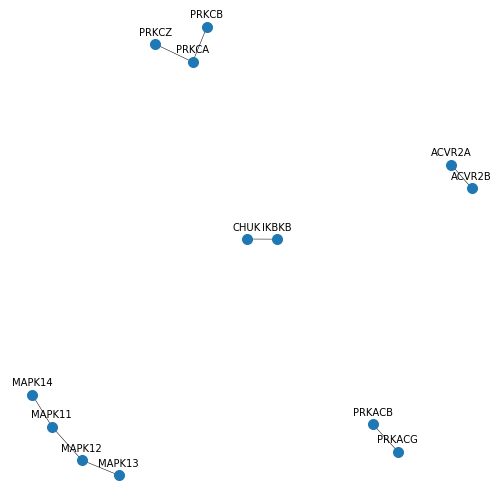

Original: 65, new: 14, Fraction=0.22


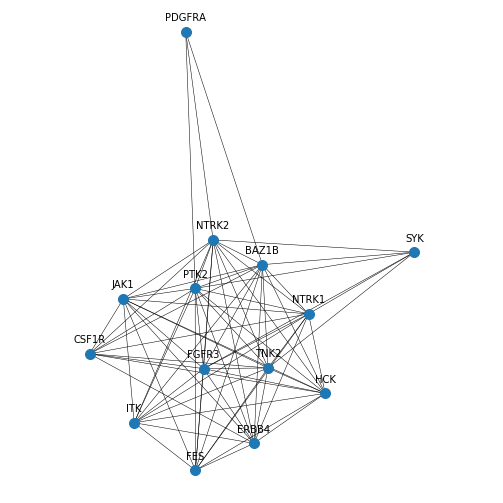

Original: 243, new: 46, Fraction=0.19


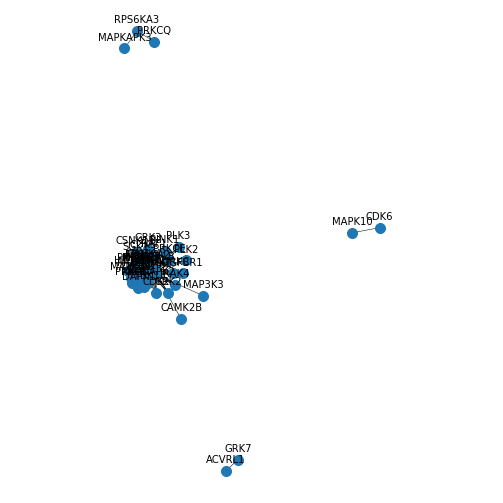

Original: 19, new: 0, Fraction=0.00


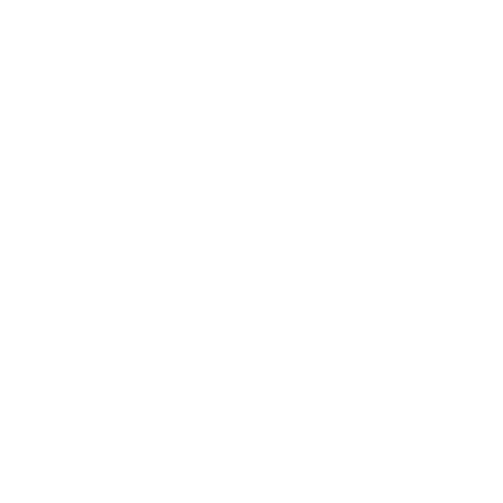

Original: 87, new: 2, Fraction=0.02


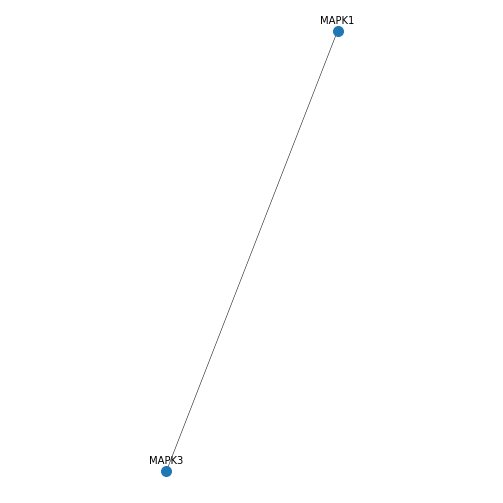

In [9]:
# Here, run through all figure handles of interest and plot and save the network figure.

figHandles = []
for file in files:
    df = pd.read_csv(heatmap_s_data_dir+file)
    df = df.set_index('Unnamed: 0')
    df_orig = df.copy()
    fig = plotNetworkFigure(df, JIThreshold)
    [predictor, stringency, typeKin] = description[file]
    outputFileName = predictor+'_'+stringency+'_'+typeKin+'.eps'
    fig.savefig(network_dir+outputFileName, transparent=True)